In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.impute import SimpleImputer, KNNImputer

In [2]:
X = joblib.load('./AML_data/meth.pkl')
phenodf = joblib.load('./AML_data/pheno.pkl')
unionindices = joblib.load('./AML_data/unionindices.pkl')
len(unionindices)


1300

In [3]:
X.shape

(142, 406830)

In [4]:
phenodf.genotype.unique()

array(['normal', 't(11;19)', nan, 'mono 7', 'inv(16)', 't(9;11)',
       'other clon abn', 'other 11q23/MLL', 't(10;11)', '3q21q26',
       't(8;21)', 'sole+8', 't(15;17)', 'no result'], dtype=object)

In [5]:
len(phenodf.genotype.unique())

14

In [6]:
# Create a new column for genotypes to merge some groups together

# Nas, No result and other will form one group


In [7]:
mll = ['other 11q23/MLL', 't(9;11)', 't(10;11)','t(11;19)']
other = ['normal', 'mono 7', 'inv(16)','other clon abn', '3q21q26', 't(8;21)', 'sole+8', 't(15;17)']

In [8]:
finalgenotype = []

for data in phenodf.genotype:

    if data in mll:
        finalgenotype.append('MLL rearranged')
        
    elif data == 'no result':
        finalgenotype.append('No result')
        
    elif data in other:
        finalgenotype.append(data)
        
    else:
        finalgenotype.append('No result')
        

In [9]:
finalgenotype

['normal',
 'MLL rearranged',
 'normal',
 'No result',
 'mono 7',
 'inv(16)',
 'normal',
 'normal',
 'MLL rearranged',
 'other clon abn',
 'other clon abn',
 'MLL rearranged',
 'normal',
 'MLL rearranged',
 'MLL rearranged',
 'MLL rearranged',
 'other clon abn',
 'MLL rearranged',
 'normal',
 'No result',
 'MLL rearranged',
 'normal',
 'MLL rearranged',
 '3q21q26',
 'normal',
 'other clon abn',
 'other clon abn',
 'inv(16)',
 'No result',
 't(8;21)',
 'sole+8',
 'sole+8',
 'normal',
 'normal',
 'No result',
 'other clon abn',
 'mono 7',
 't(8;21)',
 'normal',
 'inv(16)',
 'No result',
 't(8;21)',
 'MLL rearranged',
 'MLL rearranged',
 'normal',
 'No result',
 'normal',
 't(15;17)',
 'No result',
 'other clon abn',
 'normal',
 'other clon abn',
 'inv(16)',
 'inv(16)',
 't(8;21)',
 'MLL rearranged',
 't(8;21)',
 't(8;21)',
 'normal',
 'normal',
 't(8;21)',
 't(15;17)',
 'No result',
 'MLL rearranged',
 'MLL rearranged',
 'MLL rearranged',
 'inv(16)',
 'No result',
 't(8;21)',
 'No result

In [10]:
phenodf['finalgenotype'] = finalgenotype

In [11]:
phenodf[['genotype', 'finalgenotype']].head(20)

genotype   finalgenotype
public_id                                 
AML_001             normal          normal
AML_002           t(11;19)  MLL rearranged
AML_003             normal          normal
AML_004_r              NaN       No result
AML_005             mono 7          mono 7
AML_006            inv(16)         inv(16)
AML_007             normal          normal
AML_008             normal          normal
AML_009            t(9;11)  MLL rearranged
AML_010     other clon abn  other clon abn
AML_011     other clon abn  other clon abn
AML_012    other 11q23/MLL  MLL rearranged
AML_013             normal          normal
AML_014           t(10;11)  MLL rearranged
AML_004           t(11;19)  MLL rearranged
AML_015    other 11q23/MLL  MLL rearranged
AML_016     other clon abn  other clon abn
AML_017            t(9;11)  MLL rearranged
AML_018             normal          normal
AML_019_r              NaN       No result

In [12]:
len(phenodf.finalgenotype.unique())

10

In [13]:
phenodf.finalgenotype.value_counts()

normal            30
MLL rearranged    25
other clon abn    23
No result         20
t(8;21)           19
inv(16)           12
mono 7             5
t(15;17)           4
sole+8             3
3q21q26            1
Name: finalgenotype, dtype: int64

In [14]:
unknowndf = phenodf[phenodf['finalgenotype'].isin(['No result', 'other clon abn'])]

In [15]:
Xun = X[X.index.get_level_values(1).isin(unknowndf.index)]

In [16]:
phenodf = phenodf[~phenodf['finalgenotype'].isin(['No result', 'other clon abn'])]

In [17]:
phenodf.finalgenotype.value_counts()

normal            30
MLL rearranged    25
t(8;21)           19
inv(16)           12
mono 7             5
t(15;17)           4
sole+8             3
3q21q26            1
Name: finalgenotype, dtype: int64

In [18]:
X = X[X.index.get_level_values(1).isin(phenodf.index)]

In [19]:
X.shape

(99, 406830)

In [20]:
# Split the data into train test sets

In [21]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X, phenodf.finalgenotype, test_size = 0.33, random_state = 6)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(66, 406830) (33, 406830) (66,) (33,)


In [22]:
Xtrain = Xtrain[unionindices]
Xtest = Xtest[unionindices]

In [23]:
Xtrain.shape

(66, 1300)

In [24]:
Xtest.shape

(33, 1300)

In [25]:
ytrain = pd.DataFrame(ytrain, columns = ['finalgenotype'], index = ytrain.index)
ytest = pd.DataFrame(ytest, columns = ['finalgenotype'], index = ytest.index)


In [26]:
ytrain.finalgenotype.value_counts()

normal            22
MLL rearranged    14
t(8;21)           12
inv(16)            9
mono 7             4
t(15;17)           2
sole+8             2
3q21q26            1
Name: finalgenotype, dtype: int64

In [27]:
ytest.finalgenotype.value_counts()

MLL rearranged    11
normal             8
t(8;21)            7
inv(16)            3
t(15;17)           2
mono 7             1
sole+8             1
Name: finalgenotype, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()
encoder.fit(ytrain)
encoded_ytrain = encoder.transform(ytrain)
encoded_ytest = encoder.transform(ytest)


C:\Users\olgkr928\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [30]:
ytrain['classes'] = encoded_ytrain
ytest['classes'] = encoded_ytest

In [31]:
ytrain

finalgenotype  classes
public_id                         
AML_110           inv(16)        2
AML_051           inv(16)        2
AML_100           t(8;21)        7
AML_015    MLL rearranged        1
AML_123           inv(16)        2
...                   ...      ...
AML_047           t(8;21)        7
AML_109            mono 7        3
AML_104            normal        4
AML_065            normal        4
AML_014    MLL rearranged        1

[66 rows x 2 columns]

# Model Selection & Optimization

In [30]:
# Train the models

In [31]:
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils


random_state = 7



from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
import time

### Create the Neural network model to pass it through the KerasClassifier Wrapper from scikit-learn

In [32]:
def baseline_model(input_dim = len(unionindices),
                   out = len(phenodf.finalgenotype.unique()),
                   activation = 'sigmoid',
                   dim1 = 100,
                   dim2 = 50,
                   optimizer = 'rmsprop'):
    model = Sequential()
    model.add(Dense(dim1, input_dim=input_dim, activation=activation)) 
    model.add(Dense(dim2, input_dim=dim1, activation=activation))
    model.add(Dense(out, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [33]:
NeuralNetwork = KerasClassifier(build_fn = baseline_model, verbose=1)

### Set the hyperparameter space for all Classifiers

In [34]:

names = ["NeuralNetwork","NearestCentroid", "KNeighborsClassifier", "SVC", "GaussianProcessClassifier",
         "DecisionTreeClassifier", "RandomForestClassifier",  "AdaBoostClassifier",
         "GaussianNB"]

classifiers = [NeuralNetwork,
    NearestCentroid(),
    KNeighborsClassifier(),
    SVC(random_state = random_state),
    GaussianProcessClassifier(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    AdaBoostClassifier(random_state = random_state),
    GaussianNB()]


hyperparameters = {'NeuralNetwork': {'NeuralNetwork__epochs':[100,200],
                                     'NeuralNetwork__batch_size':[8, 16],
                                     'NeuralNetwork__activation' : ['relu', 'sigmoid'],
                                     'NeuralNetwork__dim1' : [100, 200]},
                   
                   'NearestCentroid':{'parameters': None},
                   'KNeighborsClassifier':{'KNeighborsClassifier__estimator__n_neighbors': [5,10,15,20], 
                                           'KNeighborsClassifier__estimator__weights':['uniform', 'distance'], 
                                           'KNeighborsClassifier__estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
                   'SVC':{'SVC__estimator__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                          'SVC__estimator__degree':[3,4],
                          'SVC__estimator__C':[1, 0.1, 0.01],
                          'SVC__estimator__gamma':['scale','auto']},
                   'GaussianProcessClassifier':{'parameters': None},
                   
                   'DecisionTreeClassifier':{'DecisionTreeClassifier__estimator__criterion':['gini', 'entropy'],
                                             'DecisionTreeClassifier__estimator__max_features':['auto', 'sqrt', 'log2'],
                                             'DecisionTreeClassifier__estimator__splitter':['best','random']},
                   
                   'RandomForestClassifier':{'RandomForestClassifier__estimator__n_estimators':[10, 50, 100, 200],
                                             'RandomForestClassifier__estimator__criterion':['gini', 'entropy'],
                                             'RandomForestClassifier__estimator__max_features':['auto', 'sqrt', 'log2']},
                   
                   
                   'AdaBoostClassifier':{'AdaBoostClassifier__estimator__n_estimators':[10, 50, 100], 
                                         'AdaBoostClassifier__estimator__learning_rate':[0.01, 0.1, 1]},
                   
                   
                   'GaussianNB':{'parameters': None}
                   }



withnoparams = ['GaussianProcessClassifier', 'GaussianNB', 'NearestCentroid']


## Training-Validation Loop

### Nested Cross Validation

1. Inner 3-fold Cross Validation for hyperparameter optimization
2. Outer 5-fold Cross Validation for model selection

In [35]:
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

In [36]:
outer_init_score = 0
start_time = time.time()
scores_dict = {}

for name, model in zip(names, classifiers):
    print('Starting with {} Classifier '.format(name))
    inner_results = list()
    init_score = 0
    i = 1

    print('---------------------------------')
    print('---------------------------------')

 

    for train_ix, val_ix in cv_outer.split(Xtrain):
        print('---------------------------------')
        print('---------------------------------')
        print('Fold {}'.format(i))
        print('---------------------------')
        # split data
        X_train, X_val = Xtrain.iloc[train_ix, :], Xtrain.iloc[val_ix, :]
        y_train, y_val = ytrain.classes[train_ix], ytrain.classes[val_ix]
        
        
        cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
        
        imp = SimpleImputer(missing_values=np.nan, strategy='median')
        imp.fit(X_train)
        X_train = pd.DataFrame(imp.transform(X_train), columns = X_train.columns, index = X_train.index)
        X_val = pd.DataFrame(imp.transform(X_val), columns = X_val.columns, index = X_val.index)
        

        if name in withnoparams:
            if name == 'NearestCentroid':
                mpipe = model
        
            else:
                mpipe = OneVsRestClassifier(model)
            
            mpipe.fit(X_train, y_train.ravel())
            best_model = mpipe
            yhat = best_model.predict(X_val)
            n_scores = accuracy_score(y_val, yhat)
            inner_results.append(n_scores)

            print('Fold {} Validation scores are: {}'.format(i, n_scores))
            print('---------------------------------')
            print('---------------------------------')
            
        elif name == 'NeuralNetwork':
            pipeline = Pipeline(steps = [(name,model)])
            hyperparams = hyperparameters[name]
            mpipe = GridSearchCV(pipeline, hyperparams, refit=True, cv = cv_inner)
            # convert integers to dummy variables (i.e. one hot encoded)
            dummy_ytrain = np_utils.to_categorical(y_train)
            #dummy_yval = np_utils.to_categorical(y_val)
            
            result = mpipe.fit(X_train, dummy_ytrain)
            best_model = result.best_estimator_
            print(best_model.get_params())
            # evaluate model on the validation dataset
            yhat = best_model.predict(X_val)

            # evaluate the model
            n_scores = accuracy_score(y_val, yhat)
            # store the result
            inner_results.append(n_scores)

            print('Fold {} Validation scores are: {}'.format(i, n_scores))
            print('---------------------------------')
            print('---------------------------------')
            

        else:
            # Create pipeline
            pipeline = Pipeline(steps = [(name,OneVsRestClassifier(model))])

            hyperparams = hyperparameters[name]
            mpipe = GridSearchCV(pipeline, hyperparams, scoring='accuracy',  refit=True, cv = cv_inner)

            result = mpipe.fit(X_train, y_train.ravel())
            # get the best performing model fit on the whole training set
            best_model = result.best_estimator_
            print(best_model)
            # evaluate model on the validation dataset
            yhat = best_model.predict(X_val)
            
            # evaluate the model
            n_scores = accuracy_score(y_val, yhat)
            # store the result
            inner_results.append(n_scores)

            print('Fold {} Validation scores are: {}'.format(i, n_scores))
            print('---------------------------------')
            print('---------------------------------')


        # save the details for the model with the best hyperparameters after grid search so at the end of the K-fold to get
        # the most optimized model per classifier
        if init_score < n_scores:
            init_score = n_scores
            bmodel = best_model



        print('End of fold: {}'.format(i))
        print('---------------------------------')
        print('---------------------------------')


        i +=1

    print('Mean Accuracy score for {} Classifier is {}'.format(name, np.mean(inner_results)))    
    # add the accuracy scores per model for all folds    
    scores_dict[name] = inner_results
    #In this outer loop we care about the mean accuracy (from the 5-fold grid search) of each Classifier 
    # and to get the highest mean and for that particular highest mean to obtain the optimized model 
    # that it was determined at the end of the Grid search
    if outer_init_score < np.mean(inner_results):
        outer_init_score = np.mean(inner_results)
        bestname =  name
        bestmodel = bmodel
    

    print('---------------------------------')
    print('---------------------------------')



print('---------------------------------')
print('\n')
print('The best classifier is {} with Accuracy score on the validation set of {}'.format(bestname, outer_init_score))
print('Best parameters for classifier  {} are {}'.format(bestname, bestmodel))
print('---------------------------------')
endtime = time.time()
print("--- Model Selection & Hyperparameter optimization completed after {} minutes ---".format(round(endtime - start_time,3)/60))

Starting with NeuralNetwork Classifier 
---------------------------------
---------------------------------
---------------------------------
---------------------------------
Fold 1
---------------------------
Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 2.3005 - accuracy: 0.1485
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.9305 - accuracy: 0.3138
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 1.4813 - accuracy: 0.4607
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2565 - accuracy: 0.5722
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.9351 - accuracy: 0.7682
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1157 - accuracy: 0.7277
Epoch 7/100
5/5 [==============================] - 0s 0s/step - loss: 0.9455 - accuracy: 0.5953
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.8151
Epoch 9/100
5/

5/5 [==============================] - 0s 2ms/step - loss: 1.9776e-04 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 2ms/step - loss: 5.1423e-05 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 0s/step - loss: 3.9374e-05 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 2ms/step - loss: 4.3538e-05 - accuracy: 1.0000
Epoch 66/100
5/5 [==============================] - 0s 2ms/step - loss: 3.7292e-05 - accuracy: 1.0000
Epoch 67/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9783
Epoch 68/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3347e-04 - accuracy: 1.0000
Epoch 69/100
5/5 [==============================] - 0s 2ms/step - loss: 9.3335e-05 - accuracy: 1.0000
Epoch 70/100
5/5 [==============================] - 0s 0s/step - loss: 7.9629e-05 - accuracy: 1.0000
Epoch 71/100
5/5 [==============================] - 0s 2ms/step - loss: 7.0307e-05 - accuracy: 1.0000

5/5 [==============================] - 0s 0s/step - loss: 0.0020 - accuracy: 1.0000
Epoch 44/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 45/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 46/100
5/5 [==============================] - 0s 2ms/step - loss: 9.1965e-04 - accuracy: 1.0000
Epoch 47/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 48/100
5/5 [==============================] - 0s 0s/step - loss: 8.4713e-04 - accuracy: 1.0000
Epoch 49/100
5/5 [==============================] - 0s 2ms/step - loss: 6.3935e-04 - accuracy: 1.0000
Epoch 50/100
5/5 [==============================] - 0s 2ms/step - loss: 7.2281e-04 - accuracy: 1.0000
Epoch 51/100
5/5 [==============================] - 0s 2ms/step - loss: 7.9180e-04 - accuracy: 1.0000
Epoch 52/100
5/5 [==============================] - 0s 2ms/step - loss: 5.4981e-04 - accuracy: 1.0000
Epoch 53/10

5/5 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 1.0000
Epoch 25/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 1.0000
Epoch 26/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9468
Epoch 27/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 28/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 1.0000
Epoch 29/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 1.0000
Epoch 30/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 31/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 32/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 33/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 34/200
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 2.3536e-07 - accuracy: 1.0000
Epoch 185/200
5/5 [==============================] - 0s 2ms/step - loss: 2.3223e-07 - accuracy: 1.0000
Epoch 186/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6349e-07 - accuracy: 1.0000
Epoch 187/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6364e-07 - accuracy: 1.0000
Epoch 188/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3781e-07 - accuracy: 1.0000
Epoch 189/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1396e-07 - accuracy: 1.0000
Epoch 190/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1817e-07 - accuracy: 1.0000
Epoch 191/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0977e-07 - accuracy: 1.0000
Epoch 192/200
5/5 [==============================] - 0s 2ms/step - loss: 8.5572e-08 - accuracy: 1.0000
Epoch 193/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0380e-07 - a

5/5 [==============================] - 0s 2ms/step - loss: 1.0990e-07 - accuracy: 1.0000
Epoch 146/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0029e-07 - accuracy: 1.0000
Epoch 147/200
5/5 [==============================] - 0s 2ms/step - loss: 7.4133e-08 - accuracy: 1.0000
Epoch 148/200
5/5 [==============================] - 0s 2ms/step - loss: 7.6717e-08 - accuracy: 1.0000
Epoch 149/200
5/5 [==============================] - 0s 2ms/step - loss: 9.1618e-08 - accuracy: 1.0000
Epoch 150/200
5/5 [==============================] - 0s 2ms/step - loss: 4.4337e-08 - accuracy: 1.0000
Epoch 151/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5557e-07 - accuracy: 1.0000
Epoch 152/200
5/5 [==============================] - 0s 2ms/step - loss: 9.5007e-08 - accuracy: 1.0000
Epoch 153/200
5/5 [==============================] - 0s 2ms/step - loss: 2.6982e-08 - accuracy: 1.0000
Epoch 154/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1092e-08 - a

5/5 [==============================] - 0s 2ms/step - loss: 1.0320e-04 - accuracy: 1.0000
Epoch 99/200
5/5 [==============================] - 0s 2ms/step - loss: 5.1063e-05 - accuracy: 1.0000
Epoch 100/200
5/5 [==============================] - 0s 2ms/step - loss: 3.7151e-05 - accuracy: 1.0000
Epoch 101/200
5/5 [==============================] - 0s 2ms/step - loss: 2.3017e-05 - accuracy: 1.0000
Epoch 102/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6946e-05 - accuracy: 1.0000
Epoch 103/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7200e-05 - accuracy: 1.0000
Epoch 104/200
5/5 [==============================] - 0s 2ms/step - loss: 1.9654e-05 - accuracy: 1.0000
Epoch 105/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1464e-05 - accuracy: 1.0000
Epoch 106/200
5/5 [==============================] - 0s 2ms/step - loss: 6.9543e-06 - accuracy: 1.0000
Epoch 107/200
5/5 [==============================] - 0s 2ms/step - loss: 4.3422e-06 - ac

Epoch 51/100
5/5 [==============================] - 0s 2ms/step - loss: 7.4759e-04 - accuracy: 1.0000
Epoch 52/100
5/5 [==============================] - 0s 3ms/step - loss: 7.2092e-04 - accuracy: 1.0000
Epoch 53/100
5/5 [==============================] - 0s 3ms/step - loss: 5.0311e-04 - accuracy: 1.0000
Epoch 54/100
5/5 [==============================] - 0s 3ms/step - loss: 4.3301e-04 - accuracy: 1.0000
Epoch 55/100
5/5 [==============================] - 0s 3ms/step - loss: 5.0860e-04 - accuracy: 1.0000
Epoch 56/100
5/5 [==============================] - 0s 3ms/step - loss: 3.7247e-04 - accuracy: 1.0000
Epoch 57/100
5/5 [==============================] - 0s 3ms/step - loss: 3.6578e-04 - accuracy: 1.0000
Epoch 58/100
5/5 [==============================] - 0s 3ms/step - loss: 2.8541e-04 - accuracy: 1.0000
Epoch 59/100
5/5 [==============================] - 0s 3ms/step - loss: 2.4448e-04 - accuracy: 1.0000
Epoch 60/100
5/5 [==============================] - 0s 3ms/step - loss: 1.8997e-04

3/3 [==============================] - 0s 0s/step - loss: 2.6175 - accuracy: 0.7059
Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 2.7748 - accuracy: 0.1353
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 2.7235 - accuracy: 0.2263
Epoch 3/100
5/5 [==============================] - 0s 932us/step - loss: 1.1750 - accuracy: 0.5152
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2159 - accuracy: 0.6748
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8912 - accuracy: 0.7901
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 1.1258 - accuracy: 0.6331
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.8300
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7329 - accuracy: 0.8569
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3654 - accuracy: 0.9419
Epoch 10/100
5/5 [=======================

5/5 [==============================] - 0s 2ms/step - loss: 4.3504e-04 - accuracy: 1.0000
Epoch 57/200
5/5 [==============================] - 0s 4ms/step - loss: 3.5189e-04 - accuracy: 1.0000
Epoch 58/200
5/5 [==============================] - 0s 2ms/step - loss: 2.9142e-04 - accuracy: 1.0000
Epoch 59/200
5/5 [==============================] - 0s 2ms/step - loss: 5.7948e-04 - accuracy: 1.0000
Epoch 60/200
5/5 [==============================] - 0s 2ms/step - loss: 3.8319e-04 - accuracy: 1.0000
Epoch 61/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.9237
Epoch 62/200
5/5 [==============================] - 0s 0s/step - loss: 0.0270 - accuracy: 1.0000
Epoch 63/200
5/5 [==============================] - 0s 2ms/step - loss: 2.7887e-04 - accuracy: 1.0000
Epoch 64/200
5/5 [==============================] - 0s 2ms/step - loss: 3.1007e-04 - accuracy: 1.0000
Epoch 65/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4186e-04 - accuracy: 1.0000
Ep

5/5 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7901
Epoch 9/200
5/5 [==============================] - 0s 392us/step - loss: 0.4050 - accuracy: 0.9046
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.9358
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1682 - accuracy: 0.9471
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9584
Epoch 13/200
5/5 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.8144
Epoch 14/200
5/5 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.9471
Epoch 15/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1409 - accuracy: 0.9471
Epoch 16/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 1.0000
Epoch 17/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 1.0000
Epoch 18/200
5/5 [==============

5/5 [==============================] - 0s 3ms/step - loss: 1.9272e-05 - accuracy: 1.0000
Epoch 91/200
5/5 [==============================] - 0s 3ms/step - loss: 1.3928e-05 - accuracy: 1.0000
Epoch 92/200
5/5 [==============================] - 0s 3ms/step - loss: 1.4715e-05 - accuracy: 1.0000
Epoch 93/200
5/5 [==============================] - 0s 3ms/step - loss: 1.6298e-05 - accuracy: 1.0000
Epoch 94/200
5/5 [==============================] - 0s 3ms/step - loss: 1.3148e-05 - accuracy: 1.0000
Epoch 95/200
5/5 [==============================] - 0s 997us/step - loss: 1.1066e-05 - accuracy: 1.0000
Epoch 96/200
5/5 [==============================] - 0s 3ms/step - loss: 7.7354e-06 - accuracy: 1.0000
Epoch 97/200
5/5 [==============================] - 0s 3ms/step - loss: 6.3811e-06 - accuracy: 1.0000
Epoch 98/200
5/5 [==============================] - 0s 2ms/step - loss: 5.6747e-06 - accuracy: 1.0000
Epoch 99/200
5/5 [==============================] - 0s 158us/step - loss: 5.1484e-06 - accura

5/5 [==============================] - 0s 2ms/step - loss: 6.3187e-04 - accuracy: 1.0000
Epoch 43/200
5/5 [==============================] - 0s 4ms/step - loss: 5.0978e-04 - accuracy: 1.0000
Epoch 44/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 45/200
5/5 [==============================] - 0s 899us/step - loss: 0.5514 - accuracy: 0.8933
Epoch 46/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 47/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 48/200
5/5 [==============================] - 0s 1ms/step - loss: 9.4606e-04 - accuracy: 1.0000
Epoch 49/200
5/5 [==============================] - 0s 1ms/step - loss: 8.4404e-04 - accuracy: 1.0000
Epoch 50/200
5/5 [==============================] - 0s 1ms/step - loss: 6.6113e-04 - accuracy: 1.0000
Epoch 51/200
5/5 [==============================] - 0s 1ms/step - loss: 4.7565e-04 - accuracy: 1.0000
Epoch 5

3/3 [==============================] - 0s 0s/step - loss: 3.3177 - accuracy: 0.8235
Epoch 1/100
3/3 [==============================] - 1s 9ms/step - loss: 2.5258 - accuracy: 0.1976
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 2.1522 - accuracy: 0.2270
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 1.9627 - accuracy: 0.4237
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3489 - accuracy: 0.5763
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 1.3161 - accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 1.2283 - accuracy: 0.6889
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 1.0486 - accuracy: 0.6811
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.9560 - accuracy: 0.7036
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7952 - accuracy: 0.7808
Epoch 10/100
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 59/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 60/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 61/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 62/100
3/3 [==============================] - 0s 3ms/step - loss: 9.7846e-04 - accuracy: 1.0000
Epoch 63/100
3/3 [==============================] - 0s 3ms/step - loss: 9.3584e-04 - accuracy: 1.0000
Epoch 64/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 65/100
3/3 [==============================] - 0s 3ms/step - loss: 7.0202e-04 - accuracy: 1.0000
Epoch 66/100
3/3 [==============================] - 0s 2ms/step - loss: 7.6790e-04 - accuracy: 1.0000
Epoch 67/100
3/3 [==============================] - 0s 3ms/step - loss: 5.9447e-04 - accuracy: 1.0000
Epoch 68/100


3/3 [==============================] - 0s 0s/step - loss: 1.2701 - accuracy: 0.4903
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0208 - accuracy: 0.6057
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8782 - accuracy: 0.7279
Epoch 9/200
3/3 [==============================] - 0s 0s/step - loss: 0.7325 - accuracy: 0.7505
Epoch 10/200
3/3 [==============================] - 0s 0s/step - loss: 1.0396 - accuracy: 0.6654
Epoch 11/200
3/3 [==============================] - 0s 0s/step - loss: 1.0441 - accuracy: 0.5735
Epoch 12/200
3/3 [==============================] - 0s 0s/step - loss: 0.5888 - accuracy: 0.8562
Epoch 13/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.8474
Epoch 14/200
3/3 [==============================] - 0s 4ms/step - loss: 0.7727 - accuracy: 0.7192
Epoch 15/200
3/3 [==============================] - 0s 0s/step - loss: 0.5420 - accuracy: 0.7877
Epoch 16/200
3/3 [========================

3/3 [==============================] - 0s 2ms/step - loss: 1.4998e-04 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 3ms/step - loss: 8.8989e-05 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 3ms/step - loss: 8.0455e-05 - accuracy: 1.0000
Epoch 172/200
3/3 [==============================] - 0s 2ms/step - loss: 9.5120e-05 - accuracy: 1.0000
Epoch 173/200
3/3 [==============================] - 0s 3ms/step - loss: 9.5905e-05 - accuracy: 1.0000
Epoch 174/200
3/3 [==============================] - 0s 2ms/step - loss: 7.6622e-05 - accuracy: 1.0000
Epoch 175/200
3/3 [==============================] - 0s 2ms/step - loss: 6.1419e-05 - accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 3ms/step - loss: 4.5182e-05 - accuracy: 1.0000
Epoch 177/200
3/3 [==============================] - 0s 3ms/step - loss: 6.1300e-05 - accuracy: 1.0000
Epoch 178/200
3/3 [==============================] - 0s 3ms/step - loss: 5.3573e-05 - a

3/3 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 44/200
3/3 [==============================] - 0s 0s/step - loss: 0.0058 - accuracy: 1.0000
Epoch 45/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.9857
Epoch 46/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1222 - accuracy: 0.9246
Epoch 47/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 48/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 49/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 50/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 51/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 52/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 53/200
3/3 [================

2/2 [==============================] - 0s 0s/step - loss: 3.8011 - accuracy: 0.7647
Epoch 1/200
3/3 [==============================] - 0s 0s/step - loss: 2.0390 - accuracy: 0.3199
Epoch 2/200
3/3 [==============================] - 0s 3ms/step - loss: 1.5080 - accuracy: 0.4993
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 1.1843 - accuracy: 0.5761
Epoch 4/200
3/3 [==============================] - 0s 0s/step - loss: 0.8366 - accuracy: 0.7009
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.7763
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.8426
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.8205
Epoch 8/200
3/3 [==============================] - 0s 0s/step - loss: 0.7027 - accuracy: 0.7984
Epoch 9/200
3/3 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.9246
Epoch 10/200
3/3 [============================

3/3 [==============================] - 0s 3ms/step - loss: 1.7932e-05 - accuracy: 1.0000
Epoch 164/200
3/3 [==============================] - 0s 2ms/step - loss: 1.2738e-05 - accuracy: 1.0000
Epoch 165/200
3/3 [==============================] - 0s 3ms/step - loss: 1.1004e-05 - accuracy: 1.0000
Epoch 166/200
3/3 [==============================] - 0s 2ms/step - loss: 1.0985e-05 - accuracy: 1.0000
Epoch 167/200
3/3 [==============================] - 0s 3ms/step - loss: 8.4321e-06 - accuracy: 1.0000
Epoch 168/200
3/3 [==============================] - 0s 3ms/step - loss: 8.9934e-06 - accuracy: 1.0000
Epoch 169/200
3/3 [==============================] - 0s 2ms/step - loss: 7.9512e-06 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 3ms/step - loss: 8.2585e-06 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 2ms/step - loss: 7.1934e-06 - accuracy: 1.0000
Epoch 172/200
3/3 [==============================] - 0s 3ms/step - loss: 7.1200e-06 - a

3/3 [==============================] - 0s 4ms/step - loss: 0.3166 - accuracy: 0.8960
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.6540
Epoch 13/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1618 - accuracy: 0.9779
Epoch 14/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1247 - accuracy: 1.0000
Epoch 15/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2659 - accuracy: 0.9623
Epoch 16/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1457 - accuracy: 0.9779
Epoch 17/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 1.0000
Epoch 18/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9623
Epoch 19/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1578 - accuracy: 0.9623
Epoch 20/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.9181
Epoch 21/100
3/3 [===============

3/3 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 69/100
3/3 [==============================] - 0s 4ms/step - loss: 4.2102e-04 - accuracy: 1.0000
Epoch 70/100
3/3 [==============================] - 0s 2ms/step - loss: 4.4935e-04 - accuracy: 1.0000
Epoch 71/100
3/3 [==============================] - 0s 2ms/step - loss: 3.9327e-04 - accuracy: 1.0000
Epoch 72/100
3/3 [==============================] - 0s 4ms/step - loss: 3.5847e-04 - accuracy: 1.0000
Epoch 73/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 74/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7506 - accuracy: 0.8960
Epoch 75/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 76/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 77/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 78/100
3/3 

3/3 [==============================] - 0s 4ms/step - loss: 7.8629e-05 - accuracy: 1.0000
Epoch 124/200
3/3 [==============================] - 0s 4ms/step - loss: 8.2865e-05 - accuracy: 1.0000
Epoch 125/200
3/3 [==============================] - 0s 4ms/step - loss: 6.7812e-05 - accuracy: 1.0000
Epoch 126/200
3/3 [==============================] - 0s 2ms/step - loss: 6.5635e-05 - accuracy: 1.0000
Epoch 127/200
3/3 [==============================] - 0s 2ms/step - loss: 6.1789e-05 - accuracy: 1.0000
Epoch 128/200
3/3 [==============================] - 0s 4ms/step - loss: 6.4687e-05 - accuracy: 1.0000
Epoch 129/200
3/3 [==============================] - 0s 2ms/step - loss: 4.8288e-05 - accuracy: 1.0000
Epoch 130/200
3/3 [==============================] - 0s 2ms/step - loss: 8.2279e-05 - accuracy: 1.0000
Epoch 131/200
3/3 [==============================] - 0s 2ms/step - loss: 4.3477e-05 - accuracy: 1.0000
Epoch 132/200
3/3 [==============================] - 0s 2ms/step - loss: 8.8739e-05 - a

2/2 [==============================] - 0s 0s/step - loss: 0.1631 - accuracy: 0.9444
Epoch 1/200
3/3 [==============================] - 0s 4ms/step - loss: 2.8432 - accuracy: 0.2600
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 2.4708 - accuracy: 0.1703
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 2.2332 - accuracy: 0.2444
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 1.1702 - accuracy: 0.6190
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0190 - accuracy: 0.6033
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0078 - accuracy: 0.6411
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0759 - accuracy: 0.5266
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.8583
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5491 - accuracy: 0.8817
Epoch 10/200
3/3 [=========================

Epoch 163/200
3/3 [==============================] - 0s 4ms/step - loss: 1.5240e-04 - accuracy: 1.0000
Epoch 164/200
3/3 [==============================] - 0s 2ms/step - loss: 1.2907e-04 - accuracy: 1.0000
Epoch 165/200
3/3 [==============================] - 0s 4ms/step - loss: 1.3854e-04 - accuracy: 1.0000
Epoch 166/200
3/3 [==============================] - 0s 4ms/step - loss: 9.3793e-05 - accuracy: 1.0000
Epoch 167/200
3/3 [==============================] - 0s 2ms/step - loss: 1.0917e-04 - accuracy: 1.0000
Epoch 168/200
3/3 [==============================] - 0s 2ms/step - loss: 9.7112e-05 - accuracy: 1.0000
Epoch 169/200
3/3 [==============================] - 0s 2ms/step - loss: 6.0067e-05 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 4ms/step - loss: 6.4254e-05 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 2ms/step - loss: 5.1950e-05 - accuracy: 1.0000
Epoch 172/200
3/3 [==============================] - 0s 4ms/step - loss: 

3/3 [==============================] - 0s 4ms/step - loss: 2.2101e-04 - accuracy: 1.0000
Epoch 118/200
3/3 [==============================] - 0s 4ms/step - loss: 1.8602e-04 - accuracy: 1.0000
Epoch 119/200
3/3 [==============================] - 0s 2ms/step - loss: 1.6484e-04 - accuracy: 1.0000
Epoch 120/200
3/3 [==============================] - 0s 4ms/step - loss: 1.5674e-04 - accuracy: 1.0000
Epoch 121/200
3/3 [==============================] - 0s 2ms/step - loss: 1.3755e-04 - accuracy: 1.0000
Epoch 122/200
3/3 [==============================] - 0s 4ms/step - loss: 1.2848e-04 - accuracy: 1.0000
Epoch 123/200
3/3 [==============================] - 0s 4ms/step - loss: 1.2985e-04 - accuracy: 1.0000
Epoch 124/200
3/3 [==============================] - 0s 4ms/step - loss: 9.8518e-05 - accuracy: 1.0000
Epoch 125/200
3/3 [==============================] - 0s 2ms/step - loss: 9.3508e-05 - accuracy: 1.0000
Epoch 126/200
3/3 [==============================] - 0s 2ms/step - loss: 8.8747e-05 - a

5/5 [==============================] - 0s 905us/step - loss: 0.0399 - accuracy: 1.0000
Epoch 72/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 1.0000
Epoch 73/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 1.0000
Epoch 74/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 1.0000
Epoch 75/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 76/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 1.0000
Epoch 77/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 1.0000
Epoch 78/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 79/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 1.0000
Epoch 80/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 81/100
5/5 [=============

5/5 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.9368
Epoch 22/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.8195
Epoch 23/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.9315
Epoch 24/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.9159
Epoch 25/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.9532
Epoch 26/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.9636
Epoch 27/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.9323
Epoch 28/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.9566
Epoch 29/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8933
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.9323
Epoch 31/100
5/5 [===============

3/3 [==============================] - 0s 0s/step - loss: 1.4923 - accuracy: 0.8235
Epoch 1/200
5/5 [==============================] - 1s 2ms/step - loss: 2.5621 - accuracy: 0.0324
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 1.9573 - accuracy: 0.3636
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7888 - accuracy: 0.3631
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7313 - accuracy: 0.5423
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6088 - accuracy: 0.5486
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 1.5644 - accuracy: 0.5739
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4577 - accuracy: 0.6486
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3584 - accuracy: 0.5567
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3414 - accuracy: 0.7318
Epoch 10/200
5/5 [=========================

Epoch 84/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 85/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 86/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 87/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 88/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 89/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 90/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 91/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 92/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 93/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 94/200
5/5 [==

5/5 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 1.0000
Epoch 39/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 1.0000
Epoch 40/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 1.0000
Epoch 41/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 1.0000
Epoch 42/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 1.0000
Epoch 43/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 1.0000
Epoch 44/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 1.0000
Epoch 45/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 1.0000
Epoch 46/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 1.0000
Epoch 47/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0877 - accuracy: 1.0000
Epoch 48/200
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 5.5208e-04 - accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - 0s 2ms/step - loss: 4.1948e-04 - accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 2ms/step - loss: 4.7799e-04 - accuracy: 1.0000
Epoch 124/200
5/5 [==============================] - 0s 2ms/step - loss: 3.8606e-04 - accuracy: 1.0000
Epoch 125/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2708e-04 - accuracy: 1.0000
Epoch 126/200
5/5 [==============================] - 0s 2ms/step - loss: 2.9503e-04 - accuracy: 1.0000
Epoch 127/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5815e-04 - accuracy: 1.0000
Epoch 128/200
5/5 [==============================] - 0s 2ms/step - loss: 2.6070e-04 - accuracy: 1.0000
Epoch 129/200
5/5 [==============================] - 0s 2ms/step - loss: 2.0728e-04 - accuracy: 1.0000
Epoch 130/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1263e-04 - a

5/5 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 76/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 77/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 78/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 79/200
5/5 [==============================] - 0s 0s/step - loss: 0.0145 - accuracy: 1.0000
Epoch 80/200
5/5 [==============================] - 0s 0s/step - loss: 0.0142 - accuracy: 1.0000
Epoch 81/200
5/5 [==============================] - 0s 0s/step - loss: 0.0131 - accuracy: 1.0000
Epoch 82/200
5/5 [==============================] - 0s 0s/step - loss: 0.0102 - accuracy: 1.0000
Epoch 83/200
5/5 [==============================] - 0s 0s/step - loss: 0.0103 - accuracy: 1.0000
Epoch 84/200
5/5 [==============================] - 0s 0s/step - loss: 0.0103 - accuracy: 1.0000
Epoch 85/200
5/5 [=====================

5/5 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.9468
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.9468
Epoch 31/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 1.0000
Epoch 32/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9902
Epoch 33/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 1.0000
Epoch 34/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 1.0000
Epoch 35/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 1.0000
Epoch 36/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 1.0000
Epoch 37/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 1.0000
Epoch 38/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 1.0000
Epoch 39/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 88/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 89/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 90/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 91/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 92/100
5/5 [==============================] - 0s 962us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 93/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 94/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 95/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 96/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 97/100
5/5 [=============

5/5 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 1.0000
Epoch 38/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 1.0000
Epoch 39/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 1.0000
Epoch 40/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 1.0000
Epoch 41/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 1.0000
Epoch 42/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0895 - accuracy: 1.0000
Epoch 43/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 1.0000
Epoch 44/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 1.0000
Epoch 45/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 1.0000
Epoch 46/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0687 - accuracy: 1.0000
Epoch 47/200
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 3.5905e-06 - accuracy: 1.0000
Epoch 199/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2123e-06 - accuracy: 1.0000
Epoch 200/200
3/3 [==============================] - 0s 0s/step - loss: 1.0091 - accuracy: 0.8889
Epoch 1/200
5/5 [==============================] - 1s 2ms/step - loss: 2.1524 - accuracy: 0.2923
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6394 - accuracy: 0.3764
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 1.4727 - accuracy: 0.4085
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4301 - accuracy: 0.4701
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2927 - accuracy: 0.6131
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 1.2079 - accuracy: 0.6834
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1162 - accuracy: 0.7719
Epoch 8/200
5/5 [==============

5/5 [==============================] - 0s 2ms/step - loss: 2.1925e-05 - accuracy: 1.0000
Epoch 154/200
5/5 [==============================] - 0s 2ms/step - loss: 2.7411e-05 - accuracy: 1.0000
Epoch 155/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7774e-05 - accuracy: 1.0000
Epoch 156/200
5/5 [==============================] - 0s 2ms/step - loss: 1.8466e-05 - accuracy: 1.0000
Epoch 157/200
5/5 [==============================] - 0s 2ms/step - loss: 1.8805e-05 - accuracy: 1.0000
Epoch 158/200
5/5 [==============================] - 0s 4ms/step - loss: 1.7751e-05 - accuracy: 1.0000
Epoch 159/200
5/5 [==============================] - 0s 4ms/step - loss: 1.5009e-05 - accuracy: 1.0000
Epoch 160/200
5/5 [==============================] - ETA: 0s - loss: 9.9986e-06 - accuracy: 1.00 - 0s 2ms/step - loss: 1.5680e-05 - accuracy: 1.0000
Epoch 161/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6663e-05 - accuracy: 1.0000
Epoch 162/200
5/5 [======================

5/5 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 109/200
5/5 [==============================] - 0s 2ms/step - loss: 6.0802e-04 - accuracy: 1.0000
Epoch 110/200
5/5 [==============================] - 0s 4ms/step - loss: 7.8631e-04 - accuracy: 1.0000
Epoch 111/200
5/5 [==============================] - 0s 4ms/step - loss: 5.6227e-04 - accuracy: 1.0000
Epoch 112/200
5/5 [==============================] - 0s 2ms/step - loss: 4.7047e-04 - accuracy: 1.0000
Epoch 113/200
5/5 [==============================] - 0s 2ms/step - loss: 4.5532e-04 - accuracy: 1.0000
Epoch 114/200
5/5 [==============================] - 0s 4ms/step - loss: 5.0149e-04 - accuracy: 1.0000
Epoch 115/200
5/5 [==============================] - 0s 2ms/step - loss: 4.3211e-04 - accuracy: 1.0000
Epoch 116/200
5/5 [==============================] - 0s 2ms/step - loss: 3.9902e-04 - accuracy: 1.0000
Epoch 117/200
5/5 [==============================] - 0s 2ms/step - loss: 4.4606e-04 - accur

3/3 [==============================] - 0s 4ms/step - loss: 0.3042 - accuracy: 0.9393
Epoch 62/100
3/3 [==============================] - 0s 5ms/step - loss: 0.2992 - accuracy: 0.9619
Epoch 63/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2960 - accuracy: 0.9619
Epoch 64/100
3/3 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.9775
Epoch 65/100
3/3 [==============================] - 0s 0s/step - loss: 0.2748 - accuracy: 0.9393
Epoch 66/100
3/3 [==============================] - 0s 1ms/step - loss: 0.2345 - accuracy: 0.9775
Epoch 67/100
3/3 [==============================] - 0s 0s/step - loss: 0.2149 - accuracy: 0.9775
Epoch 68/100
3/3 [==============================] - 0s 0s/step - loss: 0.2089 - accuracy: 0.9775
Epoch 69/100
3/3 [==============================] - 0s 0s/step - loss: 0.1962 - accuracy: 0.9853
Epoch 70/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2464 - accuracy: 1.0000
Epoch 71/100
3/3 [===================

3/3 [==============================] - 0s 0s/step - loss: 1.1886 - accuracy: 0.7087
Epoch 12/100
3/3 [==============================] - 0s 0s/step - loss: 1.1313 - accuracy: 0.8219
Epoch 13/100
3/3 [==============================] - 0s 0s/step - loss: 1.1244 - accuracy: 0.8596
Epoch 14/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0442 - accuracy: 0.8440
Epoch 15/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0397 - accuracy: 0.9194
Epoch 16/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0524 - accuracy: 0.7984
Epoch 17/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9178 - accuracy: 0.8596
Epoch 18/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9437 - accuracy: 0.8882
Epoch 19/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8770 - accuracy: 0.8297
Epoch 20/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9033 - accuracy: 0.9025
Epoch 21/100
3/3 [==================

3/3 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 1.0000
Epoch 96/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0495 - accuracy: 1.0000
Epoch 97/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 1.0000
Epoch 98/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0495 - accuracy: 1.0000
Epoch 99/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 1.0000
Epoch 100/100
2/2 [==============================] - 0s 0s/step - loss: 0.9830 - accuracy: 0.8235
Epoch 1/200
3/3 [==============================] - 1s 5ms/step - loss: 2.1190 - accuracy: 0.1429
Epoch 2/200
3/3 [==============================] - 0s 0s/step - loss: 1.8130 - accuracy: 0.3415
Epoch 3/200
3/3 [==============================] - 0s 3ms/step - loss: 1.7683 - accuracy: 0.2574
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 1.6465 - accuracy: 0.4021
Epoch 5/200
3/3 [=====================

3/3 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 154/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 155/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 156/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 157/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 158/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 159/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 160/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 161/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 162/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 163/200
3/3 [=====

3/3 [==============================] - 0s 0s/step - loss: 0.0178 - accuracy: 1.0000
Epoch 112/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 113/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 114/200
3/3 [==============================] - 0s 0s/step - loss: 0.0153 - accuracy: 1.0000
Epoch 115/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 116/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 117/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 118/200
3/3 [==============================] - 0s 0s/step - loss: 0.0129 - accuracy: 1.0000
Epoch 119/200
3/3 [==============================] - 0s 0s/step - loss: 0.0122 - accuracy: 1.0000
Epoch 120/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 121/200
3/3 [=========

3/3 [==============================] - 0s 0s/step - loss: 0.1161 - accuracy: 1.0000
Epoch 69/200
3/3 [==============================] - 0s 0s/step - loss: 0.1175 - accuracy: 1.0000
Epoch 70/200
3/3 [==============================] - 0s 0s/step - loss: 0.1013 - accuracy: 1.0000
Epoch 71/200
3/3 [==============================] - 0s 0s/step - loss: 0.1184 - accuracy: 1.0000
Epoch 72/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0855 - accuracy: 1.0000
Epoch 73/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 1.0000
Epoch 74/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0978 - accuracy: 1.0000
Epoch 75/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0940 - accuracy: 1.0000
Epoch 76/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0683 - accuracy: 1.0000
Epoch 77/200
3/3 [==============================] - 0s 0s/step - loss: 0.0732 - accuracy: 1.0000
Epoch 78/200
3/3 [====================

3/3 [==============================] - 0s 4ms/step - loss: 0.6683 - accuracy: 0.8562
Epoch 26/100
3/3 [==============================] - 0s 0s/step - loss: 0.6839 - accuracy: 0.8405
Epoch 27/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.8180
Epoch 28/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5364 - accuracy: 0.9021
Epoch 29/100
3/3 [==============================] - 0s 476us/step - loss: 0.7255 - accuracy: 0.8562
Epoch 30/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.8024
Epoch 31/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5181 - accuracy: 0.8943
Epoch 32/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5211 - accuracy: 0.8787
Epoch 33/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7170 - accuracy: 0.7486
Epoch 34/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.9012
Epoch 35/100
3/3 [==============

3/3 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 84/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 85/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 86/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 87/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 88/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 93/100
3/3 [===============

3/3 [==============================] - 0s 0s/step - loss: 0.5315 - accuracy: 0.8631
Epoch 34/200
3/3 [==============================] - 0s 0s/step - loss: 0.4499 - accuracy: 0.9012
Epoch 35/200
3/3 [==============================] - 0s 5ms/step - loss: 0.4742 - accuracy: 0.9012
Epoch 36/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4476 - accuracy: 0.8631
Epoch 37/200
3/3 [==============================] - 0s 0s/step - loss: 0.4068 - accuracy: 0.9324
Epoch 38/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.9237
Epoch 39/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3762 - accuracy: 0.8865
Epoch 40/200
3/3 [==============================] - 0s 7ms/step - loss: 0.3706 - accuracy: 0.9393
Epoch 41/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.9168
Epoch 42/200
3/3 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.9012
Epoch 43/200
3/3 [==================

3/3 [==============================] - 0s 4ms/step - loss: 4.6260e-04 - accuracy: 1.0000
Epoch 198/200
3/3 [==============================] - 0s 4ms/step - loss: 3.9448e-04 - accuracy: 1.0000
Epoch 199/200
3/3 [==============================] - 0s 0s/step - loss: 4.2977e-04 - accuracy: 1.0000
Epoch 200/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6154 - accuracy: 0.8889
Epoch 1/200
3/3 [==============================] - 1s 8ms/step - loss: 2.1834 - accuracy: 0.1170
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 1.6879 - accuracy: 0.3953
Epoch 3/200
3/3 [==============================] - 0s 310us/step - loss: 1.5068 - accuracy: 0.6373
Epoch 4/200
3/3 [==============================] - 0s 0s/step - loss: 1.4247 - accuracy: 0.7022
Epoch 5/200
3/3 [==============================] - 0s 0s/step - loss: 1.4333 - accuracy: 0.4694
Epoch 6/200
3/3 [==============================] - 0s 0s/step - loss: 1.2396 - accuracy: 0.5449
Epoch 7/200
3/3 [=========

3/3 [==============================] - 0s 0s/step - loss: 0.0376 - accuracy: 1.0000
Epoch 73/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 1.0000
Epoch 74/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 1.0000
Epoch 75/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 1.0000
Epoch 76/200
3/3 [==============================] - 0s 0s/step - loss: 0.0320 - accuracy: 1.0000
Epoch 77/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 1.0000
Epoch 78/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0284 - accuracy: 1.0000
Epoch 79/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 1.0000
Epoch 80/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 1.0000
Epoch 81/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 82/200
3/3 [=================

3/3 [==============================] - 0s 0s/step - loss: 0.3949 - accuracy: 0.9246
Epoch 28/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3692 - accuracy: 0.9558
Epoch 29/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3525 - accuracy: 0.9402
Epoch 30/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3486 - accuracy: 0.9246
Epoch 31/200
3/3 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.9246
Epoch 32/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3144 - accuracy: 0.9623
Epoch 33/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2857 - accuracy: 0.9181
Epoch 34/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3609 - accuracy: 0.8868
Epoch 35/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2381 - accuracy: 0.9558
Epoch 36/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2115 - accuracy: 0.9779
Epoch 37/200
3/3 [================

3/3 [==============================] - 0s 5ms/step - loss: 3.1335e-04 - accuracy: 1.0000
Epoch 192/200
3/3 [==============================] - 0s 5ms/step - loss: 2.2777e-04 - accuracy: 1.0000
Epoch 193/200
3/3 [==============================] - 0s 4ms/step - loss: 2.8178e-04 - accuracy: 1.0000
Epoch 194/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0765e-04 - accuracy: 1.0000
Epoch 195/200
3/3 [==============================] - 0s 0s/step - loss: 2.2236e-04 - accuracy: 1.0000
Epoch 196/200
3/3 [==============================] - 0s 0s/step - loss: 2.3755e-04 - accuracy: 1.0000
Epoch 197/200
3/3 [==============================] - 0s 4ms/step - loss: 2.4594e-04 - accuracy: 1.0000
Epoch 198/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0522e-04 - accuracy: 1.0000
Epoch 199/200
3/3 [==============================] - 0s 0s/step - loss: 2.1220e-04 - accuracy: 1.0000
Epoch 200/200
2/2 [==============================] - 0s 0s/step - loss: 1.9136 - accuracy:

7/7 [==============================] - 0s 967us/step - loss: 1.4474e-08 - accuracy: 1.0000
Epoch 145/200
7/7 [==============================] - 0s 3ms/step - loss: 8.8404e-09 - accuracy: 1.0000
Epoch 146/200
7/7 [==============================] - 0s 822us/step - loss: 1.3418e-08 - accuracy: 1.0000
Epoch 147/200
7/7 [==============================] - 0s 3ms/step - loss: 2.7128e-09 - accuracy: 1.0000
Epoch 148/200
7/7 [==============================] - 0s 3ms/step - loss: 5.7097e-09 - accuracy: 1.0000
Epoch 149/200
7/7 [==============================] - 0s 3ms/step - loss: 6.8584e-09 - accuracy: 1.0000
Epoch 150/200
7/7 [==============================] - 0s 767us/step - loss: 2.9778e-09 - accuracy: 1.0000
Epoch 151/200
7/7 [==============================] - 0s 3ms/step - loss: 6.0202e-09 - accuracy: 1.0000
Epoch 152/200
7/7 [==============================] - 0s 3ms/step - loss: 1.2561e-09 - accuracy: 1.0000
Epoch 153/200
7/7 [==============================] - 0s 740us/step - loss: 0.0000

C:\Users\olgkr928\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 2.2578 - accuracy: 0.1769
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.8301 - accuracy: 0.3347
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9543 - accuracy: 0.7746
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1464 - accuracy: 0.7702
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7635 - accuracy: 0.6843
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0393 - accuracy: 0.6287
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.8005
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8465
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.7780
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.9367
Epoch 11/100
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 7.1277e-04 - accuracy: 1.0000
Epoch 58/100
5/5 [==============================] - 0s 850us/step - loss: 5.6344e-04 - accuracy: 1.0000
Epoch 59/100
5/5 [==============================] - 0s 2ms/step - loss: 5.7334e-04 - accuracy: 1.0000
Epoch 60/100
5/5 [==============================] - 0s 2ms/step - loss: 4.8999e-04 - accuracy: 1.0000
Epoch 61/100
5/5 [==============================] - 0s 2ms/step - loss: 6.6560e-04 - accuracy: 1.0000
Epoch 62/100
5/5 [==============================] - 0s 2ms/step - loss: 3.4471e-04 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 2ms/step - loss: 4.3793e-04 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 2ms/step - loss: 3.3826e-04 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 2ms/step - loss: 2.7347e-04 - accuracy: 1.0000
Epoch 66/100
5/5 [==============================] - 0s 2ms/step - loss: 1.8436e-04 - accuracy

5/5 [==============================] - 0s 2ms/step - loss: 1.8303 - accuracy: 0.3868
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1910 - accuracy: 0.5828
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2230 - accuracy: 0.5533
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8648 - accuracy: 0.7667
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7980 - accuracy: 0.8196
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.8794
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8107 - accuracy: 0.8091
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.6903
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.9002
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.9002
Epoch 12/200
5/5 [======================

5/5 [==============================] - 0s 2ms/step - loss: 5.8358e-07 - accuracy: 1.0000
Epoch 164/200
5/5 [==============================] - 0s 2ms/step - loss: 5.6306e-07 - accuracy: 1.0000
Epoch 165/200
5/5 [==============================] - 0s 2ms/step - loss: 4.9304e-07 - accuracy: 1.0000
Epoch 166/200
5/5 [==============================] - 0s 2ms/step - loss: 4.7650e-07 - accuracy: 1.0000
Epoch 167/200
5/5 [==============================] - 0s 2ms/step - loss: 3.6285e-07 - accuracy: 1.0000
Epoch 168/200
5/5 [==============================] - 0s 2ms/step - loss: 4.8989e-07 - accuracy: 1.0000
Epoch 169/200
5/5 [==============================] - 0s 2ms/step - loss: 3.4213e-07 - accuracy: 1.0000
Epoch 170/200
5/5 [==============================] - 0s 2ms/step - loss: 2.8018e-07 - accuracy: 1.0000
Epoch 171/200
5/5 [==============================] - 0s 2ms/step - loss: 2.0850e-07 - accuracy: 1.0000
Epoch 172/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1144e-07 - a

5/5 [==============================] - 0s 2ms/step - loss: 2.3598e-07 - accuracy: 1.0000
Epoch 117/200
5/5 [==============================] - 0s 3ms/step - loss: 1.5594e-06 - accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 834us/step - loss: 3.0457e-05 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 2ms/step - loss: 5.6283e-05 - accuracy: 1.0000
Epoch 120/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7990e-05 - accuracy: 1.0000
Epoch 121/200
5/5 [==============================] - 0s 2ms/step - loss: 3.1247e-07 - accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4410e-07 - accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 2ms/step - loss: 2.0813e-07 - accuracy: 1.0000
Epoch 124/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1983e-07 - accuracy: 1.0000
Epoch 125/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6636e-07 -

5/5 [==============================] - 0s 2ms/step - loss: 5.0766e-05 - accuracy: 1.0000
Epoch 70/200
5/5 [==============================] - 0s 2ms/step - loss: 3.7204e-05 - accuracy: 1.0000
Epoch 71/200
5/5 [==============================] - 0s 2ms/step - loss: 2.9791e-05 - accuracy: 1.0000
Epoch 72/200
5/5 [==============================] - 0s 2ms/step - loss: 2.3803e-05 - accuracy: 1.0000
Epoch 73/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4159e-05 - accuracy: 1.0000
Epoch 74/200
5/5 [==============================] - 0s 0s/step - loss: 2.2679e-05 - accuracy: 1.0000
Epoch 75/200
5/5 [==============================] - 0s 0s/step - loss: 1.3570e-05 - accuracy: 1.0000
Epoch 76/200
5/5 [==============================] - 0s 0s/step - loss: 1.5478e-05 - accuracy: 1.0000
Epoch 77/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1672e-05 - accuracy: 1.0000
Epoch 78/200
5/5 [==============================] - 0s 2ms/step - loss: 1.5220e-05 - accuracy: 1.0

5/5 [==============================] - 0s 2ms/step - loss: 2.5525e-09 - accuracy: 1.0000
Epoch 150/200
5/5 [==============================] - 0s 2ms/step - loss: 6.3468e-09 - accuracy: 1.0000
Epoch 151/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7247e-09 - accuracy: 1.0000
Epoch 152/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0072e-08 - accuracy: 1.0000
Epoch 153/200
5/5 [==============================] - 0s 2ms/step - loss: 5.5189e-09 - accuracy: 1.0000
Epoch 154/200
5/5 [==============================] - 0s 2ms/step - loss: 6.2778e-09 - accuracy: 1.0000
Epoch 155/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5525e-09 - accuracy: 1.0000
Epoch 156/200
5/5 [==============================] - 0s 2ms/step - loss: 8.8303e-09 - accuracy: 1.0000
Epoch 157/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5525e-09 - accuracy: 1.0000
Epoch 158/200
5/5 [==============================] - 0s 2ms/step - loss: 6.2778e-09 - a

3/3 [==============================] - 0s 0s/step - loss: 0.0667 - accuracy: 1.0000
Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 2.8761 - accuracy: 0.0954
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 1.6588 - accuracy: 0.2185
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 1.1585 - accuracy: 0.5350
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7624 - accuracy: 0.6904
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.8135
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5115 - accuracy: 0.8257
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4956 - accuracy: 0.8647
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.7858
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3683 - accuracy: 0.8856
Epoch 10/100
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 1.3870e-04 - accuracy: 1.0000
Epoch 57/100
5/5 [==============================] - 0s 4ms/step - loss: 1.2717e-04 - accuracy: 1.0000
Epoch 58/100
5/5 [==============================] - 0s 2ms/step - loss: 8.2974e-05 - accuracy: 1.0000
Epoch 59/100
5/5 [==============================] - 0s 2ms/step - loss: 8.6202e-05 - accuracy: 1.0000
Epoch 60/100
5/5 [==============================] - 0s 2ms/step - loss: 7.7056e-05 - accuracy: 1.0000
Epoch 61/100
5/5 [==============================] - 0s 2ms/step - loss: 5.5423e-05 - accuracy: 1.0000
Epoch 62/100
5/5 [==============================] - 0s 2ms/step - loss: 4.5193e-05 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 2ms/step - loss: 4.7127e-05 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 2ms/step - loss: 4.4466e-05 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 2ms/step - loss: 4.2647e-05 - accuracy: 

5/5 [==============================] - 0s 1ms/step - loss: 2.5232e-05 - accuracy: 1.0000
Epoch 111/200
5/5 [==============================] - 0s 3ms/step - loss: 2.1688e-05 - accuracy: 1.0000
Epoch 112/200
5/5 [==============================] - 0s 3ms/step - loss: 1.4186e-05 - accuracy: 1.0000
Epoch 113/200
5/5 [==============================] - 0s 3ms/step - loss: 1.7234e-05 - accuracy: 1.0000
Epoch 114/200
5/5 [==============================] - 0s 3ms/step - loss: 1.7147e-05 - accuracy: 1.0000
Epoch 115/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0728e-05 - accuracy: 1.0000
Epoch 116/200
5/5 [==============================] - 0s 1ms/step - loss: 1.5528e-05 - accuracy: 1.0000
Epoch 117/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9853
Epoch 118/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 1ms/step - loss: 1.1835e-04 - accuracy:

5/5 [==============================] - 0s 2ms/step - loss: 1.6361e-04 - accuracy: 1.0000
Epoch 64/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3879e-04 - accuracy: 1.0000
Epoch 65/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0351e-04 - accuracy: 1.0000
Epoch 66/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0337e-04 - accuracy: 1.0000
Epoch 67/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 68/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0918 - accuracy: 0.7883
Epoch 69/200
5/5 [==============================] - 0s 3ms/step - loss: 9.8020e-04 - accuracy: 1.0000
Epoch 70/200
5/5 [==============================] - 0s 3ms/step - loss: 4.8661e-04 - accuracy: 1.0000
Epoch 71/200
5/5 [==============================] - 0s 3ms/step - loss: 4.7154e-04 - accuracy: 1.0000
Epoch 72/200
5/5 [==============================] - 0s 3ms/step - loss: 4.6854e-04 - accuracy: 1.0000
E

5/5 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 1.0000
Epoch 16/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 17/200
5/5 [==============================] - 0s 949us/step - loss: 0.0109 - accuracy: 1.0000
Epoch 18/200
5/5 [==============================] - 0s 999us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 19/200
5/5 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.8900
Epoch 20/200
5/5 [==============================] - 0s 1ms/step - loss: 0.2644 - accuracy: 0.9473
Epoch 21/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 1.0000
Epoch 22/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 23/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 24/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 25/200
5/5 [===========

5/5 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 176/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 177/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 178/200
5/5 [==============================] - 0s 1ms/step - loss: 3.7943e-09 - accuracy: 1.0000
Epoch 179/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 180/200
5/5 [==============================] - 0s 1ms/step - loss: 2.8285e-09 - accuracy: 1.0000
Epoch 181/200
5/5 [==============================] - 0s 1ms/step - loss: 6.2778e-09 - accuracy: 1.0000
Epoch 182/200
5/5 [==============================] - 0s 1ms/step - loss: 3.4493e-09 - accuracy: 1.0000
Epoch 183/200
5/5 [==============================] - 0s 1ms/step - loss: 3.7943e-09 - accuracy: 1.0000
Epoch 184/200
5/5 [==============================] - 0s 3ms/step - loss: 1.1038e-09 - a

3/3 [==============================] - 0s 0s/step - loss: 0.0991 - accuracy: 1.0000
Epoch 24/100
3/3 [==============================] - 0s 0s/step - loss: 0.2703 - accuracy: 0.9623
Epoch 25/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0886 - accuracy: 0.9623
Epoch 26/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 1.0000
Epoch 27/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 1.0000
Epoch 28/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0638 - accuracy: 1.0000
Epoch 29/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 1.0000
Epoch 30/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 1.0000
Epoch 31/100
3/3 [==============================] - 0s 0s/step - loss: 0.0360 - accuracy: 1.0000
Epoch 32/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1214 - accuracy: 0.9623
Epoch 33/100
3/3 [==================

2/2 [==============================] - 0s 0s/step - loss: 2.7892 - accuracy: 0.6667
Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 2.4294 - accuracy: 0.1380
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 1.9462 - accuracy: 0.2995
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 1.4967 - accuracy: 0.5556
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1651 - accuracy: 0.6398
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 1.0919 - accuracy: 0.7266
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.8804 - accuracy: 0.7561
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 1.0367 - accuracy: 0.7543
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.8741
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.8837
Epoch 10/100
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.1184 - accuracy: 0.9025
Epoch 59/200
3/3 [==============================] - 0s 0s/step - loss: 0.0067 - accuracy: 1.0000
Epoch 60/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 61/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 62/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 63/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 64/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 65/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 66/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 67/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 68/200
3/3 [================

3/3 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.8583
Epoch 12/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3185 - accuracy: 0.9181
Epoch 13/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3911 - accuracy: 0.8804
Epoch 14/200
3/3 [==============================] - 0s 3ms/step - loss: 0.2796 - accuracy: 0.9181
Epoch 15/200
3/3 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8725
Epoch 16/200
3/3 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.9402
Epoch 17/200
3/3 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9636
Epoch 18/200
3/3 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.8491
Epoch 19/200
3/3 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9246
Epoch 20/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1292 - accuracy: 0.9779
Epoch 21/200
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 5.0410e-06 - accuracy: 1.0000
Epoch 174/200
3/3 [==============================] - 0s 3ms/step - loss: 4.4130e-06 - accuracy: 1.0000
Epoch 175/200
3/3 [==============================] - 0s 4ms/step - loss: 3.7478e-06 - accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 3ms/step - loss: 6.1490e-06 - accuracy: 1.0000
Epoch 177/200
3/3 [==============================] - 0s 2ms/step - loss: 3.1639e-06 - accuracy: 1.0000
Epoch 178/200
3/3 [==============================] - 0s 3ms/step - loss: 3.5418e-06 - accuracy: 1.0000
Epoch 179/200
3/3 [==============================] - 0s 0s/step - loss: 2.7229e-06 - accuracy: 1.0000
Epoch 180/200
3/3 [==============================] - 0s 2ms/step - loss: 5.5711e-06 - accuracy: 1.0000
Epoch 181/200
3/3 [==============================] - 0s 2ms/step - loss: 1.9669e-06 - accuracy: 1.0000
Epoch 182/200
3/3 [==============================] - 0s 0s/step - loss: 1.9376e-06 - acc

3/3 [==============================] - 0s 4ms/step - loss: 1.1395e-05 - accuracy: 1.0000
Epoch 128/200
3/3 [==============================] - 0s 4ms/step - loss: 9.5521e-06 - accuracy: 1.0000
Epoch 129/200
3/3 [==============================] - 0s 2ms/step - loss: 8.3955e-06 - accuracy: 1.0000
Epoch 130/200
3/3 [==============================] - 0s 4ms/step - loss: 7.8100e-06 - accuracy: 1.0000
Epoch 131/200
3/3 [==============================] - 0s 2ms/step - loss: 7.0427e-06 - accuracy: 1.0000
Epoch 132/200
3/3 [==============================] - 0s 3ms/step - loss: 6.1053e-06 - accuracy: 1.0000
Epoch 133/200
3/3 [==============================] - 0s 4ms/step - loss: 5.8123e-06 - accuracy: 1.0000
Epoch 134/200
3/3 [==============================] - 0s 2ms/step - loss: 4.9950e-06 - accuracy: 1.0000
Epoch 135/200
3/3 [==============================] - 0s 2ms/step - loss: 5.1390e-06 - accuracy: 1.0000
Epoch 136/200
3/3 [==============================] - 0s 4ms/step - loss: 4.2226e-06 - a

2/2 [==============================] - 0s 0s/step - loss: 4.3542 - accuracy: 0.7059
Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 2.1933 - accuracy: 0.2978
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 2.3784 - accuracy: 0.2016
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3174 - accuracy: 0.6254
Epoch 4/100
3/3 [==============================] - 0s 0s/step - loss: 1.3640 - accuracy: 0.5955
Epoch 5/100
3/3 [==============================] - 0s 0s/step - loss: 0.9965 - accuracy: 0.6567
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8495 - accuracy: 0.6696
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0116 - accuracy: 0.5877
Epoch 8/100
3/3 [==============================] - 0s 0s/step - loss: 0.5874 - accuracy: 0.7257
Epoch 9/100
3/3 [==============================] - 0s 0s/step - loss: 0.7973 - accuracy: 0.7243
Epoch 10/100
3/3 [=============================

3/3 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 58/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 59/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 60/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 61/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 62/100
3/3 [==============================] - 0s 0s/step - loss: 0.0023 - accuracy: 1.0000
Epoch 63/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 64/100
3/3 [==============================] - 0s 0s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 65/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 66/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 67/100
3/3 [=================

3/3 [==============================] - 0s 5ms/step - loss: 1.4518 - accuracy: 0.4980
Epoch 5/200
3/3 [==============================] - 0s 0s/step - loss: 1.0186 - accuracy: 0.7243
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0251 - accuracy: 0.6853
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0206 - accuracy: 0.6540
Epoch 8/200
3/3 [==============================] - 0s 0s/step - loss: 0.7489 - accuracy: 0.7621
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 0.7506 - accuracy: 0.7243
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8589 - accuracy: 0.7009
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss: 0.7141 - accuracy: 0.7165
Epoch 12/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6016 - accuracy: 0.7672
Epoch 13/200
3/3 [==============================] - 0s 5ms/step - loss: 0.4041 - accuracy: 0.8960
Epoch 14/200
3/3 [======================

3/3 [==============================] - 0s 0s/step - loss: 0.0014 - accuracy: 1.0000 
Epoch 168/200
3/3 [==============================] - 0s 4ms/step - loss: 7.9908e-04 - accuracy: 1.0000
Epoch 169/200
3/3 [==============================] - 0s 4ms/step - loss: 3.2780e-04 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 4ms/step - loss: 3.8755e-04 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0305e-04 - accuracy: 1.0000
Epoch 172/200
3/3 [==============================] - 0s 0s/step - loss: 2.5353e-04 - accuracy: 1.0000
Epoch 173/200
3/3 [==============================] - 0s 4ms/step - loss: 1.2984e-04 - accuracy: 1.0000
Epoch 174/200
3/3 [==============================] - 0s 4ms/step - loss: 1.7684e-04 - accuracy: 1.0000
Epoch 175/200
3/3 [==============================] - 0s 4ms/step - loss: 1.3883e-04 - accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 4ms/step - loss: 7.0685e-05 - accura

3/3 [==============================] - 0s 0s/step - loss: 5.0670e-05 - accuracy: 1.0000
Epoch 122/200
3/3 [==============================] - 0s 4ms/step - loss: 5.0988e-05 - accuracy: 1.0000
Epoch 123/200
3/3 [==============================] - 0s 4ms/step - loss: 4.4014e-05 - accuracy: 1.0000
Epoch 124/200
3/3 [==============================] - 0s 4ms/step - loss: 5.3333e-05 - accuracy: 1.0000
Epoch 125/200
3/3 [==============================] - 0s 4ms/step - loss: 5.7203e-05 - accuracy: 1.0000
Epoch 126/200
3/3 [==============================] - 0s 0s/step - loss: 3.5317e-05 - accuracy: 1.0000
Epoch 127/200
3/3 [==============================] - 0s 0s/step - loss: 3.6331e-05 - accuracy: 1.0000
Epoch 128/200
3/3 [==============================] - 0s 4ms/step - loss: 3.0925e-05 - accuracy: 1.0000
Epoch 129/200
3/3 [==============================] - 0s 4ms/step - loss: 4.0835e-05 - accuracy: 1.0000
Epoch 130/200
3/3 [==============================] - 0s 4ms/step - loss: 2.1145e-05 - accu

3/3 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 75/200
3/3 [==============================] - 0s 0s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 76/200
3/3 [==============================] - 0s 4ms/step - loss: 7.4478e-04 - accuracy: 1.0000
Epoch 77/200
3/3 [==============================] - 0s 4ms/step - loss: 6.6143e-04 - accuracy: 1.0000
Epoch 78/200
3/3 [==============================] - 0s 4ms/step - loss: 4.4049e-04 - accuracy: 1.0000
Epoch 79/200
3/3 [==============================] - 0s 4ms/step - loss: 4.6597e-04 - accuracy: 1.0000
Epoch 80/200
3/3 [==============================] - 0s 4ms/step - loss: 4.2122e-04 - accuracy: 1.0000
Epoch 81/200
3/3 [==============================] - 0s 0s/step - loss: 2.4480e-04 - accuracy: 1.0000
Epoch 82/200
3/3 [==============================] - 0s 4ms/step - loss: 2.4742e-04 - accuracy: 1.0000
Epoch 83/200
3/3 [==============================] - 0s 4ms/step - loss: 1.7597e-04 - accuracy: 1.0000
Epo

5/5 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.9610
Epoch 27/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5485 - accuracy: 0.9489
Epoch 28/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.9037
Epoch 29/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.9228
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.9584
Epoch 31/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.9783
Epoch 32/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.9323
Epoch 33/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.9471
Epoch 34/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 1.0000
Epoch 35/100
5/5 [==============================] - 0s 877us/step - loss: 0.3741 - accuracy: 0.9150
Epoch 36/100
5/5 [=============

5/5 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 85/100
5/5 [==============================] - 0s 0s/step - loss: 0.0059 - accuracy: 1.0000
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 89/100
5/5 [==============================] - 0s 0s/step - loss: 0.0044 - accuracy: 1.0000
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 94/100
5/5 [=================

5/5 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.9853
Epoch 35/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.9783
Epoch 36/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.9905
Epoch 37/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 1.0000
Epoch 38/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.9783
Epoch 39/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9853
Epoch 40/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.9783
Epoch 41/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 1.0000
Epoch 42/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.9471
Epoch 43/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 1.0000
Epoch 44/200
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 8.9370e-06 - accuracy: 1.0000
Epoch 197/200
5/5 [==============================] - 0s 2ms/step - loss: 7.6447e-06 - accuracy: 1.0000
Epoch 198/200
5/5 [==============================] - 0s 2ms/step - loss: 9.1577e-06 - accuracy: 1.0000
Epoch 199/200
5/5 [==============================] - 0s 2ms/step - loss: 8.7857e-06 - accuracy: 1.0000
Epoch 200/200
3/3 [==============================] - 0s 0s/step - loss: 8.0037e-04 - accuracy: 1.0000
Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 1.9160 - accuracy: 0.2819
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6583 - accuracy: 0.3478
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4888 - accuracy: 0.4709
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3394 - accuracy: 0.7528
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2769 - accuracy: 0.7146
Epoch 6/200
5/5

5/5 [==============================] - 0s 2ms/step - loss: 6.3925e-05 - accuracy: 1.0000
Epoch 152/200
5/5 [==============================] - 0s 2ms/step - loss: 6.5626e-05 - accuracy: 1.0000
Epoch 153/200
5/5 [==============================] - 0s 2ms/step - loss: 5.9620e-05 - accuracy: 1.0000
Epoch 154/200
5/5 [==============================] - 0s 2ms/step - loss: 5.4073e-05 - accuracy: 1.0000
Epoch 155/200
5/5 [==============================] - 0s 2ms/step - loss: 5.3162e-05 - accuracy: 1.0000
Epoch 156/200
5/5 [==============================] - 0s 2ms/step - loss: 3.8920e-05 - accuracy: 1.0000
Epoch 157/200
5/5 [==============================] - 0s 2ms/step - loss: 3.3072e-05 - accuracy: 1.0000
Epoch 158/200
5/5 [==============================] - 0s 2ms/step - loss: 3.8110e-05 - accuracy: 1.0000
Epoch 159/200
5/5 [==============================] - 0s 2ms/step - loss: 3.6006e-05 - accuracy: 1.0000
Epoch 160/200
5/5 [==============================] - 0s 2ms/step - loss: 3.4585e-05 - a

5/5 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 107/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 108/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 109/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 110/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 111/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 112/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 113/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 114/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 115/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 116/200
5/5 [=====

5/5 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 61/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 62/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 66/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 67/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 68/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 1.0000
Epoch 69/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 70/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.9022
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.9039
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.9282
Epoch 13/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.8831
Epoch 14/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.9074
Epoch 15/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.8206
Epoch 16/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.9022
Epoch 17/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.9549
Epoch 18/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.9497
Epoch 19/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.9473
Epoch 20/100
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 69/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 70/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 71/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 72/200
5/5 [==============================] - 0s 964us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 73/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 74/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 75/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 76/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 77/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 78/200
5/5 [=============

5/5 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.9150
Epoch 22/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.9471
Epoch 23/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9679
Epoch 24/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.9471
Epoch 25/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.9471
Epoch 26/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9853
Epoch 27/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9471
Epoch 28/200
5/5 [==============================] - 0s 0s/step - loss: 0.1901 - accuracy: 0.9853
Epoch 29/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.9905
Epoch 30/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9853
Epoch 31/200
5/5 [================

5/5 [==============================] - 0s 3ms/step - loss: 4.2332e-06 - accuracy: 1.0000
Epoch 184/200
5/5 [==============================] - 0s 3ms/step - loss: 3.9397e-06 - accuracy: 1.0000
Epoch 185/200
5/5 [==============================] - 0s 3ms/step - loss: 4.2495e-06 - accuracy: 1.0000
Epoch 186/200
5/5 [==============================] - 0s 4ms/step - loss: 3.9814e-06 - accuracy: 1.0000
Epoch 187/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2803e-06 - accuracy: 1.0000
Epoch 188/200
5/5 [==============================] - 0s 3ms/step - loss: 2.6310e-06 - accuracy: 1.0000
Epoch 189/200
5/5 [==============================] - 0s 3ms/step - loss: 2.5896e-06 - accuracy: 1.0000
Epoch 190/200
5/5 [==============================] - 0s 3ms/step - loss: 2.5510e-06 - accuracy: 1.0000
Epoch 191/200
5/5 [==============================] - 0s 3ms/step - loss: 3.8703e-06 - accuracy: 1.0000
Epoch 192/200
5/5 [==============================] - 0s 3ms/step - loss: 1.9751e-06 - a

5/5 [==============================] - 0s 3ms/step - loss: 1.3048e-04 - accuracy: 1.0000
Epoch 139/200
5/5 [==============================] - 0s 3ms/step - loss: 9.6691e-05 - accuracy: 1.0000
Epoch 140/200
5/5 [==============================] - 0s 3ms/step - loss: 1.2136e-04 - accuracy: 1.0000
Epoch 141/200
5/5 [==============================] - 0s 3ms/step - loss: 9.4729e-05 - accuracy: 1.0000
Epoch 142/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0349e-04 - accuracy: 1.0000
Epoch 143/200
5/5 [==============================] - 0s 3ms/step - loss: 7.7984e-05 - accuracy: 1.0000
Epoch 144/200
5/5 [==============================] - 0s 3ms/step - loss: 8.5640e-05 - accuracy: 1.0000
Epoch 145/200
5/5 [==============================] - 0s 1ms/step - loss: 6.3065e-05 - accuracy: 1.0000
Epoch 146/200
5/5 [==============================] - 0s 3ms/step - loss: 8.9046e-05 - accuracy: 1.0000
Epoch 147/200
5/5 [==============================] - 0s 3ms/step - loss: 5.6298e-05 - a

3/3 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 1.0000
Epoch 94/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 1.0000
Epoch 95/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 1.0000
Epoch 96/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 1.0000
Epoch 97/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 1.0000
Epoch 98/100
3/3 [==============================] - 0s 0s/step - loss: 0.0485 - accuracy: 1.0000
Epoch 99/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 1.0000
Epoch 100/100
2/2 [==============================] - 0s 0s/step - loss: 0.1183 - accuracy: 1.0000
Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 2.1730 - accuracy: 0.2172
Epoch 2/100
3/3 [==============================] - 0s 0s/step - loss: 1.8172 - accuracy: 0.3471
Epoch 3/100
3/3 [====================

3/3 [==============================] - 0s 4ms/step - loss: 0.2398 - accuracy: 0.9488
Epoch 44/100
3/3 [==============================] - ETA: 0s - loss: 0.2087 - accuracy: 0.93 - 0s 0s/step - loss: 0.2310 - accuracy: 0.9410
Epoch 45/100
3/3 [==============================] - 0s 0s/step - loss: 0.2140 - accuracy: 0.9627
Epoch 46/100
3/3 [==============================] - 0s 0s/step - loss: 0.2194 - accuracy: 0.9410
Epoch 47/100
3/3 [==============================] - 0s 0s/step - loss: 0.2247 - accuracy: 0.9783
Epoch 48/100
3/3 [==============================] - 0s 0s/step - loss: 0.1717 - accuracy: 0.9783
Epoch 49/100
3/3 [==============================] - 0s 0s/step - loss: 0.2264 - accuracy: 0.9627
Epoch 50/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1879 - accuracy: 0.9783
Epoch 51/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1634 - accuracy: 0.9861
Epoch 52/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1790 - accuracy: 0.98

3/3 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 1.0000
Epoch 102/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 1.0000
Epoch 103/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 1.0000
Epoch 104/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 1.0000
Epoch 105/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 1.0000
Epoch 106/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 1.0000
Epoch 107/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 1.0000
Epoch 108/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 1.0000
Epoch 109/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 110/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 1.0000
Epoch 111/200
3/3 [=====

3/3 [==============================] - 0s 0s/step - loss: 0.1638 - accuracy: 0.9779
Epoch 59/200
3/3 [==============================] - 0s 828us/step - loss: 0.1983 - accuracy: 0.9623
Epoch 60/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1821 - accuracy: 0.9623
Epoch 61/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1467 - accuracy: 0.9779
Epoch 62/200
3/3 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9779
Epoch 63/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1413 - accuracy: 0.9779
Epoch 64/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.9623
Epoch 65/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1202 - accuracy: 0.9779
Epoch 66/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1367 - accuracy: 1.0000
Epoch 67/200
3/3 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 1.0000
Epoch 68/200
3/3 [==============

3/3 [==============================] - 0s 4ms/step - loss: 0.9283 - accuracy: 0.8446
Epoch 15/200
3/3 [==============================] - 0s 0s/step - loss: 0.7939 - accuracy: 0.9132
Epoch 16/200
3/3 [==============================] - 0s 0s/step - loss: 0.7884 - accuracy: 0.8898
Epoch 17/200
3/3 [==============================] - 0s 4ms/step - loss: 0.7968 - accuracy: 0.8898
Epoch 18/200
3/3 [==============================] - 0s 4ms/step - loss: 0.7019 - accuracy: 0.8976
Epoch 19/200
3/3 [==============================] - 0s 0s/step - loss: 0.6663 - accuracy: 0.9054
Epoch 20/200
3/3 [==============================] - ETA: 0s - loss: 0.7806 - accuracy: 0.81 - 0s 0s/step - loss: 0.7060 - accuracy: 0.8663
Epoch 21/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.8898
Epoch 22/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.9036
Epoch 23/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5534 - accuracy: 0.

3/3 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 181/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 182/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 183/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 184/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 185/200
3/3 [==============================] - 0s 4ms/step - loss: 9.7672e-04 - accuracy: 1.0000
Epoch 186/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 187/200
3/3 [==============================] - 0s 4ms/step - loss: 8.6253e-04 - accuracy: 1.0000
Epoch 188/200
3/3 [==============================] - 0s 4ms/step - loss: 8.4490e-04 - accuracy: 1.0000
Epoch 189/200
3/3 [==============================] - 0s 4ms/step - loss: 7.3129e-04 - accuracy: 1.0000
Epoch 19

3/3 [==============================] - 0s 0s/step - loss: 0.3415 - accuracy: 0.9558
Epoch 30/100
3/3 [==============================] - 0s 0s/step - loss: 0.3467 - accuracy: 0.9181
Epoch 31/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8804
Epoch 32/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3066 - accuracy: 0.9480
Epoch 33/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2758 - accuracy: 0.9779
Epoch 34/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2713 - accuracy: 0.9623
Epoch 35/100
3/3 [==============================] - 0s 0s/step - loss: 0.2220 - accuracy: 0.9857
Epoch 36/100
3/3 [==============================] - 0s 0s/step - loss: 0.3190 - accuracy: 0.9246
Epoch 37/100
3/3 [==============================] - 0s 0s/step - loss: 0.2332 - accuracy: 1.0000
Epoch 38/100
3/3 [==============================] - 0s 0s/step - loss: 0.2691 - accuracy: 0.9623
Epoch 39/100
3/3 [=====================

3/3 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 88/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 93/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 94/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 95/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 96/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 97/100
3/3 [===============

3/3 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 146/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 147/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 148/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 149/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 150/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 151/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 152/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 153/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 154/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 155/200
3/3 [=====

3/3 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 102/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 103/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 104/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 105/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 106/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 107/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 108/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 109/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 110/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 111/200
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 1.0000
Epoch 57/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0561 - accuracy: 1.0000
Epoch 58/200
3/3 [==============================] - 0s 6ms/step - loss: 0.0708 - accuracy: 1.0000
Epoch 59/200
3/3 [==============================] - 0s 0s/step - loss: 0.0651 - accuracy: 1.0000
Epoch 60/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 1.0000
Epoch 61/200
3/3 [==============================] - 0s 6ms/step - loss: 0.0574 - accuracy: 1.0000
Epoch 62/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 1.0000
Epoch 63/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0488 - accuracy: 1.0000
Epoch 64/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 1.0000
Epoch 65/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 1.0000
Epoch 66/200
3/3 [================

7/7 [==============================] - 0s 1ms/step - loss: 0.2164 - accuracy: 0.9379
Epoch 13/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9119
Epoch 14/200
7/7 [==============================] - 0s 975us/step - loss: 0.1268 - accuracy: 0.9606
Epoch 15/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9757
Epoch 16/200
7/7 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.7941
Epoch 17/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 1.0000
Epoch 18/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 1.0000
Epoch 19/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 1.0000
Epoch 20/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 1.0000
Epoch 21/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9570
Epoch 22/200
7/7 [=============

7/7 [==============================] - 0s 3ms/step - loss: 1.7109e-09 - accuracy: 1.0000
Epoch 173/200
7/7 [==============================] - 0s 1ms/step - loss: 3.2631e-09 - accuracy: 1.0000
Epoch 174/200
7/7 [==============================] - 0s 1ms/step - loss: 8.7275e-10 - accuracy: 1.0000
Epoch 175/200
7/7 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 176/200
7/7 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 177/200
7/7 [==============================] - 0s 1ms/step - loss: 1.7109e-09 - accuracy: 1.0000
Epoch 178/200
7/7 [==============================] - 0s 1ms/step - loss: 4.9155e-09 - accuracy: 1.0000
Epoch 179/200
7/7 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 180/200
7/7 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 181/200
7/7 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - a

C:\Users\olgkr928\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 2.5001 - accuracy: 0.2481
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.6354 - accuracy: 0.3529
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3064 - accuracy: 0.5169
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0508 - accuracy: 0.7363
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8920 - accuracy: 0.6574
Epoch 6/100
5/5 [==============================] - 0s 0s/step - loss: 0.6465 - accuracy: 0.8195
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.8309
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7632
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.9002
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8256
Epoch 11/100
5/5 [============

5/5 [==============================] - 0s 2ms/step - loss: 2.5335e-04 - accuracy: 1.0000
Epoch 58/100
5/5 [==============================] - 0s 2ms/step - loss: 3.6434e-04 - accuracy: 1.0000
Epoch 59/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2164e-04 - accuracy: 1.0000
Epoch 60/100
5/5 [==============================] - 0s 2ms/step - loss: 2.7913e-04 - accuracy: 1.0000
Epoch 61/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9566
Epoch 62/100
5/5 [==============================] - 0s 2ms/step - loss: 6.1414e-04 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 2ms/step - loss: 5.7112e-04 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 0s/step - loss: 6.1193e-04 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 2ms/step - loss: 2.5900e-04 - accuracy: 1.0000
Epoch 66/100
5/5 [==============================] - 0s 2ms/step - loss: 1.9976e-04 - accuracy: 1.000

5/5 [==============================] - 0s 2ms/step - loss: 1.3382 - accuracy: 0.5906
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3290 - accuracy: 0.4006
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1216 - accuracy: 0.6201
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.8708
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.8960
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7476
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8638
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.7701
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.8959
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9757
Epoch 12/200
5/5 [======================

5/5 [==============================] - 0s 2ms/step - loss: 4.3539e-08 - accuracy: 1.0000
Epoch 164/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4084e-08 - accuracy: 1.0000
Epoch 165/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1193e-08 - accuracy: 1.0000
Epoch 166/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7574e-08 - accuracy: 1.0000
Epoch 167/200
5/5 [==============================] - 0s 2ms/step - loss: 9.9223e-09 - accuracy: 1.0000
Epoch 168/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2506e-08 - accuracy: 1.0000
Epoch 169/200
5/5 [==============================] - 0s 2ms/step - loss: 8.0655e-09 - accuracy: 1.0000
Epoch 170/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5841e-09 - accuracy: 1.0000
Epoch 171/200
5/5 [==============================] - 0s 2ms/step - loss: 6.3093e-09 - accuracy: 1.0000
Epoch 172/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5841e-09 - a

5/5 [==============================] - 0s 2ms/step - loss: 6.7214e-07 - accuracy: 1.0000
Epoch 117/200
5/5 [==============================] - 0s 2ms/step - loss: 5.4044e-07 - accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 2ms/step - loss: 5.5932e-07 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 2ms/step - loss: 4.0147e-07 - accuracy: 1.0000
Epoch 120/200
5/5 [==============================] - 0s 2ms/step - loss: 3.1799e-07 - accuracy: 1.0000
Epoch 121/200
5/5 [==============================] - 0s 2ms/step - loss: 3.4666e-07 - accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1436e-07 - accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5724e-07 - accuracy: 1.0000
Epoch 124/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7511e-07 - accuracy: 1.0000
Epoch 125/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4141e-07 - a

5/5 [==============================] - 0s 2ms/step - loss: 9.2013e-05 - accuracy: 1.0000
Epoch 70/200
5/5 [==============================] - 0s 4ms/step - loss: 9.4158e-05 - accuracy: 1.0000
Epoch 71/200
5/5 [==============================] - 0s 2ms/step - loss: 7.5579e-05 - accuracy: 1.0000
Epoch 72/200
5/5 [==============================] - 0s 2ms/step - loss: 5.9279e-05 - accuracy: 1.0000
Epoch 73/200
5/5 [==============================] - 0s 2ms/step - loss: 3.9759e-05 - accuracy: 1.0000
Epoch 74/200
5/5 [==============================] - 0s 2ms/step - loss: 3.8528e-05 - accuracy: 1.0000
Epoch 75/200
5/5 [==============================] - 0s 2ms/step - loss: 2.8480e-05 - accuracy: 1.0000
Epoch 76/200
5/5 [==============================] - 0s 2ms/step - loss: 3.6423e-05 - accuracy: 1.0000
Epoch 77/200
5/5 [==============================] - 0s 2ms/step - loss: 2.3664e-05 - accuracy: 1.0000
Epoch 78/200
5/5 [==============================] - 0s 2ms/step - loss: 2.0850e-05 - accuracy: 

5/5 [==============================] - 0s 2ms/step - loss: 2.3787e-07 - accuracy: 1.0000
Epoch 150/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7516e-07 - accuracy: 1.0000
Epoch 151/200
5/5 [==============================] - 0s 2ms/step - loss: 3.0196e-07 - accuracy: 1.0000
Epoch 152/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1124e-07 - accuracy: 1.0000
Epoch 153/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1272e-07 - accuracy: 1.0000
Epoch 154/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6274e-07 - accuracy: 1.0000
Epoch 155/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2024e-07 - accuracy: 1.0000
Epoch 156/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4239e-07 - accuracy: 1.0000
Epoch 157/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0203e-07 - accuracy: 1.0000
Epoch 158/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1479e-07 - a

3/3 [==============================] - 0s 8ms/step - loss: 0.3440 - accuracy: 0.9444
Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 2.7633 - accuracy: 0.0685
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 1.5650 - accuracy: 0.5403
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 1.1427 - accuracy: 0.6245
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8830 - accuracy: 0.7615
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7753 - accuracy: 0.7147
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.9757
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.7389
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.9159
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5110 - accuracy: 0.8091
Epoch 10/100
5/5 [========================

5/5 [==============================] - 0s 4ms/step - loss: 2.0146e-05 - accuracy: 1.0000
Epoch 83/100
5/5 [==============================] - 0s 2ms/step - loss: 1.4813e-05 - accuracy: 1.0000
Epoch 84/100
5/5 [==============================] - 0s 1ms/step - loss: 1.3621e-05 - accuracy: 1.0000
Epoch 85/100
5/5 [==============================] - 0s 3ms/step - loss: 1.7840e-05 - accuracy: 1.0000
Epoch 86/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2208 - accuracy: 0.9566
Epoch 87/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 88/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 89/100
5/5 [==============================] - 0s 3ms/step - loss: 4.1352e-04 - accuracy: 1.0000
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 2.8260e-04 - accuracy: 1.0000
Epoch 91/100
5/5 [==============================] - 0s 3ms/step - loss: 1.7462e-04 - accuracy: 1.0000
Epoch

Epoch 56/100
5/5 [==============================] - 0s 1ms/step - loss: 1.8562e-04 - accuracy: 1.0000
Epoch 57/100
5/5 [==============================] - 0s 3ms/step - loss: 1.9241e-04 - accuracy: 1.0000
Epoch 58/100
5/5 [==============================] - 0s 3ms/step - loss: 1.5106e-04 - accuracy: 1.0000
Epoch 59/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0694e-04 - accuracy: 1.0000
Epoch 60/100
5/5 [==============================] - 0s 3ms/step - loss: 1.1632e-04 - accuracy: 1.0000
Epoch 61/100
5/5 [==============================] - 0s 3ms/step - loss: 1.2215e-04 - accuracy: 1.0000
Epoch 62/100
5/5 [==============================] - 0s 3ms/step - loss: 8.9777e-05 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 3ms/step - loss: 7.1608e-05 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 3ms/step - loss: 7.4544e-05 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 3ms/step - loss: 6.4963e-05

5/5 [==============================] - 0s 2ms/step - loss: 5.1072e-08 - accuracy: 1.0000
Epoch 111/200
5/5 [==============================] - 0s 2ms/step - loss: 3.0701e-08 - accuracy: 1.0000
Epoch 112/200
5/5 [==============================] - 0s 2ms/step - loss: 4.2078e-08 - accuracy: 1.0000
Epoch 113/200
5/5 [==============================] - 0s 2ms/step - loss: 3.6295e-08 - accuracy: 1.0000
Epoch 114/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5438e-08 - accuracy: 1.0000
Epoch 115/200
5/5 [==============================] - 0s 2ms/step - loss: 7.0248e-09 - accuracy: 1.0000
Epoch 116/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1400e-08 - accuracy: 1.0000
Epoch 117/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0336e-08 - accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2162e-08 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0336e-08 - a

5/5 [==============================] - 0s 2ms/step - loss: 1.8778e-04 - accuracy: 1.0000
Epoch 64/200
5/5 [==============================] - 0s 4ms/step - loss: 1.4384e-04 - accuracy: 1.0000
Epoch 65/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1121e-04 - accuracy: 1.0000
Epoch 66/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9679
Epoch 67/200
5/5 [==============================] - 0s 4ms/step - loss: 3.3250e-04 - accuracy: 1.0000
Epoch 68/200
5/5 [==============================] - 0s 3ms/step - loss: 2.9778e-04 - accuracy: 1.0000
Epoch 69/200
5/5 [==============================] - 0s 3ms/step - loss: 2.1476e-04 - accuracy: 1.0000
Epoch 70/200
5/5 [==============================] - 0s 3ms/step - loss: 2.1852e-04 - accuracy: 1.0000
Epoch 71/200
5/5 [==============================] - 0s 3ms/step - loss: 1.5139e-04 - accuracy: 1.0000
Epoch 72/200
5/5 [==============================] - 0s 3ms/step - loss: 1.4518e-04 - accuracy: 1.00

5/5 [==============================] - 0s 4ms/step - loss: 0.3649 - accuracy: 0.9473
Epoch 16/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 17/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9473
Epoch 18/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9473
Epoch 19/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 20/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8906 - accuracy: 0.7367
Epoch 21/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 22/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 23/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 24/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 25/200
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 176/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 177/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 178/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 179/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 180/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 181/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 182/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 183/200
5/5 [==============================] - 0s 1ms/step - loss: 1.7247e-09 - accuracy: 1.0000
Epoch 184/200
5/5 [==============================] - 0s 989us/step - loss: 0.0000e+00 -

3/3 [==============================] - 0s 0s/step - loss: 0.1184 - accuracy: 1.0000
Epoch 24/100
3/3 [==============================] - 0s 0s/step - loss: 0.0987 - accuracy: 1.0000
Epoch 25/100
3/3 [==============================] - 0s 0s/step - loss: 0.0760 - accuracy: 1.0000
Epoch 26/100
3/3 [==============================] - 0s 0s/step - loss: 0.1012 - accuracy: 1.0000
Epoch 27/100
3/3 [==============================] - 0s 0s/step - loss: 0.0517 - accuracy: 1.0000
Epoch 28/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0472 - accuracy: 1.0000
Epoch 29/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5006 - accuracy: 0.8049
Epoch 30/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0796 - accuracy: 1.0000
Epoch 31/100
3/3 [==============================] - 0s 0s/step - loss: 0.0369 - accuracy: 1.0000
Epoch 32/100
3/3 [==============================] - 0s 0s/step - loss: 0.0284 - accuracy: 1.0000
Epoch 33/100
3/3 [======================

2/2 [==============================] - 0s 16ms/step - loss: 2.5066 - accuracy: 0.8333
Epoch 1/100
3/3 [==============================] - 0s 0s/step - loss: 2.2526 - accuracy: 0.1753
Epoch 2/100
3/3 [==============================] - 0s 0s/step - loss: 1.7615 - accuracy: 0.3585
Epoch 3/100
3/3 [==============================] - 0s 0s/step - loss: 1.5002 - accuracy: 0.4592
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7597 - accuracy: 0.8090
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6259 - accuracy: 0.8898
Epoch 6/100
3/3 [==============================] - 0s 0s/step - loss: 0.6400 - accuracy: 0.8898
Epoch 7/100
3/3 [==============================] - 0s 0s/step - loss: 0.5019 - accuracy: 0.8819
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4958 - accuracy: 0.8446
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2902 - accuracy: 0.9271
Epoch 10/100
3/3 [============================

3/3 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 59/200
3/3 [==============================] - 0s 0s/step - loss: 0.0024 - accuracy: 1.0000
Epoch 60/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 61/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 62/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 63/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 64/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 65/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 66/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 67/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 68/200
3/3 [================

Epoch 139/200
3/3 [==============================] - 0s 3ms/step - loss: 2.1122e-05 - accuracy: 1.0000
Epoch 140/200
3/3 [==============================] - 0s 3ms/step - loss: 2.1139e-05 - accuracy: 1.0000
Epoch 141/200
3/3 [==============================] - 0s 2ms/step - loss: 1.7326e-05 - accuracy: 1.0000
Epoch 142/200
3/3 [==============================] - 0s 2ms/step - loss: 1.7085e-05 - accuracy: 1.0000
Epoch 143/200
3/3 [==============================] - 0s 2ms/step - loss: 1.9449e-05 - accuracy: 1.0000
Epoch 144/200
3/3 [==============================] - 0s 3ms/step - loss: 1.6089e-05 - accuracy: 1.0000
Epoch 145/200
3/3 [==============================] - 0s 2ms/step - loss: 1.8347e-05 - accuracy: 1.0000
Epoch 146/200
3/3 [==============================] - 0s 3ms/step - loss: 1.6622e-05 - accuracy: 1.0000
Epoch 147/200
3/3 [==============================] - 0s 3ms/step - loss: 1.4935e-05 - accuracy: 1.0000
Epoch 148/200
3/3 [==============================] - 0s 3ms/step - loss: 

3/3 [==============================] - 0s 4ms/step - loss: 4.6175e-04 - accuracy: 1.0000
Epoch 95/200
3/3 [==============================] - 0s 4ms/step - loss: 4.4150e-04 - accuracy: 1.0000
Epoch 96/200
3/3 [==============================] - 0s 4ms/step - loss: 3.0785e-04 - accuracy: 1.0000
Epoch 97/200
3/3 [==============================] - 0s 4ms/step - loss: 3.0229e-04 - accuracy: 1.0000
Epoch 98/200
3/3 [==============================] - 0s 4ms/step - loss: 3.1394e-04 - accuracy: 1.0000
Epoch 99/200
3/3 [==============================] - 0s 0s/step - loss: 2.8379e-04 - accuracy: 1.0000
Epoch 100/200
3/3 [==============================] - 0s 0s/step - loss: 2.6602e-04 - accuracy: 1.0000
Epoch 101/200
3/3 [==============================] - 0s 0s/step - loss: 2.0198e-04 - accuracy: 1.0000
Epoch 102/200
3/3 [==============================] - 0s 0s/step - loss: 1.9846e-04 - accuracy: 1.0000
Epoch 103/200
3/3 [==============================] - 0s 0s/step - loss: 1.9459e-04 - accuracy: 1

3/3 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 48/200
3/3 [==============================] - 0s 0s/step - loss: 0.0026 - accuracy: 1.0000
Epoch 49/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 50/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 51/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 52/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3688 - accuracy: 0.8759
Epoch 53/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 54/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 55/200
3/3 [==============================] - 0s 0s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 56/200
3/3 [==============================] - 0s 0s/step - loss: 0.0013 - accuracy: 1.0000 
Epoch 57/200
3/3 [=================

2/2 [==============================] - 0s 0s/step - loss: 2.7381 - accuracy: 0.7647
Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 2.2693 - accuracy: 0.1183
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 2.0939 - accuracy: 0.3042
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 2.2063 - accuracy: 0.2679
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3026 - accuracy: 0.5578
Epoch 5/100
3/3 [==============================] - 0s 0s/step - loss: 0.8991 - accuracy: 0.7009
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7305 - accuracy: 0.7542
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4103 - accuracy: 0.5877
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5470 - accuracy: 0.8504
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6783 - accuracy: 0.7295
Epoch 10/100
3/3 [==========================

3/3 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 57/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 58/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 59/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 60/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 61/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 62/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 63/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 64/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 65/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 66/100
3/3 [===============

3/3 [==============================] - 0s 5ms/step - loss: 1.4323 - accuracy: 0.4096
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 1.1315 - accuracy: 0.5942
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 1.5148 - accuracy: 0.4304
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 0.8539 - accuracy: 0.7893
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 0.5555 - accuracy: 0.8518
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 0.8913 - accuracy: 0.6319
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 0.4821 - accuracy: 0.8219
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8895
Epoch 11/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6618 - accuracy: 0.7920
Epoch 12/200
3/3 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.8426
Epoch 13/200
3/3 [=====================

3/3 [==============================] - 0s 5ms/step - loss: 2.4067e-04 - accuracy: 1.0000
Epoch 87/200
3/3 [==============================] - 0s 5ms/step - loss: 2.1038e-04 - accuracy: 1.0000
Epoch 88/200
3/3 [==============================] - 0s 2ms/step - loss: 1.6270e-04 - accuracy: 1.0000
Epoch 89/200
3/3 [==============================] - 0s 2ms/step - loss: 1.8367e-04 - accuracy: 1.0000
Epoch 90/200
3/3 [==============================] - 0s 2ms/step - loss: 1.5747e-04 - accuracy: 1.0000
Epoch 91/200
3/3 [==============================] - 0s 5ms/step - loss: 1.2603e-04 - accuracy: 1.0000
Epoch 92/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2328 - accuracy: 0.9051
Epoch 93/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0251 - accuracy: 1.0000
Epoch 94/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 95/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 96/

3/3 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 40/200
3/3 [==============================] - 0s 0s/step - loss: 0.0073 - accuracy: 1.0000
Epoch 41/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 42/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 43/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 44/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 45/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 46/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 47/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 48/200
3/3 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.9779
Epoch 49/200
3/3 [================

3/3 [==============================] - 0s 4ms/step - loss: 9.9199e-08 - accuracy: 1.0000
Epoch 200/200
2/2 [==============================] - 0s 0s/step - loss: 3.0620 - accuracy: 0.8333
Epoch 1/200
3/3 [==============================] - 1s 8ms/step - loss: 2.9227 - accuracy: 0.0946
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 1.4568 - accuracy: 0.4253
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 1.5428 - accuracy: 0.2934
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0843 - accuracy: 0.7170
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 0.8866 - accuracy: 0.8290
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.8446
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 0.4155 - accuracy: 0.9132
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3940 - accuracy: 0.8898
Epoch 9/200
3/3 [====================

3/3 [==============================] - 0s 5ms/step - loss: 4.4022e-06 - accuracy: 1.0000
Epoch 155/200
3/3 [==============================] - 0s 5ms/step - loss: 4.3701e-06 - accuracy: 1.0000
Epoch 156/200
3/3 [==============================] - 0s 2ms/step - loss: 3.9011e-06 - accuracy: 1.0000
Epoch 157/200
3/3 [==============================] - 0s 2ms/step - loss: 3.8595e-06 - accuracy: 1.0000
Epoch 158/200
3/3 [==============================] - 0s 2ms/step - loss: 3.0102e-06 - accuracy: 1.0000
Epoch 159/200
3/3 [==============================] - 0s 5ms/step - loss: 2.6765e-06 - accuracy: 1.0000
Epoch 160/200
3/3 [==============================] - 0s 5ms/step - loss: 4.8845e-06 - accuracy: 1.0000
Epoch 161/200
3/3 [==============================] - 0s 2ms/step - loss: 3.3014e-06 - accuracy: 1.0000
Epoch 162/200
3/3 [==============================] - 0s 2ms/step - loss: 2.5278e-06 - accuracy: 1.0000
Epoch 163/200
3/3 [==============================] - 0s 4ms/step - loss: 2.1781e-06 - a

5/5 [==============================] - 0s 2ms/step - loss: 1.7254 - accuracy: 0.5134
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 1.4958 - accuracy: 0.4649
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.4701 - accuracy: 0.4561
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3466 - accuracy: 0.6409
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2104 - accuracy: 0.7476
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1537 - accuracy: 0.7892
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0492 - accuracy: 0.8257
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9003 - accuracy: 0.8656
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9373 - accuracy: 0.8040
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9009 - accuracy: 0.7676
Epoch 12/100
5/5 [======================

5/5 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 1.0000
Epoch 61/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 62/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 66/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 67/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 68/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 69/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 70/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 2ms/step - loss: 9.8795e-04 - accuracy: 1.0000
Epoch 120/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 121/200
5/5 [==============================] - 0s 2ms/step - loss: 8.6397e-04 - accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 124/200
5/5 [==============================] - 0s 2ms/step - loss: 9.5449e-04 - accuracy: 1.0000
Epoch 125/200
5/5 [==============================] - 0s 2ms/step - loss: 9.9042e-04 - accuracy: 1.0000
Epoch 126/200
5/5 [==============================] - 0s 2ms/step - loss: 9.1712e-04 - accuracy: 1.0000
Epoch 127/200
5/5 [==============================] - 0s 2ms/step - loss: 6.5881e-04 - accuracy: 1.0000


5/5 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 73/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 74/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 75/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 76/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 77/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 78/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 79/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 80/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 81/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 82/200
5/5 [===============

Epoch 153/200
5/5 [==============================] - 0s 2ms/step - loss: 2.9870e-05 - accuracy: 1.0000
Epoch 154/200
5/5 [==============================] - 0s 2ms/step - loss: 3.0339e-05 - accuracy: 1.0000
Epoch 155/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7116e-05 - accuracy: 1.0000
Epoch 156/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7129e-05 - accuracy: 1.0000
Epoch 157/200
5/5 [==============================] - 0s 2ms/step - loss: 2.3231e-05 - accuracy: 1.0000
Epoch 158/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7497e-05 - accuracy: 1.0000
Epoch 159/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7415e-05 - accuracy: 1.0000
Epoch 160/200
5/5 [==============================] - 0s 2ms/step - loss: 1.9002e-05 - accuracy: 1.0000
Epoch 161/200
5/5 [==============================] - 0s 2ms/step - loss: 1.9159e-05 - accuracy: 1.0000
Epoch 162/200
5/5 [==============================] - 0s 2ms/step - loss: 

5/5 [==============================] - 0s 2ms/step - loss: 8.0496e-04 - accuracy: 1.0000
Epoch 109/200
5/5 [==============================] - 0s 2ms/step - loss: 6.3708e-04 - accuracy: 1.0000
Epoch 110/200
5/5 [==============================] - 0s 2ms/step - loss: 7.9811e-04 - accuracy: 1.0000
Epoch 111/200
5/5 [==============================] - 0s 2ms/step - loss: 6.1086e-04 - accuracy: 1.0000
Epoch 112/200
5/5 [==============================] - 0s 2ms/step - loss: 6.0630e-04 - accuracy: 1.0000
Epoch 113/200
5/5 [==============================] - 0s 2ms/step - loss: 4.3160e-04 - accuracy: 1.0000
Epoch 114/200
5/5 [==============================] - 0s 1ms/step - loss: 4.8403e-04 - accuracy: 1.0000
Epoch 115/200
5/5 [==============================] - 0s 863us/step - loss: 5.0654e-04 - accuracy: 1.0000
Epoch 116/200
5/5 [==============================] - 0s 2ms/step - loss: 5.2521e-04 - accuracy: 1.0000
Epoch 117/200
5/5 [==============================] - 0s 2ms/step - loss: 4.7278e-04 -

5/5 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 1.0000
Epoch 62/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 66/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 67/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 68/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 69/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 70/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 71/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.8692
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.9236
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.9589
Epoch 13/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.9236
Epoch 14/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.9537
Epoch 15/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.9641
Epoch 16/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.9468
Epoch 17/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.9155
Epoch 18/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.8947
Epoch 19/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3307 - accuracy: 0.9682
Epoch 20/100
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 68/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 69/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 70/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 71/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 72/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 73/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 74/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 75/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 76/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 77/200
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.2885 - accuracy: 1.0000
Epoch 21/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 1.0000
Epoch 22/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 1.0000
Epoch 23/200
5/5 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 1.0000
Epoch 24/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 1.0000
Epoch 25/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1823 - accuracy: 1.0000
Epoch 26/200
5/5 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.9471
Epoch 27/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1427 - accuracy: 1.0000
Epoch 28/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1354 - accuracy: 1.0000
Epoch 29/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 1.0000
Epoch 30/200
5/5 [===============

Epoch 103/200
5/5 [==============================] - 0s 3ms/step - loss: 3.2757e-04 - accuracy: 1.0000
Epoch 104/200
5/5 [==============================] - 0s 3ms/step - loss: 3.2658e-04 - accuracy: 1.0000
Epoch 105/200
5/5 [==============================] - 0s 4ms/step - loss: 3.1615e-04 - accuracy: 1.0000
Epoch 106/200
5/5 [==============================] - 0s 2ms/step - loss: 2.7978e-04 - accuracy: 1.0000
Epoch 107/200
5/5 [==============================] - 0s 3ms/step - loss: 2.2387e-04 - accuracy: 1.0000
Epoch 108/200
5/5 [==============================] - 0s 3ms/step - loss: 1.7986e-04 - accuracy: 1.0000
Epoch 109/200
5/5 [==============================] - 0s 3ms/step - loss: 1.3578e-04 - accuracy: 1.0000
Epoch 110/200
5/5 [==============================] - 0s 3ms/step - loss: 1.5079e-04 - accuracy: 1.0000
Epoch 111/200
5/5 [==============================] - 0s 3ms/step - loss: 1.8292e-04 - accuracy: 1.0000
Epoch 112/200
5/5 [==============================] - 0s 3ms/step - loss: 

5/5 [==============================] - 0s 1ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 57/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 58/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 59/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 60/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 61/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 62/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 63/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 64/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 65/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 66/200
5/5 [===============

3/3 [==============================] - 0s 0s/step - loss: 1.1954 - accuracy: 0.8205
Epoch 10/100
3/3 [==============================] - 0s 0s/step - loss: 1.1579 - accuracy: 0.8205
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 1.0708 - accuracy: 0.8205
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0548 - accuracy: 0.8661
Epoch 13/100
3/3 [==============================] - 0s 2ms/step - loss: 0.9733 - accuracy: 0.8205
Epoch 14/100
3/3 [==============================] - 0s 2ms/step - loss: 0.9756 - accuracy: 0.8205
Epoch 15/100
3/3 [==============================] - 0s 2ms/step - loss: 0.9467 - accuracy: 0.8049
Epoch 16/100
3/3 [==============================] - 0s 3ms/step - loss: 0.9478 - accuracy: 0.8127
Epoch 17/100
3/3 [==============================] - 0s 3ms/step - loss: 0.8316 - accuracy: 0.8817
Epoch 18/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8152 - accuracy: 0.8049
Epoch 19/100
3/3 [=================

3/3 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 1.0000
Epoch 68/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0648 - accuracy: 1.0000
Epoch 69/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 1.0000
Epoch 70/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0657 - accuracy: 1.0000
Epoch 71/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 1.0000
Epoch 72/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 1.0000
Epoch 73/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 1.0000
Epoch 74/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 1.0000
Epoch 75/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 1.0000
Epoch 76/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 1.0000
Epoch 77/100
3/3 [===============

3/3 [==============================] - 0s 4ms/step - loss: 0.9500 - accuracy: 0.7984
Epoch 18/200
3/3 [==============================] - 0s 4ms/step - loss: 0.9459 - accuracy: 0.8049
Epoch 19/200
3/3 [==============================] - 0s 5ms/step - loss: 0.8262 - accuracy: 0.8596
Epoch 20/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8817 - accuracy: 0.8127
Epoch 21/200
3/3 [==============================] - 0s 2ms/step - loss: 0.7769 - accuracy: 0.7842
Epoch 22/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8594 - accuracy: 0.7451
Epoch 23/200
3/3 [==============================] - 0s 3ms/step - loss: 0.7302 - accuracy: 0.8583
Epoch 24/200
3/3 [==============================] - 0s 4ms/step - loss: 0.7381 - accuracy: 0.8426
Epoch 25/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.8661
Epoch 26/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6107 - accuracy: 0.8895
Epoch 27/200
3/3 [===============

3/3 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 183/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 184/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 185/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 186/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 187/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 188/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 189/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 190/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 191/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 192/200
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 141/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 142/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 143/200
3/3 [==============================] - 0s 0s/step - loss: 0.0016 - accuracy: 1.0000 
Epoch 144/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 145/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 146/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 147/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 148/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 149/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 150/200
3/3 [=====

Epoch 97/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 98/200
3/3 [==============================] - 0s 0s/step - loss: 0.0178 - accuracy: 1.0000
Epoch 99/200
3/3 [==============================] - 0s 0s/step - loss: 0.0172 - accuracy: 1.0000
Epoch 100/200
3/3 [==============================] - 0s 0s/step - loss: 0.0147 - accuracy: 1.0000
Epoch 101/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 102/200
3/3 [==============================] - 0s 0s/step - loss: 0.0162 - accuracy: 1.0000
Epoch 103/200
3/3 [==============================] - 0s 0s/step - loss: 0.0143 - accuracy: 1.0000
Epoch 104/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 105/200
3/3 [==============================] - 0s 0s/step - loss: 0.0108 - accuracy: 1.0000
Epoch 106/200
3/3 [==============================] - 0s 0s/step - loss: 0.0132 - accuracy: 1.0000
Epoch 107/200
3/3 [=

3/3 [==============================] - 0s 5ms/step - loss: 0.0923 - accuracy: 1.0000
Epoch 54/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 1.0000
Epoch 55/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 1.0000
Epoch 56/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0987 - accuracy: 1.0000
Epoch 57/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1037 - accuracy: 1.0000
Epoch 58/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 1.0000
Epoch 59/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 1.0000
Epoch 60/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0733 - accuracy: 1.0000
Epoch 61/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 1.0000
Epoch 62/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 1.0000
Epoch 63/100
3/3 [===============

3/3 [==============================] - 0s 4ms/step - loss: 1.4710 - accuracy: 0.7578
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 1.4027 - accuracy: 0.5512
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 1.3950 - accuracy: 0.6146
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 1.2096 - accuracy: 0.7326
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 1.1743 - accuracy: 0.7483
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0688 - accuracy: 0.8681
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.9239 - accuracy: 0.9054
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.9378 - accuracy: 0.8819
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8920 - accuracy: 0.9036
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8292 - accuracy: 0.8663
Epoch 13/100
3/3 [=====================

3/3 [==============================] - 0s 0s/step - loss: 0.0774 - accuracy: 1.0000
Epoch 62/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0687 - accuracy: 1.0000
Epoch 63/200
3/3 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 1.0000
Epoch 64/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 1.0000
Epoch 65/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 1.0000
Epoch 66/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 1.0000
Epoch 67/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 1.0000
Epoch 68/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 1.0000
Epoch 69/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 1.0000
Epoch 70/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 1.0000
Epoch 71/200
3/3 [================

3/3 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.9116
Epoch 18/200
3/3 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.8804
Epoch 19/200
3/3 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.8804
Epoch 20/200
3/3 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.8504
Epoch 21/200
3/3 [==============================] - 0s 5ms/step - loss: 0.4218 - accuracy: 0.9623
Epoch 22/200
3/3 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.9558
Epoch 23/200
3/3 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.9779
Epoch 24/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3544 - accuracy: 0.9779
Epoch 25/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3190 - accuracy: 0.9623
Epoch 26/200
3/3 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.9623
Epoch 27/200
3/3 [===============

3/3 [==============================] - 0s 2ms/step - loss: 1.3448e-04 - accuracy: 1.0000
Epoch 181/200
3/3 [==============================] - 0s 5ms/step - loss: 1.2735e-04 - accuracy: 1.0000
Epoch 182/200
3/3 [==============================] - 0s 2ms/step - loss: 1.0233e-04 - accuracy: 1.0000
Epoch 183/200
3/3 [==============================] - 0s 5ms/step - loss: 1.1797e-04 - accuracy: 1.0000
Epoch 184/200
3/3 [==============================] - 0s 2ms/step - loss: 9.0101e-05 - accuracy: 1.0000
Epoch 185/200
3/3 [==============================] - 0s 5ms/step - loss: 9.0224e-05 - accuracy: 1.0000
Epoch 186/200
3/3 [==============================] - 0s 5ms/step - loss: 8.1921e-05 - accuracy: 1.0000
Epoch 187/200
3/3 [==============================] - 0s 2ms/step - loss: 9.9990e-05 - accuracy: 1.0000
Epoch 188/200
3/3 [==============================] - 0s 2ms/step - loss: 7.9738e-05 - accuracy: 1.0000
Epoch 189/200
3/3 [==============================] - 0s 2ms/step - loss: 9.4824e-05 - a

3/3 [==============================] - 0s 4ms/step - loss: 9.5662e-04 - accuracy: 1.0000
Epoch 138/200
3/3 [==============================] - 0s 4ms/step - loss: 9.8900e-04 - accuracy: 1.0000
Epoch 139/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 140/200
3/3 [==============================] - 0s 2ms/step - loss: 9.6026e-04 - accuracy: 1.0000
Epoch 141/200
3/3 [==============================] - 0s 2ms/step - loss: 7.9883e-04 - accuracy: 1.0000
Epoch 142/200
3/3 [==============================] - 0s 2ms/step - loss: 7.6003e-04 - accuracy: 1.0000
Epoch 143/200
3/3 [==============================] - 0s 2ms/step - loss: 8.8531e-04 - accuracy: 1.0000
Epoch 144/200
3/3 [==============================] - 0s 2ms/step - loss: 7.1177e-04 - accuracy: 1.0000
Epoch 145/200
3/3 [==============================] - 0s 2ms/step - loss: 6.9140e-04 - accuracy: 1.0000
Epoch 146/200
3/3 [==============================] - 0s 2ms/step - loss: 6.5078e-04 - accur

7/7 [==============================] - 0s 2ms/step - loss: 2.2048e-04 - accuracy: 1.0000
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 2.4102e-04 - accuracy: 1.0000
Epoch 93/100
7/7 [==============================] - 0s 2ms/step - loss: 2.2808e-04 - accuracy: 1.0000
Epoch 94/100
7/7 [==============================] - 0s 2ms/step - loss: 1.8384e-04 - accuracy: 1.0000
Epoch 95/100
7/7 [==============================] - 0s 2ms/step - loss: 1.3469e-04 - accuracy: 1.0000
Epoch 96/100
7/7 [==============================] - 0s 2ms/step - loss: 1.2905e-04 - accuracy: 1.0000
Epoch 97/100
7/7 [==============================] - 0s 2ms/step - loss: 1.5883e-04 - accuracy: 1.0000
Epoch 98/100
7/7 [==============================] - 0s 3ms/step - loss: 1.6824e-04 - accuracy: 1.0000
Epoch 99/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0581e-04 - accuracy: 1.0000
Epoch 100/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0323e-04 - accuracy:

C:\Users\olgkr928\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 2.4252 - accuracy: 0.0789
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 2.0617 - accuracy: 0.4067
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 1.5493 - accuracy: 0.4380
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2212 - accuracy: 0.6063
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8718 - accuracy: 0.7467
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0187 - accuracy: 0.5949
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8186 - accuracy: 0.6843
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.8864
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.8179
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.8213
Epoch 11/100
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 7.2774e-04 - accuracy: 1.0000
Epoch 58/100
5/5 [==============================] - 0s 3ms/step - loss: 3.4434e-04 - accuracy: 1.0000
Epoch 59/100
5/5 [==============================] - 0s 2ms/step - loss: 3.6788e-04 - accuracy: 1.0000
Epoch 60/100
5/5 [==============================] - 0s 2ms/step - loss: 2.0486e-04 - accuracy: 1.0000
Epoch 61/100
5/5 [==============================] - 0s 1ms/step - loss: 2.4898e-04 - accuracy: 1.0000
Epoch 62/100
5/5 [==============================] - 0s 2ms/step - loss: 1.6720e-04 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 2ms/step - loss: 1.5382e-04 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3326e-04 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 2ms/step - loss: 9.0074e-05 - accuracy: 1.0000
Epoch 66/100
5/5 [==============================] - 0s 2ms/step - loss: 8.0186e-05 - accuracy: 

5/5 [==============================] - 0s 2ms/step - loss: 1.1087 - accuracy: 0.5898
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2673 - accuracy: 0.5646
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0336 - accuracy: 0.6366
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7852 - accuracy: 0.8456
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8169 - accuracy: 0.7944
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.8638
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8959
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8907
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.9176
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8248
Epoch 13/200
5/5 [=====================

5/5 [==============================] - 0s 2ms/step - loss: 5.9168e-07 - accuracy: 1.0000
Epoch 165/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1262e-06 - accuracy: 1.0000
Epoch 166/200
5/5 [==============================] - 0s 2ms/step - loss: 3.8379e-07 - accuracy: 1.0000
Epoch 167/200
5/5 [==============================] - 0s 2ms/step - loss: 4.7230e-07 - accuracy: 1.0000
Epoch 168/200
5/5 [==============================] - 0s 2ms/step - loss: 3.6558e-07 - accuracy: 1.0000
Epoch 169/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2110e-07 - accuracy: 1.0000
Epoch 170/200
5/5 [==============================] - 0s 2ms/step - loss: 3.1493e-07 - accuracy: 1.0000
Epoch 171/200
5/5 [==============================] - 0s 2ms/step - loss: 2.9698e-07 - accuracy: 1.0000
Epoch 172/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1225e-07 - accuracy: 1.0000
Epoch 173/200
5/5 [==============================] - 0s 2ms/step - loss: 2.2356e-07 - a

5/5 [==============================] - 0s 2ms/step - loss: 4.3593e-07 - accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 2ms/step - loss: 4.7015e-07 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 1ms/step - loss: 3.3227e-07 - accuracy: 1.0000
Epoch 120/200
5/5 [==============================] - 0s 4ms/step - loss: 1.8796e-07 - accuracy: 1.0000
Epoch 121/200
5/5 [==============================] - 0s 2ms/step - loss: 1.9426e-07 - accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0632e-07 - accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4651e-07 - accuracy: 1.0000
Epoch 124/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2531e-07 - accuracy: 1.0000
Epoch 125/200
5/5 [==============================] - 0s 2ms/step - loss: 7.6274e-08 - accuracy: 1.0000
Epoch 126/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1572e-07 - a

5/5 [==============================] - 0s 922us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 71/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0363e-04 - accuracy: 1.0000
Epoch 72/200
5/5 [==============================] - 0s 3ms/step - loss: 1.4137e-04 - accuracy: 1.0000
Epoch 73/200
5/5 [==============================] - 0s 2ms/step - loss: 6.6408e-05 - accuracy: 1.0000
Epoch 74/200
5/5 [==============================] - 0s 2ms/step - loss: 3.3647e-05 - accuracy: 1.0000
Epoch 75/200
5/5 [==============================] - 0s 2ms/step - loss: 3.4755e-05 - accuracy: 1.0000
Epoch 76/200
5/5 [==============================] - 0s 2ms/step - loss: 4.1815e-05 - accuracy: 1.0000
Epoch 77/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2000e-05 - accuracy: 1.0000
Epoch 78/200
5/5 [==============================] - 0s 2ms/step - loss: 2.7682e-05 - accuracy: 1.0000
Epoch 79/200
5/5 [==============================] - 0s 2ms/step - loss: 2.7457e-05 - accuracy: 1.

5/5 [==============================] - 0s 2ms/step - loss: 5.6017e-08 - accuracy: 1.0000
Epoch 151/200
5/5 [==============================] - 0s 2ms/step - loss: 3.0285e-08 - accuracy: 1.0000
Epoch 152/200
5/5 [==============================] - 0s 2ms/step - loss: 8.2094e-08 - accuracy: 1.0000
Epoch 153/200
5/5 [==============================] - 0s 2ms/step - loss: 5.1050e-08 - accuracy: 1.0000
Epoch 154/200
5/5 [==============================] - 0s 2ms/step - loss: 6.5675e-08 - accuracy: 1.0000
Epoch 155/200
5/5 [==============================] - 0s 2ms/step - loss: 6.6572e-08 - accuracy: 1.0000
Epoch 156/200
5/5 [==============================] - 0s 2ms/step - loss: 4.7808e-08 - accuracy: 1.0000
Epoch 157/200
5/5 [==============================] - 0s 2ms/step - loss: 5.7742e-08 - accuracy: 1.0000
Epoch 158/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5594e-08 - accuracy: 1.0000
Epoch 159/200
5/5 [==============================] - 0s 2ms/step - loss: 2.7112e-08 - a

3/3 [==============================] - 0s 0s/step - loss: 1.8514 - accuracy: 0.8889
Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 2.8963 - accuracy: 0.1249
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.7570 - accuracy: 0.3382
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 1.5526 - accuracy: 0.4041
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8078 - accuracy: 0.8543
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 1.1279 - accuracy: 0.7233
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.8708
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3975 - accuracy: 0.8820
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7248 - accuracy: 0.7449
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2599 - accuracy: 0.9315
Epoch 10/100
5/5 [=========================

Epoch 56/100
5/5 [==============================] - 0s 3ms/step - loss: 1.1646e-04 - accuracy: 1.0000
Epoch 57/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0231e-04 - accuracy: 1.0000
Epoch 58/100
5/5 [==============================] - 0s 1ms/step - loss: 5.0405e-05 - accuracy: 1.0000
Epoch 59/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9786
Epoch 60/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9473
Epoch 61/100
5/5 [==============================] - 0s 4ms/step - loss: 3.3168e-04 - accuracy: 1.0000
Epoch 62/100
5/5 [==============================] - 0s 2ms/step - loss: 2.7827e-04 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 3ms/step - loss: 1.8795e-04 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 3ms/step - loss: 2.0886e-04 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 3ms/step - loss: 1.6906e-04 - accur

5/5 [==============================] - 0s 3ms/step - loss: 8.0656e-06 - accuracy: 1.0000
Epoch 111/200
5/5 [==============================] - 0s 3ms/step - loss: 7.3382e-06 - accuracy: 1.0000
Epoch 112/200
5/5 [==============================] - 0s 3ms/step - loss: 6.7593e-06 - accuracy: 1.0000
Epoch 113/200
5/5 [==============================] - 0s 3ms/step - loss: 5.8338e-06 - accuracy: 1.0000
Epoch 114/200
5/5 [==============================] - 0s 3ms/step - loss: 4.8907e-06 - accuracy: 1.0000
Epoch 115/200
5/5 [==============================] - 0s 3ms/step - loss: 3.9466e-06 - accuracy: 1.0000
Epoch 116/200
5/5 [==============================] - 0s 3ms/step - loss: 3.1386e-06 - accuracy: 1.0000
Epoch 117/200
5/5 [==============================] - 0s 3ms/step - loss: 3.6649e-06 - accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 3ms/step - loss: 2.6399e-06 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 3ms/step - loss: 2.2522e-06 - a

5/5 [==============================] - 0s 2ms/step - loss: 2.8100e-05 - accuracy: 1.0000
Epoch 63/200
5/5 [==============================] - 0s 2ms/step - loss: 3.3900e-05 - accuracy: 1.0000
Epoch 64/200
5/5 [==============================] - 0s 2ms/step - loss: 2.2288e-05 - accuracy: 1.0000
Epoch 65/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7207e-05 - accuracy: 1.0000
Epoch 66/200
5/5 [==============================] - 0s 2ms/step - loss: 1.5441e-05 - accuracy: 1.0000
Epoch 67/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3823e-05 - accuracy: 1.0000
Epoch 68/200
5/5 [==============================] - 0s 4ms/step - loss: 1.0307e-05 - accuracy: 1.0000
Epoch 69/200
5/5 [==============================] - 0s 2ms/step - loss: 9.2083e-06 - accuracy: 1.0000
Epoch 70/200
5/5 [==============================] - 0s 4ms/step - loss: 1.3310e-05 - accuracy: 1.0000
Epoch 71/200
5/5 [==============================] - 0s 4ms/step - loss: 7.5687e-06 - accuracy: 

5/5 [==============================] - 0s 2ms/step - loss: 6.3093e-09 - accuracy: 1.0000
Epoch 143/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 144/200
5/5 [==============================] - 0s 2ms/step - loss: 3.8258e-09 - accuracy: 1.0000
Epoch 145/200
5/5 [==============================] - 0s 2ms/step - loss: 5.5820e-09 - accuracy: 1.0000
Epoch 146/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 147/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 148/200
5/5 [==============================] - 0s 4ms/step - loss: 1.4375e-08 - accuracy: 1.0000
Epoch 149/200
5/5 [==============================] - 0s 4ms/step - loss: 8.9939e-09 - accuracy: 1.0000
Epoch 150/200
5/5 [==============================] - 0s 4ms/step - loss: 3.8258e-09 - accuracy: 1.0000
Epoch 151/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - a

5/5 [==============================] - 0s 4ms/step - loss: 9.5210e-06 - accuracy: 1.0000
Epoch 95/200
5/5 [==============================] - 0s 2ms/step - loss: 7.1390e-06 - accuracy: 1.0000
Epoch 96/200
5/5 [==============================] - 0s 1ms/step - loss: 1.0908e-05 - accuracy: 1.0000
Epoch 97/200
5/5 [==============================] - 0s 3ms/step - loss: 6.5752e-06 - accuracy: 1.0000
Epoch 98/200
5/5 [==============================] - 0s 1ms/step - loss: 9.6423e-06 - accuracy: 1.0000
Epoch 99/200
5/5 [==============================] - 0s 4ms/step - loss: 8.6117e-06 - accuracy: 1.0000
Epoch 100/200
5/5 [==============================] - 0s 2ms/step - loss: 6.5404e-06 - accuracy: 1.0000
Epoch 101/200
5/5 [==============================] - 0s 3ms/step - loss: 7.0302e-06 - accuracy: 1.0000
Epoch 102/200
5/5 [==============================] - 0s 3ms/step - loss: 3.1968e-06 - accuracy: 1.0000
Epoch 103/200
5/5 [==============================] - 0s 1ms/step - loss: 5.6697e-06 - accura

3/3 [==============================] - 0s 0s/step - loss: 0.0176 - accuracy: 1.0000
Epoch 48/100
3/3 [==============================] - 0s 0s/step - loss: 0.0178 - accuracy: 1.0000
Epoch 49/100
3/3 [==============================] - 0s 0s/step - loss: 0.0135 - accuracy: 1.0000
Epoch 50/100
3/3 [==============================] - 0s 0s/step - loss: 0.0142 - accuracy: 1.0000
Epoch 51/100
3/3 [==============================] - 0s 0s/step - loss: 0.0106 - accuracy: 1.0000
Epoch 52/100
3/3 [==============================] - 0s 0s/step - loss: 0.1046 - accuracy: 1.0000
Epoch 53/100
3/3 [==============================] - 0s 0s/step - loss: 0.1571 - accuracy: 0.9246
Epoch 54/100
3/3 [==============================] - 0s 0s/step - loss: 0.0185 - accuracy: 1.0000
Epoch 55/100
3/3 [==============================] - 0s 0s/step - loss: 0.0088 - accuracy: 1.0000
Epoch 56/100
3/3 [==============================] - 0s 0s/step - loss: 0.0076 - accuracy: 1.0000
Epoch 57/100
3/3 [=========================

2/2 [==============================] - 0s 0s/step - loss: 1.8787 - accuracy: 0.7222
Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 2.0656 - accuracy: 0.1458
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 1.4649 - accuracy: 0.4549
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 1.0428 - accuracy: 0.7066
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7950 - accuracy: 0.9193
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.8417 - accuracy: 0.6458
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.8524
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.8833 - accuracy: 0.5712
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.8976
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.9193
Epoch 10/100
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 2.5643e-04 - accuracy: 1.0000
Epoch 84/100
3/3 [==============================] - 0s 4ms/step - loss: 2.7054e-04 - accuracy: 1.0000
Epoch 85/100
3/3 [==============================] - 0s 4ms/step - loss: 2.3369e-04 - accuracy: 1.0000
Epoch 86/100
3/3 [==============================] - 0s 3ms/step - loss: 2.2837e-04 - accuracy: 1.0000
Epoch 87/100
3/3 [==============================] - 0s 2ms/step - loss: 1.6986e-04 - accuracy: 1.0000
Epoch 88/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6993e-04 - accuracy: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 4ms/step - loss: 2.9510e-04 - accuracy: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7431e-04 - accuracy: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 2ms/step - loss: 1.8246e-04 - accuracy: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3625e-04 - accuracy: 

3/3 [==============================] - 0s 2ms/step - loss: 3.2140e-05 - accuracy: 1.0000
Epoch 138/200
3/3 [==============================] - 0s 4ms/step - loss: 2.3442e-05 - accuracy: 1.0000
Epoch 139/200
3/3 [==============================] - 0s 4ms/step - loss: 2.3916e-05 - accuracy: 1.0000
Epoch 140/200
3/3 [==============================] - 0s 4ms/step - loss: 2.7202e-05 - accuracy: 1.0000
Epoch 141/200
3/3 [==============================] - 0s 2ms/step - loss: 2.6390e-05 - accuracy: 1.0000
Epoch 142/200
3/3 [==============================] - 0s 2ms/step - loss: 2.3865e-05 - accuracy: 1.0000
Epoch 143/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0084e-05 - accuracy: 1.0000
Epoch 144/200
3/3 [==============================] - 0s 2ms/step - loss: 2.0525e-05 - accuracy: 1.0000
Epoch 145/200
3/3 [==============================] - 0s 4ms/step - loss: 1.6512e-05 - accuracy: 1.0000
Epoch 146/200
3/3 [==============================] - 0s 2ms/step - loss: 1.7067e-05 - a

3/3 [==============================] - 0s 4ms/step - loss: 2.6339e-04 - accuracy: 1.0000
Epoch 92/200
3/3 [==============================] - 0s 4ms/step - loss: 2.7720e-04 - accuracy: 1.0000
Epoch 93/200
3/3 [==============================] - 0s 3ms/step - loss: 2.3510e-04 - accuracy: 1.0000
Epoch 94/200
3/3 [==============================] - 0s 4ms/step - loss: 2.4985e-04 - accuracy: 1.0000
Epoch 95/200
3/3 [==============================] - 0s 2ms/step - loss: 4.5011e-04 - accuracy: 1.0000
Epoch 96/200
3/3 [==============================] - 0s 4ms/step - loss: 2.2374e-04 - accuracy: 1.0000
Epoch 97/200
3/3 [==============================] - 0s 3ms/step - loss: 1.5838e-04 - accuracy: 1.0000
Epoch 98/200
3/3 [==============================] - 0s 3ms/step - loss: 1.4362e-04 - accuracy: 1.0000
Epoch 99/200
3/3 [==============================] - 0s 4ms/step - loss: 1.9471e-04 - accuracy: 1.0000
Epoch 100/200
3/3 [==============================] - 0s 4ms/step - loss: 2.5687e-04 - accuracy:

3/3 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 45/200
3/3 [==============================] - 0s 0s/step - loss: 0.0038 - accuracy: 1.0000
Epoch 46/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 47/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 48/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 49/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 50/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 51/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 52/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 53/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 54/200
3/3 [================

3/3 [==============================] - 0s 4ms/step - loss: 2.0205e-04 - accuracy: 1.0000
Epoch 126/200
3/3 [==============================] - 0s 4ms/step - loss: 2.3857e-04 - accuracy: 1.0000
Epoch 127/200
3/3 [==============================] - 0s 3ms/step - loss: 1.1782e-04 - accuracy: 1.0000
Epoch 128/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0226e-04 - accuracy: 1.0000
Epoch 129/200
3/3 [==============================] - 0s 2ms/step - loss: 8.3549e-05 - accuracy: 1.0000
Epoch 130/200
3/3 [==============================] - 0s 3ms/step - loss: 1.0215e-04 - accuracy: 1.0000
Epoch 131/200
3/3 [==============================] - 0s 2ms/step - loss: 8.0962e-05 - accuracy: 1.0000
Epoch 132/200
3/3 [==============================] - 0s 4ms/step - loss: 7.4417e-05 - accuracy: 1.0000
Epoch 133/200
3/3 [==============================] - 0s 2ms/step - loss: 5.5450e-05 - accuracy: 1.0000
Epoch 134/200
3/3 [==============================] - 0s 2ms/step - loss: 6.3678e-05 - a

2/2 [==============================] - 0s 0s/step - loss: 6.4465 - accuracy: 0.6471
Epoch 1/100
3/3 [==============================] - 1s 10ms/step - loss: 2.9650 - accuracy: 0.1859
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 2.0565 - accuracy: 0.2614
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4296 - accuracy: 0.3563
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5367 - accuracy: 0.3420
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 1.0916 - accuracy: 0.7321
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9683 - accuracy: 0.5201
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8258 - accuracy: 0.6163
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.7464
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6168 - accuracy: 0.7906
Epoch 10/100
3/3 [========================

3/3 [==============================] - 0s 0s/step - loss: 0.0013 - accuracy: 1.0000
Epoch 57/100
3/3 [==============================] - 0s 0s/step - loss: 0.0011 - accuracy: 1.0000
Epoch 58/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 59/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6198 - accuracy: 0.5850
Epoch 60/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 61/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 62/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 63/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 64/100
3/3 [==============================] - 0s 2ms/step - loss: 9.0578e-04 - accuracy: 1.0000
Epoch 65/100
3/3 [==============================] - 0s 4ms/step - loss: 8.0542e-04 - accuracy: 1.0000
Epoch 66/100
3/3 [=========

3/3 [==============================] - 0s 4ms/step - loss: 2.2170 - accuracy: 0.3056
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 1.2598 - accuracy: 0.6737
Epoch 4/200
3/3 [==============================] - 0s 2ms/step - loss: 1.4460 - accuracy: 0.5058
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 1.1949 - accuracy: 0.4993
Epoch 6/200
3/3 [==============================] - 0s 3ms/step - loss: 0.8917 - accuracy: 0.6788
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 0.7987 - accuracy: 0.6696
Epoch 8/200
3/3 [==============================] - 0s 3ms/step - loss: 0.8415 - accuracy: 0.6879
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 1.3207 - accuracy: 0.5136
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 0.7434 - accuracy: 0.8283
Epoch 11/200
3/3 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.7373
Epoch 12/200
3/3 [======================

3/3 [==============================] - 0s 2ms/step - loss: 4.4333e-05 - accuracy: 1.0000
Epoch 165/200
3/3 [==============================] - 0s 5ms/step - loss: 4.1753e-05 - accuracy: 1.0000
Epoch 166/200
3/3 [==============================] - 0s 3ms/step - loss: 4.0544e-05 - accuracy: 1.0000
Epoch 167/200
3/3 [==============================] - 0s 2ms/step - loss: 3.4256e-05 - accuracy: 1.0000
Epoch 168/200
3/3 [==============================] - 0s 2ms/step - loss: 3.5639e-05 - accuracy: 1.0000
Epoch 169/200
3/3 [==============================] - 0s 2ms/step - loss: 2.9617e-05 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 2ms/step - loss: 2.6904e-05 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 5ms/step - loss: 2.8248e-05 - accuracy: 1.0000
Epoch 172/200
3/3 [==============================] - 0s 2ms/step - loss: 2.1493e-05 - accuracy: 1.0000
Epoch 173/200
3/3 [==============================] - 0s 3ms/step - loss: 1.9813e-05 - a

3/3 [==============================] - 0s 4ms/step - loss: 5.5436e-05 - accuracy: 1.0000
Epoch 119/200
3/3 [==============================] - 0s 4ms/step - loss: 3.5005e-05 - accuracy: 1.0000
Epoch 120/200
3/3 [==============================] - 0s 0s/step - loss: 3.2671e-05 - accuracy: 1.0000
Epoch 121/200
3/3 [==============================] - 0s 4ms/step - loss: 2.7119e-05 - accuracy: 1.0000
Epoch 122/200
3/3 [==============================] - 0s 4ms/step - loss: 2.1608e-05 - accuracy: 1.0000
Epoch 123/200
3/3 [==============================] - 0s 4ms/step - loss: 4.0541e-05 - accuracy: 1.0000
Epoch 124/200
3/3 [==============================] - 0s 0s/step - loss: 1.9005e-05 - accuracy: 1.0000
Epoch 125/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 126/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 127/200
3/3 [==============================] - 0s 4ms/step - loss: 8.2410e-05 - accuracy: 1

3/3 [==============================] - 0s 5ms/step - loss: 3.5710e-06 - accuracy: 1.0000
Epoch 199/200
3/3 [==============================] - 0s 5ms/step - loss: 3.2239e-06 - accuracy: 1.0000
Epoch 200/200
2/2 [==============================] - 0s 0s/step - loss: 2.6675 - accuracy: 0.7222
Epoch 1/200
3/3 [==============================] - 1s 0s/step - loss: 2.5209 - accuracy: 0.1241
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 1.5007 - accuracy: 0.4071
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0730 - accuracy: 0.4688
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0949 - accuracy: 0.6102
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 0.9858 - accuracy: 0.6797
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.7639
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5837 - accuracy: 0.7266
Epoch 8/200
3/3 [===============

3/3 [==============================] - 0s 4ms/step - loss: 2.7163e-05 - accuracy: 1.0000
Epoch 154/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0774e-05 - accuracy: 1.0000
Epoch 155/200
3/3 [==============================] - 0s 4ms/step - loss: 1.9100e-05 - accuracy: 1.0000
Epoch 156/200
3/3 [==============================] - 0s 0s/step - loss: 1.9839e-05 - accuracy: 1.0000
Epoch 157/200
3/3 [==============================] - 0s 0s/step - loss: 1.9819e-05 - accuracy: 1.0000
Epoch 158/200
3/3 [==============================] - 0s 0s/step - loss: 1.5209e-05 - accuracy: 1.0000
Epoch 159/200
3/3 [==============================] - 0s 4ms/step - loss: 1.3899e-05 - accuracy: 1.0000
Epoch 160/200
3/3 [==============================] - 0s 4ms/step - loss: 1.1277e-05 - accuracy: 1.0000
Epoch 161/200
3/3 [==============================] - 0s 4ms/step - loss: 9.2231e-06 - accuracy: 1.0000
Epoch 162/200
3/3 [==============================] - 0s 4ms/step - loss: 1.2177e-05 - accu

3/3 [==============================] - 0s 0s/step - loss: 1.0685 - accuracy: 0.8889
Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 2.0694 - accuracy: 0.2714
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.5988 - accuracy: 0.3669
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 1.5298 - accuracy: 0.6687
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.4348 - accuracy: 0.6791
Epoch 5/100
5/5 [==============================] - 0s 0s/step - loss: 1.2381 - accuracy: 0.7589
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3311 - accuracy: 0.6227
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1589 - accuracy: 0.7155
Epoch 8/100
5/5 [==============================] - 0s 0s/step - loss: 1.0532 - accuracy: 0.7710
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9877 - accuracy: 0.7008
Epoch 10/100
5/5 [===========================

5/5 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 59/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 60/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 61/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 62/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 1.0000
Epoch 66/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 67/100
5/5 [==============================] - 0s 0s/step - loss: 0.0091 - accuracy: 1.0000
Epoch 68/100
5/5 [================

5/5 [==============================] - 0s 3ms/step - loss: 5.4108e-04 - accuracy: 1.0000
Epoch 117/200
5/5 [==============================] - 0s 2ms/step - loss: 4.5317e-04 - accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 2ms/step - loss: 5.2012e-04 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 3ms/step - loss: 5.0168e-04 - accuracy: 1.0000
Epoch 120/200
5/5 [==============================] - 0s 3ms/step - loss: 4.0374e-04 - accuracy: 1.0000
Epoch 121/200
5/5 [==============================] - 0s 3ms/step - loss: 3.7229e-04 - accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - 0s 2ms/step - loss: 2.7290e-04 - accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 2ms/step - loss: 2.9958e-04 - accuracy: 1.0000
Epoch 124/200
5/5 [==============================] - 0s 326us/step - loss: 3.1310e-04 - accuracy: 1.0000
Epoch 125/200
5/5 [==============================] - 0s 3ms/step - loss: 2.3272e-04 -

5/5 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 71/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 1.0000
Epoch 72/200
5/5 [==============================] - 0s 943us/step - loss: 0.0270 - accuracy: 1.0000
Epoch 73/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 74/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 75/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 1.0000
Epoch 76/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 77/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 78/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 1.0000
Epoch 79/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 80/200
5/5 [=============

5/5 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.9572
Epoch 24/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9855
Epoch 25/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9589
Epoch 26/200
5/5 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 1.0000
Epoch 27/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9855
Epoch 28/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 1.0000
Epoch 29/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 1.0000
Epoch 30/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 1.0000
Epoch 31/200
5/5 [==============================] - 0s 434us/step - loss: 0.1382 - accuracy: 1.0000
Epoch 32/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1351 - accuracy: 1.0000
Epoch 33/200
5/5 [=============

5/5 [==============================] - 0s 2ms/step - loss: 4.0651e-06 - accuracy: 1.0000
Epoch 186/200
5/5 [==============================] - 0s 2ms/step - loss: 4.5745e-06 - accuracy: 1.0000
Epoch 187/200
5/5 [==============================] - 0s 2ms/step - loss: 4.5850e-06 - accuracy: 1.0000
Epoch 188/200
5/5 [==============================] - 0s 2ms/step - loss: 4.6216e-06 - accuracy: 1.0000
Epoch 189/200
5/5 [==============================] - 0s 2ms/step - loss: 2.9148e-06 - accuracy: 1.0000
Epoch 190/200
5/5 [==============================] - 0s 2ms/step - loss: 3.5004e-06 - accuracy: 1.0000
Epoch 191/200
5/5 [==============================] - 0s 2ms/step - loss: 3.3301e-06 - accuracy: 1.0000
Epoch 192/200
5/5 [==============================] - 0s 2ms/step - loss: 2.8267e-06 - accuracy: 1.0000
Epoch 193/200
5/5 [==============================] - 0s 2ms/step - loss: 3.3377e-06 - accuracy: 1.0000
Epoch 194/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4504e-06 - a

Epoch 34/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 1.0000
Epoch 35/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 1.0000
Epoch 36/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1266 - accuracy: 1.0000
Epoch 37/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 1.0000
Epoch 38/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 1.0000
Epoch 39/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0954 - accuracy: 1.0000
Epoch 40/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 1.0000
Epoch 41/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0638 - accuracy: 1.0000
Epoch 42/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0680 - accuracy: 1.0000
Epoch 43/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0582 - accuracy: 1.0000
Epoch 44/100
5/5 [==

5/5 [==============================] - 0s 4ms/step - loss: 5.9394e-04 - accuracy: 1.0000
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 6.4682e-04 - accuracy: 1.0000
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 4.9946e-04 - accuracy: 1.0000
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 3.7020e-04 - accuracy: 1.0000
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 4.1859e-04 - accuracy: 1.0000
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 4.5056e-04 - accuracy: 1.0000
Epoch 96/100
5/5 [==============================] - 0s 4ms/step - loss: 3.0653e-04 - accuracy: 1.0000
Epoch 97/100
5/5 [==============================] - 0s 2ms/step - loss: 3.4573e-04 - accuracy: 1.0000
Epoch 98/100
5/5 [==============================] - 0s 2ms/step - loss: 2.9997e-04 - accuracy: 1.0000
Epoch 99/100
5/5 [==============================] - 0s 4ms/step - loss: 2.2448e-04 - accuracy: 

5/5 [==============================] - 0s 4ms/step - loss: 5.5868e-05 - accuracy: 1.0000
Epoch 146/200
5/5 [==============================] - 0s 3ms/step - loss: 4.3710e-05 - accuracy: 1.0000
Epoch 147/200
5/5 [==============================] - 0s 3ms/step - loss: 4.1961e-05 - accuracy: 1.0000
Epoch 148/200
5/5 [==============================] - 0s 3ms/step - loss: 3.1046e-05 - accuracy: 1.0000
Epoch 149/200
5/5 [==============================] - 0s 3ms/step - loss: 2.8667e-05 - accuracy: 1.0000
Epoch 150/200
5/5 [==============================] - 0s 3ms/step - loss: 2.5184e-05 - accuracy: 1.0000
Epoch 151/200
5/5 [==============================] - 0s 3ms/step - loss: 2.7904e-05 - accuracy: 1.0000
Epoch 152/200
5/5 [==============================] - 0s 3ms/step - loss: 2.8879e-05 - accuracy: 1.0000
Epoch 153/200
5/5 [==============================] - 0s 3ms/step - loss: 2.6168e-05 - accuracy: 1.0000
Epoch 154/200
5/5 [==============================] - 0s 3ms/step - loss: 2.2094e-05 - a

5/5 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.9437
Epoch 18/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.8412
Epoch 19/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8786
Epoch 20/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.9002
Epoch 21/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.9211
Epoch 22/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2845 - accuracy: 0.9419
Epoch 23/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.9254
Epoch 24/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.9358
Epoch 25/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.9150
Epoch 26/200
5/5 [==============================] - 0s 4ms/step - loss: 0.2263 - accuracy: 0.9679
Epoch 27/200
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 3.0109e-05 - accuracy: 1.0000
Epoch 180/200
5/5 [==============================] - 0s 2ms/step - loss: 1.8745e-05 - accuracy: 1.0000
Epoch 181/200
5/5 [==============================] - 0s 3ms/step - loss: 2.0872e-05 - accuracy: 1.0000
Epoch 182/200
5/5 [==============================] - 0s 3ms/step - loss: 1.9401e-05 - accuracy: 1.0000
Epoch 183/200
5/5 [==============================] - 0s 3ms/step - loss: 2.2954e-05 - accuracy: 1.0000
Epoch 184/200
5/5 [==============================] - 0s 3ms/step - loss: 1.4864e-05 - accuracy: 1.0000
Epoch 185/200
5/5 [==============================] - 0s 3ms/step - loss: 1.7657e-05 - accuracy: 1.0000
Epoch 186/200
5/5 [==============================] - 0s 3ms/step - loss: 1.7793e-05 - accuracy: 1.0000
Epoch 187/200
5/5 [==============================] - 0s 3ms/step - loss: 1.3227e-05 - accuracy: 1.0000
Epoch 188/200
5/5 [==============================] - 0s 3ms/step - loss: 1.4557e-05 - a

5/5 [==============================] - 0s 4ms/step - loss: 3.6654e-05 - accuracy: 1.0000
Epoch 135/200
5/5 [==============================] - 0s 4ms/step - loss: 4.4080e-05 - accuracy: 1.0000
Epoch 136/200
5/5 [==============================] - 0s 2ms/step - loss: 4.0301e-05 - accuracy: 1.0000
Epoch 137/200
5/5 [==============================] - 0s 3ms/step - loss: 3.7514e-05 - accuracy: 1.0000
Epoch 138/200
5/5 [==============================] - 0s 3ms/step - loss: 4.0424e-05 - accuracy: 1.0000
Epoch 139/200
5/5 [==============================] - 0s 2ms/step - loss: 4.1101e-05 - accuracy: 1.0000
Epoch 140/200
5/5 [==============================] - 0s 2ms/step - loss: 2.8536e-05 - accuracy: 1.0000
Epoch 141/200
5/5 [==============================] - 0s 4ms/step - loss: 2.6943e-05 - accuracy: 1.0000
Epoch 142/200
5/5 [==============================] - 0s 2ms/step - loss: 2.9762e-05 - accuracy: 1.0000
Epoch 143/200
5/5 [==============================] - 0s 2ms/step - loss: 2.6124e-05 - a

3/3 [==============================] - 0s 0s/step - loss: 1.5107 - accuracy: 0.5150
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4301 - accuracy: 0.6047
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4024 - accuracy: 0.6723
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3160 - accuracy: 0.6723
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1.2789 - accuracy: 0.6788
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 1.2225 - accuracy: 0.8440
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 1.2171 - accuracy: 0.6775
Epoch 13/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1449 - accuracy: 0.6853
Epoch 14/100
3/3 [==============================] - 0s 2ms/step - loss: 1.1104 - accuracy: 0.7400
Epoch 15/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1005 - accuracy: 0.6761
Epoch 16/100
3/3 [===================

3/3 [==============================] - 0s 0s/step - loss: 0.1741 - accuracy: 1.0000
Epoch 65/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1838 - accuracy: 0.9623
Epoch 66/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy: 1.0000
Epoch 67/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1500 - accuracy: 1.0000
Epoch 68/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 1.0000
Epoch 69/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1433 - accuracy: 1.0000
Epoch 70/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1397 - accuracy: 1.0000
Epoch 71/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1540 - accuracy: 1.0000
Epoch 72/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 1.0000
Epoch 73/100
3/3 [==============================] - 0s 0s/step - loss: 0.1077 - accuracy: 1.0000
Epoch 74/100
3/3 [=================

3/3 [==============================] - 0s 0s/step - loss: 1.0845 - accuracy: 0.7763
Epoch 15/200
3/3 [==============================] - 0s 0s/step - loss: 1.0670 - accuracy: 0.7386
Epoch 16/200
3/3 [==============================] - 0s 0s/step - loss: 1.0965 - accuracy: 0.6384
Epoch 17/200
3/3 [==============================] - 0s 0s/step - loss: 1.0484 - accuracy: 0.7750
Epoch 18/200
3/3 [==============================] - 0s 0s/step - loss: 0.9382 - accuracy: 0.8661
Epoch 19/200
3/3 [==============================] - 0s 4ms/step - loss: 0.9253 - accuracy: 0.9025
Epoch 20/200
3/3 [==============================] - 0s 4ms/step - loss: 0.9067 - accuracy: 0.6632
Epoch 21/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8669 - accuracy: 0.9181
Epoch 22/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8280 - accuracy: 0.8362
Epoch 23/200
3/3 [==============================] - 0s 4ms/step - loss: 0.7752 - accuracy: 0.8882
Epoch 24/200
3/3 [====================

3/3 [==============================] - 0s 0s/step - loss: 5.4937e-04 - accuracy: 1.0000
Epoch 181/200
3/3 [==============================] - 0s 4ms/step - loss: 5.8938e-04 - accuracy: 1.0000
Epoch 182/200
3/3 [==============================] - 0s 4ms/step - loss: 4.8813e-04 - accuracy: 1.0000
Epoch 183/200
3/3 [==============================] - 0s 4ms/step - loss: 4.8223e-04 - accuracy: 1.0000
Epoch 184/200
3/3 [==============================] - 0s 4ms/step - loss: 4.9390e-04 - accuracy: 1.0000
Epoch 185/200
3/3 [==============================] - 0s 6ms/step - loss: 4.6092e-04 - accuracy: 1.0000
Epoch 186/200
3/3 [==============================] - 0s 4ms/step - loss: 4.0213e-04 - accuracy: 1.0000
Epoch 187/200
3/3 [==============================] - 0s 4ms/step - loss: 3.7175e-04 - accuracy: 1.0000
Epoch 188/200
3/3 [==============================] - 0s 0s/step - loss: 3.6578e-04 - accuracy: 1.0000
Epoch 189/200
3/3 [==============================] - 0s 4ms/step - loss: 3.7435e-04 - acc

3/3 [==============================] - 0s 0s/step - loss: 0.0089 - accuracy: 1.0000
Epoch 138/200
3/3 [==============================] - 0s 0s/step - loss: 0.0091 - accuracy: 1.0000
Epoch 139/200
3/3 [==============================] - 0s 0s/step - loss: 0.0080 - accuracy: 1.0000
Epoch 140/200
3/3 [==============================] - 0s 0s/step - loss: 0.0083 - accuracy: 1.0000
Epoch 141/200
3/3 [==============================] - 0s 0s/step - loss: 0.0080 - accuracy: 1.0000
Epoch 142/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 143/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 144/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 145/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 146/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 147/200
3/3 [==========

3/3 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 95/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 96/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 97/200
3/3 [==============================] - 0s 0s/step - loss: 0.0136 - accuracy: 1.0000
Epoch 98/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 99/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 100/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 101/200
3/3 [==============================] - 0s 0s/step - loss: 0.0109 - accuracy: 1.0000
Epoch 102/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 103/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 104/200
3/3 [============

3/3 [==============================] - 0s 0s/step - loss: 0.2036 - accuracy: 0.9623
Epoch 50/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 1.0000
Epoch 51/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1664 - accuracy: 1.0000
Epoch 52/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 1.0000
Epoch 53/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 1.0000
Epoch 54/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1326 - accuracy: 1.0000
Epoch 55/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 1.0000
Epoch 56/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1131 - accuracy: 1.0000
Epoch 57/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 1.0000
Epoch 58/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1050 - accuracy: 1.0000
Epoch 59/100
3/3 [================

2/2 [==============================] - 0s 0s/step - loss: 1.3190 - accuracy: 0.7222
Epoch 1/100
3/3 [==============================] - 0s 0s/step - loss: 2.2278 - accuracy: 0.1875
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5169 - accuracy: 0.4627
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 1.4922 - accuracy: 0.3898
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3697 - accuracy: 0.5946
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3382 - accuracy: 0.4514
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1607 - accuracy: 0.7127
Epoch 7/100
3/3 [==============================] - 0s 0s/step - loss: 1.1152 - accuracy: 0.7622
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9863 - accuracy: 0.8073
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9066 - accuracy: 0.8464
Epoch 10/100
3/3 [===========================

3/3 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 1.0000
Epoch 59/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 1.0000
Epoch 60/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1222 - accuracy: 1.0000
Epoch 61/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0871 - accuracy: 1.0000
Epoch 62/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0702 - accuracy: 1.0000
Epoch 63/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0870 - accuracy: 1.0000
Epoch 64/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 1.0000
Epoch 65/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0678 - accuracy: 1.0000
Epoch 66/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0645 - accuracy: 1.0000
Epoch 67/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0555 - accuracy: 1.0000
Epoch 68/200
3/3 [===============

3/3 [==============================] - 0s 5ms/step - loss: 0.7910 - accuracy: 0.8297
Epoch 14/200
3/3 [==============================] - 0s 4ms/step - loss: 0.7298 - accuracy: 0.8518
Epoch 15/200
3/3 [==============================] - 0s 5ms/step - loss: 0.7832 - accuracy: 0.8127
Epoch 16/200
3/3 [==============================] - 0s 4ms/step - loss: 0.7130 - accuracy: 0.8804
Epoch 17/200
3/3 [==============================] - 0s 5ms/step - loss: 0.7211 - accuracy: 0.8426
Epoch 18/200
3/3 [==============================] - 0s 5ms/step - loss: 0.5917 - accuracy: 0.8583
Epoch 19/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6111 - accuracy: 0.8804
Epoch 20/200
3/3 [==============================] - 0s 5ms/step - loss: 0.5494 - accuracy: 0.8804
Epoch 21/200
3/3 [==============================] - 0s 4ms/step - loss: 0.5041 - accuracy: 0.9259
Epoch 22/200
3/3 [==============================] - 0s 0s/step - loss: 0.4718 - accuracy: 0.9194
Epoch 23/200
3/3 [================

3/3 [==============================] - 0s 2ms/step - loss: 3.8265e-04 - accuracy: 1.0000
Epoch 178/200
3/3 [==============================] - 0s 4ms/step - loss: 3.5826e-04 - accuracy: 1.0000
Epoch 179/200
3/3 [==============================] - 0s 2ms/step - loss: 4.3068e-04 - accuracy: 1.0000
Epoch 180/200
3/3 [==============================] - 0s 5ms/step - loss: 3.2819e-04 - accuracy: 1.0000
Epoch 181/200
3/3 [==============================] - 0s 4ms/step - loss: 3.5520e-04 - accuracy: 1.0000
Epoch 182/200
3/3 [==============================] - 0s 5ms/step - loss: 3.8494e-04 - accuracy: 1.0000
Epoch 183/200
3/3 [==============================] - 0s 5ms/step - loss: 3.2332e-04 - accuracy: 1.0000
Epoch 184/200
3/3 [==============================] - 0s 5ms/step - loss: 3.7027e-04 - accuracy: 1.0000
Epoch 185/200
3/3 [==============================] - 0s 5ms/step - loss: 3.3325e-04 - accuracy: 1.0000
Epoch 186/200
3/3 [==============================] - 0s 5ms/step - loss: 3.1151e-04 - a

3/3 [==============================] - 0s 4ms/step - loss: 6.5422e-04 - accuracy: 1.0000
Epoch 134/200
3/3 [==============================] - 0s 4ms/step - loss: 5.2945e-04 - accuracy: 1.0000
Epoch 135/200
3/3 [==============================] - 0s 5ms/step - loss: 4.9903e-04 - accuracy: 1.0000
Epoch 136/200
3/3 [==============================] - 0s 5ms/step - loss: 5.3350e-04 - accuracy: 1.0000
Epoch 137/200
3/3 [==============================] - 0s 4ms/step - loss: 4.3632e-04 - accuracy: 1.0000
Epoch 138/200
3/3 [==============================] - 0s 5ms/step - loss: 3.8831e-04 - accuracy: 1.0000
Epoch 139/200
3/3 [==============================] - 0s 5ms/step - loss: 4.1610e-04 - accuracy: 1.0000
Epoch 140/200
3/3 [==============================] - 0s 4ms/step - loss: 4.0184e-04 - accuracy: 1.0000
Epoch 141/200
3/3 [==============================] - 0s 2ms/step - loss: 4.5683e-04 - accuracy: 1.0000
Epoch 142/200
3/3 [==============================] - 0s 5ms/step - loss: 3.6034e-04 - a

Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6631 - accuracy: 0.8906
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7389 - accuracy: 0.8112
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8847
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.8584
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9522 - accuracy: 0.6299
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9181
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.9478
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.9791
Epoch 13/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.8975
Epoch 14/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9478
Epoch 15/100
7/7 [=======

C:\Users\olgkr928\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3887 - accuracy: 0.1240
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.6674 - accuracy: 0.5446
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0696 - accuracy: 0.6444
Epoch 4/100
5/5 [==============================] - 0s 0s/step - loss: 0.9816 - accuracy: 0.6999
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.7840
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.7910
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8222
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.9159
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.9289
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.9358
Epoch 11/100
5/5 [============

5/5 [==============================] - 0s 401us/step - loss: 2.3440e-04 - accuracy: 1.0000
Epoch 58/100
5/5 [==============================] - 0s 1ms/step - loss: 2.5595e-04 - accuracy: 1.0000
Epoch 59/100
5/5 [==============================] - 0s 2ms/step - loss: 2.3038e-04 - accuracy: 1.0000
Epoch 60/100
5/5 [==============================] - 0s 2ms/step - loss: 1.5052e-04 - accuracy: 1.0000
Epoch 61/100
5/5 [==============================] - 0s 1ms/step - loss: 1.4035e-04 - accuracy: 1.0000
Epoch 62/100
5/5 [==============================] - 0s 1ms/step - loss: 1.1923e-04 - accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2731e-04 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0512e-04 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2738e-04 - accuracy: 1.0000
Epoch 66/100
5/5 [==============================] - 0s 2ms/step - loss: 9.5909e-05 - accuracy

5/5 [==============================] - 0s 2ms/step - loss: 1.1751 - accuracy: 0.6288
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1792 - accuracy: 0.6999
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.9164 - accuracy: 0.7433
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7767 - accuracy: 0.9002
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7944
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.8786
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8838
Epoch 10/200
5/5 [==============================] - 0s 0s/step - loss: 0.4951 - accuracy: 0.8629
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.9757
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8941
Epoch 13/200
5/5 [======================

5/5 [==============================] - 0s 2ms/step - loss: 2.9746e-07 - accuracy: 1.0000
Epoch 165/200
5/5 [==============================] - 0s 2ms/step - loss: 4.5865e-07 - accuracy: 1.0000
Epoch 166/200
5/5 [==============================] - 0s 2ms/step - loss: 3.0886e-07 - accuracy: 1.0000
Epoch 167/200
5/5 [==============================] - 0s 2ms/step - loss: 2.3045e-07 - accuracy: 1.0000
Epoch 168/200
5/5 [==============================] - 0s 2ms/step - loss: 2.3763e-07 - accuracy: 1.0000
Epoch 169/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6563e-07 - accuracy: 1.0000
Epoch 170/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0823e-07 - accuracy: 1.0000
Epoch 171/200
5/5 [==============================] - 0s 363us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 172/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3474e-07 - accuracy: 1.0000
Epoch 173/200
5/5 [==============================] - 0s 2ms/step - loss: 9.1808e-08 -

5/5 [==============================] - 0s 2ms/step - loss: 2.9676e-06 - accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 0s/step - loss: 3.7177e-06 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 2ms/step - loss: 2.6079e-06 - accuracy: 1.0000
Epoch 120/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5636e-06 - accuracy: 1.0000
Epoch 121/200
5/5 [==============================] - 0s 3ms/step - loss: 1.5183e-06 - accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4962e-06 - accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 2ms/step - loss: 9.0995e-07 - accuracy: 1.0000
Epoch 124/200
5/5 [==============================] - 0s 2ms/step - loss: 8.2909e-07 - accuracy: 1.0000
Epoch 125/200
5/5 [==============================] - 0s 2ms/step - loss: 7.3430e-07 - accuracy: 1.0000
Epoch 126/200
5/5 [==============================] - 0s 2ms/step - loss: 6.8916e-07 - ac

5/5 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9473
Epoch 71/200
5/5 [==============================] - 0s 2ms/step - loss: 2.6294e-04 - accuracy: 1.0000
Epoch 72/200
5/5 [==============================] - 0s 0s/step - loss: 2.5540e-04 - accuracy: 1.0000
Epoch 73/200
5/5 [==============================] - 0s 2ms/step - loss: 2.3506e-04 - accuracy: 1.0000
Epoch 74/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5916e-04 - accuracy: 1.0000
Epoch 75/200
5/5 [==============================] - 0s 0s/step - loss: 2.0874e-04 - accuracy: 1.0000
Epoch 76/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6227e-04 - accuracy: 1.0000
Epoch 77/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3667e-04 - accuracy: 1.0000
Epoch 78/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2483e-04 - accuracy: 1.0000
Epoch 79/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1620e-04 - accuracy: 1.0000

5/5 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9679
Epoch 23/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 24/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 25/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 26/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 27/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.9150
Epoch 28/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 1.0000
Epoch 29/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 30/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 31/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 32/100
5/5 [===============

3/3 [==============================] - 0s 0s/step - loss: 0.4558 - accuracy: 0.9444
Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 3.8279 - accuracy: 0.1743
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.6630 - accuracy: 0.3123
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 1.4418 - accuracy: 0.5620
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0381 - accuracy: 0.6443
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.9194
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8343 - accuracy: 0.5498
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.8777
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 0.9636
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.8846
Epoch 10/100
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 1.3090e-04 - accuracy: 1.0000
Epoch 57/100
5/5 [==============================] - 0s 2ms/step - loss: 6.0277e-05 - accuracy: 1.0000
Epoch 58/100
5/5 [==============================] - 0s 3ms/step - loss: 7.4205e-05 - accuracy: 1.0000
Epoch 59/100
5/5 [==============================] - 0s 3ms/step - loss: 4.5990e-05 - accuracy: 1.0000
Epoch 60/100
5/5 [==============================] - 0s 3ms/step - loss: 6.4008e-05 - accuracy: 1.0000
Epoch 61/100
5/5 [==============================] - 0s 3ms/step - loss: 8.5157e-04 - accuracy: 1.0000
Epoch 62/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8654 - accuracy: 0.7894
Epoch 63/100
5/5 [==============================] - 0s 3ms/step - loss: 5.0748e-04 - accuracy: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 3ms/step - loss: 4.4644e-04 - accuracy: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 3ms/step - loss: 4.0579e-04 - accuracy: 1.00

5/5 [==============================] - 0s 3ms/step - loss: 2.7003e-06 - accuracy: 1.0000
Epoch 111/200
5/5 [==============================] - 0s 3ms/step - loss: 2.0741e-06 - accuracy: 1.0000
Epoch 112/200
5/5 [==============================] - 0s 3ms/step - loss: 2.1479e-06 - accuracy: 1.0000
Epoch 113/200
5/5 [==============================] - 0s 3ms/step - loss: 1.9989e-06 - accuracy: 1.0000
Epoch 114/200
5/5 [==============================] - 0s 3ms/step - loss: 1.2427e-06 - accuracy: 1.0000
Epoch 115/200
5/5 [==============================] - 0s 3ms/step - loss: 0.2907 - accuracy: 0.9679
Epoch 116/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 117/200
5/5 [==============================] - 0s 3ms/step - loss: 3.2272e-04 - accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 3ms/step - loss: 1.5732e-04 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 3ms/step - loss: 7.2853e-05 - accuracy:

5/5 [==============================] - 0s 2ms/step - loss: 6.1505e-05 - accuracy: 1.0000
Epoch 64/200
5/5 [==============================] - 0s 1ms/step - loss: 2.9418e-04 - accuracy: 1.0000
Epoch 65/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0315e-04 - accuracy: 1.0000
Epoch 66/200
5/5 [==============================] - 0s 3ms/step - loss: 2.7904e-05 - accuracy: 1.0000
Epoch 67/200
5/5 [==============================] - 0s 3ms/step - loss: 2.1036e-05 - accuracy: 1.0000
Epoch 68/200
5/5 [==============================] - 0s 3ms/step - loss: 2.4764e-05 - accuracy: 1.0000
Epoch 69/200
5/5 [==============================] - 0s 3ms/step - loss: 2.3077e-05 - accuracy: 1.0000
Epoch 70/200
5/5 [==============================] - 0s 3ms/step - loss: 1.7200e-05 - accuracy: 1.0000
Epoch 71/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9905
Epoch 72/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 1.0000
E

5/5 [==============================] - 0s 4ms/step - loss: 5.1681e-09 - accuracy: 1.0000
Epoch 144/200
5/5 [==============================] - 0s 4ms/step - loss: 1.7562e-09 - accuracy: 1.0000
Epoch 145/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 146/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5841e-09 - accuracy: 1.0000
Epoch 147/200
5/5 [==============================] - 0s 4ms/step - loss: 2.5841e-09 - accuracy: 1.0000
Epoch 148/200
5/5 [==============================] - 0s 4ms/step - loss: 4.3403e-09 - accuracy: 1.0000
Epoch 149/200
5/5 [==============================] - 0s 4ms/step - loss: 2.8915e-09 - accuracy: 1.0000
Epoch 150/200
5/5 [==============================] - 0s 4ms/step - loss: 1.0135e-08 - accuracy: 1.0000
Epoch 151/200
5/5 [==============================] - 0s 4ms/step - loss: 1.1353e-09 - accuracy: 1.0000
Epoch 152/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5841e-09 - a

5/5 [==============================] - 0s 2ms/step - loss: 3.2793e-05 - accuracy: 1.0000
Epoch 96/200
5/5 [==============================] - 0s 3ms/step - loss: 2.1155e-05 - accuracy: 1.0000
Epoch 97/200
5/5 [==============================] - 0s 4ms/step - loss: 2.8349e-05 - accuracy: 1.0000
Epoch 98/200
5/5 [==============================] - 0s 4ms/step - loss: 1.2999e-05 - accuracy: 1.0000
Epoch 99/200
5/5 [==============================] - 0s 4ms/step - loss: 1.1653e-05 - accuracy: 1.0000
Epoch 100/200
5/5 [==============================] - 0s 2ms/step - loss: 2.2883e-05 - accuracy: 1.0000
Epoch 101/200
5/5 [==============================] - 0s 2ms/step - loss: 1.8528e-05 - accuracy: 1.0000
Epoch 102/200
5/5 [==============================] - 0s 2ms/step - loss: 8.8614e-06 - accuracy: 1.0000
Epoch 103/200
5/5 [==============================] - 0s 2ms/step - loss: 7.9119e-06 - accuracy: 1.0000
Epoch 104/200
5/5 [==============================] - 0s 2ms/step - loss: 7.6369e-06 - accur

3/3 [==============================] - 0s 0s/step - loss: 0.0046 - accuracy: 1.0000
Epoch 49/100
3/3 [==============================] - 0s 0s/step - loss: 0.0041 - accuracy: 1.0000
Epoch 50/100
3/3 [==============================] - 0s 0s/step - loss: 0.0042 - accuracy: 1.0000
Epoch 51/100
3/3 [==============================] - 0s 0s/step - loss: 0.0037 - accuracy: 1.0000
Epoch 52/100
3/3 [==============================] - 0s 0s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 53/100
3/3 [==============================] - 0s 0s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 54/100
3/3 [==============================] - 0s 0s/step - loss: 0.0032 - accuracy: 1.0000
Epoch 55/100
3/3 [==============================] - 0s 0s/step - loss: 0.0026 - accuracy: 1.0000
Epoch 56/100
3/3 [==============================] - 0s 0s/step - loss: 0.0031 - accuracy: 1.0000
Epoch 57/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 58/100
3/3 [========================

2/2 [==============================] - 0s 0s/step - loss: 0.3368 - accuracy: 0.8333
Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 2.3968 - accuracy: 0.1597
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 1.5221 - accuracy: 0.2856
Epoch 3/100
3/3 [==============================] - 0s 0s/step - loss: 1.1997 - accuracy: 0.5417
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.8496 - accuracy: 0.7049
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7099 - accuracy: 0.7127
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.8880
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.9193
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8620
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.9115
Epoch 10/100
3/3 [==========================

3/3 [==============================] - 0s 0s/step - loss: 0.0021 - accuracy: 1.0000
Epoch 59/200
3/3 [==============================] - 0s 0s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 60/200
3/3 [==============================] - 0s 0s/step - loss: 0.0014 - accuracy: 1.0000 
Epoch 61/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 62/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 63/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 64/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 65/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 66/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 67/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 68/200
3/3 [=================

3/3 [==============================] - 0s 0s/step - loss: 0.6838 - accuracy: 0.8270
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4940 - accuracy: 0.8270
Epoch 12/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4715 - accuracy: 0.8868
Epoch 13/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3633 - accuracy: 0.9025
Epoch 14/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3353 - accuracy: 0.9402
Epoch 15/200
3/3 [==============================] - 0s 0s/step - loss: 0.2617 - accuracy: 0.9779
Epoch 16/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4074 - accuracy: 0.8804
Epoch 17/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1676 - accuracy: 0.9779
Epoch 18/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1688 - accuracy: 0.9623
Epoch 19/200
3/3 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8647
Epoch 20/200
3/3 [=================

3/3 [==============================] - 0s 4ms/step - loss: 2.3993e-04 - accuracy: 1.0000
Epoch 94/200
3/3 [==============================] - 0s 4ms/step - loss: 2.7764e-04 - accuracy: 1.0000
Epoch 95/200
3/3 [==============================] - 0s 4ms/step - loss: 2.5338e-04 - accuracy: 1.0000
Epoch 96/200
3/3 [==============================] - 0s 4ms/step - loss: 1.9076e-04 - accuracy: 1.0000
Epoch 97/200
3/3 [==============================] - 0s 2ms/step - loss: 2.2466e-04 - accuracy: 1.0000
Epoch 98/200
3/3 [==============================] - 0s 2ms/step - loss: 1.7089e-04 - accuracy: 1.0000
Epoch 99/200
3/3 [==============================] - 0s 4ms/step - loss: 2.1793e-04 - accuracy: 1.0000
Epoch 100/200
3/3 [==============================] - 0s 2ms/step - loss: 1.8638e-04 - accuracy: 1.0000
Epoch 101/200
3/3 [==============================] - 0s 2ms/step - loss: 1.7078e-04 - accuracy: 1.0000
Epoch 102/200
3/3 [==============================] - 0s 2ms/step - loss: 1.5807e-04 - accurac

Epoch 173/200
3/3 [==============================] - 0s 0s/step - loss: 4.4690e-06 - accuracy: 1.0000
Epoch 174/200
3/3 [==============================] - 0s 0s/step - loss: 4.0530e-06 - accuracy: 1.0000
Epoch 175/200
3/3 [==============================] - 0s 378us/step - loss: 3.6949e-06 - accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 2ms/step - loss: 3.3148e-06 - accuracy: 1.0000
Epoch 177/200
3/3 [==============================] - 0s 2ms/step - loss: 4.8830e-06 - accuracy: 1.0000
Epoch 178/200
3/3 [==============================] - 0s 4ms/step - loss: 2.9299e-06 - accuracy: 1.0000
Epoch 179/200
3/3 [==============================] - 0s 2ms/step - loss: 2.9506e-06 - accuracy: 1.0000
Epoch 180/200
3/3 [==============================] - 0s 4ms/step - loss: 2.3937e-06 - accuracy: 1.0000
Epoch 181/200
3/3 [==============================] - 0s 2ms/step - loss: 2.3288e-06 - accuracy: 1.0000
Epoch 182/200
3/3 [==============================] - 0s 2ms/step - loss: 

3/3 [==============================] - 0s 2ms/step - loss: 2.2128e-04 - accuracy: 1.0000
Epoch 128/200
3/3 [==============================] - 0s 2ms/step - loss: 2.0587e-04 - accuracy: 1.0000
Epoch 129/200
3/3 [==============================] - 0s 2ms/step - loss: 1.8175e-04 - accuracy: 1.0000
Epoch 130/200
3/3 [==============================] - 0s 2ms/step - loss: 1.6609e-04 - accuracy: 1.0000
Epoch 131/200
3/3 [==============================] - 0s 6ms/step - loss: 1.0301e-04 - accuracy: 1.0000
Epoch 132/200
3/3 [==============================] - 0s 0s/step - loss: 1.3164e-04 - accuracy: 1.0000
Epoch 133/200
3/3 [==============================] - 0s 0s/step - loss: 1.1658e-04 - accuracy: 1.0000
Epoch 134/200
3/3 [==============================] - 0s 0s/step - loss: 1.1131e-04 - accuracy: 1.0000
Epoch 135/200
3/3 [==============================] - 0s 0s/step - loss: 9.6237e-05 - accuracy: 1.0000
Epoch 136/200
3/3 [==============================] - 0s 0s/step - loss: 6.3546e-05 - accura

2/2 [==============================] - 0s 0s/step - loss: 1.5220 - accuracy: 0.8824
Epoch 1/100
3/3 [==============================] - 0s 9ms/step - loss: 2.7704 - accuracy: 0.2158
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 3.2173 - accuracy: 0.1574
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.8511 - accuracy: 0.3900
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.2553 - accuracy: 0.6424
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.9627 - accuracy: 0.7516
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9376 - accuracy: 0.6853
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5821 - accuracy: 0.8647
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3459 - accuracy: 0.9558
Epoch 9/100
3/3 [==============================] - 0s 0s/step - loss: 0.6686 - accuracy: 0.7451
Epoch 10/100
3/3 [==========================

Epoch 58/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 59/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 60/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 61/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 62/100
3/3 [==============================] - 0s 0s/step - loss: 0.0010 - accuracy: 1.0000 
Epoch 63/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 64/100
3/3 [==============================] - 0s 4ms/step - loss: 9.2917e-04 - accuracy: 1.0000
Epoch 65/100
3/3 [==============================] - 0s 4ms/step - loss: 8.9761e-04 - accuracy: 1.0000
Epoch 66/100
3/3 [==============================] - 0s 0s/step - loss: 6.9801e-04 - accuracy: 1.0000
Epoch 67/100
3/3 [==============================] - 0s 4ms/step - loss: 5.6299e-04 - accuracy: 1.0000
Epoch

3/3 [==============================] - 0s 4ms/step - loss: 0.9043 - accuracy: 0.6020
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.7672
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 0.3892 - accuracy: 0.8661
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 0.5765 - accuracy: 0.7685
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 0.5980 - accuracy: 0.7971
Epoch 11/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3521 - accuracy: 0.8647
Epoch 12/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1743 - accuracy: 0.9402
Epoch 13/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3882 - accuracy: 0.9246
Epoch 14/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1950 - accuracy: 0.9402
Epoch 15/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1232 - accuracy: 0.9480
Epoch 16/200
3/3 [==================

3/3 [==============================] - 0s 5ms/step - loss: 4.7098e-06 - accuracy: 1.0000
Epoch 169/200
3/3 [==============================] - 0s 4ms/step - loss: 3.1771e-06 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 5ms/step - loss: 3.4574e-06 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 5ms/step - loss: 3.0858e-06 - accuracy: 1.0000
Epoch 172/200
3/3 [==============================] - 0s 5ms/step - loss: 5.7654e-06 - accuracy: 1.0000
Epoch 173/200
3/3 [==============================] - 0s 5ms/step - loss: 6.5201e-06 - accuracy: 1.0000
Epoch 174/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2784 - accuracy: 0.9714
Epoch 175/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 177/200
3/3 [==============================] - 0s 5ms/step - loss: 6.6819e-04 - accuracy: 1.0

3/3 [==============================] - 0s 0s/step - loss: 1.1338e-04 - accuracy: 1.0000
Epoch 123/200
3/3 [==============================] - 0s 4ms/step - loss: 8.8995e-05 - accuracy: 1.0000
Epoch 124/200
3/3 [==============================] - 0s 4ms/step - loss: 8.6392e-05 - accuracy: 1.0000
Epoch 125/200
3/3 [==============================] - 0s 4ms/step - loss: 8.7502e-05 - accuracy: 1.0000
Epoch 126/200
3/3 [==============================] - 0s 0s/step - loss: 7.2872e-05 - accuracy: 1.0000
Epoch 127/200
3/3 [==============================] - 0s 4ms/step - loss: 6.4547e-05 - accuracy: 1.0000
Epoch 128/200
3/3 [==============================] - ETA: 0s - loss: 9.5455e-05 - accuracy: 1.00 - 0s 4ms/step - loss: 7.0091e-05 - accuracy: 1.0000
Epoch 129/200
3/3 [==============================] - 0s 5ms/step - loss: 6.8730e-05 - accuracy: 1.0000
Epoch 130/200
3/3 [==============================] - 0s 4ms/step - loss: 5.7693e-05 - accuracy: 1.0000
Epoch 131/200
3/3 [========================

2/2 [==============================] - 0s 0s/step - loss: 0.3198 - accuracy: 0.9444
Epoch 1/200
3/3 [==============================] - 1s 4ms/step - loss: 2.3269 - accuracy: 0.1675
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 1.7343 - accuracy: 0.3073
Epoch 3/200
3/3 [==============================] - 0s 0s/step - loss: 0.9671 - accuracy: 0.7561
Epoch 4/200
3/3 [==============================] - 0s 0s/step - loss: 0.7199 - accuracy: 0.8776
Epoch 5/200
3/3 [==============================] - 0s 0s/step - loss: 0.9885 - accuracy: 0.6120
Epoch 6/200
3/3 [==============================] - 0s 0s/step - loss: 0.6481 - accuracy: 0.8073
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.9288
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8854 - accuracy: 0.7326
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.2572 - accuracy: 0.9410
Epoch 10/200
3/3 [=============================

3/3 [==============================] - 0s 4ms/step - loss: 6.9659e-06 - accuracy: 1.0000
Epoch 164/200
3/3 [==============================] - 0s 5ms/step - loss: 9.1396e-06 - accuracy: 1.0000
Epoch 165/200
3/3 [==============================] - 0s 5ms/step - loss: 8.8305e-06 - accuracy: 1.0000
Epoch 166/200
3/3 [==============================] - 0s 2ms/step - loss: 7.1522e-06 - accuracy: 1.0000
Epoch 167/200
3/3 [==============================] - 0s 4ms/step - loss: 7.9506e-06 - accuracy: 1.0000
Epoch 168/200
3/3 [==============================] - 0s 4ms/step - loss: 7.0491e-06 - accuracy: 1.0000
Epoch 169/200
3/3 [==============================] - 0s 4ms/step - loss: 7.0843e-06 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 5ms/step - loss: 7.4195e-06 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 2ms/step - loss: 5.7734e-06 - accuracy: 1.0000
Epoch 172/200
3/3 [==============================] - 0s 0s/step - loss: 4.2859e-06 - ac

5/5 [==============================] - 0s 2ms/step - loss: 0.8423 - accuracy: 0.8378
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.9029
Epoch 13/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8487 - accuracy: 0.8846
Epoch 14/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8720 - accuracy: 0.8794
Epoch 15/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.9176
Epoch 16/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.9315
Epoch 17/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.9323
Epoch 18/100
5/5 [==============================] - 0s 0s/step - loss: 0.5233 - accuracy: 0.9037
Epoch 19/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.9489
Epoch 20/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.9315
Epoch 21/100
5/5 [================

5/5 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 70/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 71/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 72/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 73/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 74/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 75/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 76/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 77/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 78/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 79/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 3.7721e-04 - accuracy: 1.0000
Epoch 127/200
5/5 [==============================] - 0s 2ms/step - loss: 3.5409e-04 - accuracy: 1.0000
Epoch 128/200
5/5 [==============================] - 0s 2ms/step - loss: 3.5879e-04 - accuracy: 1.0000
Epoch 129/200
5/5 [==============================] - 0s 3ms/step - loss: 3.6324e-04 - accuracy: 1.0000
Epoch 130/200
5/5 [==============================] - 0s 2ms/step - loss: 3.8461e-04 - accuracy: 1.0000
Epoch 131/200
5/5 [==============================] - 0s 2ms/step - loss: 2.7028e-04 - accuracy: 1.0000
Epoch 132/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1176e-04 - accuracy: 1.0000
Epoch 133/200
5/5 [==============================] - 0s 2ms/step - loss: 2.2024e-04 - accuracy: 1.0000
Epoch 134/200
5/5 [==============================] - 0s 2ms/step - loss: 1.9327e-04 - accuracy: 1.0000
Epoch 135/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4027e-04 - a

3/3 [==============================] - 0s 4ms/step - loss: 1.2140 - accuracy: 0.8889
Epoch 1/200
5/5 [==============================] - 1s 2ms/step - loss: 2.1273 - accuracy: 0.0962
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6573 - accuracy: 0.5933
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 1.5390 - accuracy: 0.6904
Epoch 4/200
5/5 [==============================] - 0s 127us/step - loss: 1.3791 - accuracy: 0.6713
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3646 - accuracy: 0.5845
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2106 - accuracy: 0.6730
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0900 - accuracy: 0.6947
Epoch 8/200
5/5 [==============================] - 0s 0s/step - loss: 1.0187 - accuracy: 0.7468
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0274 - accuracy: 0.7606
Epoch 10/200
5/5 [=======================

5/5 [==============================] - 0s 0s/step - loss: 2.4919e-05 - accuracy: 1.0000
Epoch 164/200
5/5 [==============================] - 0s 0s/step - loss: 1.9530e-05 - accuracy: 1.0000
Epoch 165/200
5/5 [==============================] - 0s 2ms/step - loss: 1.9643e-05 - accuracy: 1.0000
Epoch 166/200
5/5 [==============================] - 0s 2ms/step - loss: 2.2342e-05 - accuracy: 1.0000
Epoch 167/200
5/5 [==============================] - 0s 2ms/step - loss: 2.0023e-05 - accuracy: 1.0000
Epoch 168/200
5/5 [==============================] - 0s 0s/step - loss: 1.5665e-05 - accuracy: 1.0000
Epoch 169/200
5/5 [==============================] - 0s 0s/step - loss: 1.8664e-05 - accuracy: 1.0000
Epoch 170/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3607e-05 - accuracy: 1.0000
Epoch 171/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4609e-05 - accuracy: 1.0000
Epoch 172/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2341e-05 - accur

5/5 [==============================] - 0s 2ms/step - loss: 1.6839e-04 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 4ms/step - loss: 1.8449e-04 - accuracy: 1.0000
Epoch 120/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4830e-04 - accuracy: 1.0000
Epoch 121/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6792e-04 - accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6891e-04 - accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0909e-04 - accuracy: 1.0000
Epoch 124/200
5/5 [==============================] - 0s 0s/step - loss: 1.2531e-04 - accuracy: 1.0000
Epoch 125/200
5/5 [==============================] - 0s 2ms/step - loss: 9.9040e-05 - accuracy: 1.0000
Epoch 126/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3035e-04 - accuracy: 1.0000
Epoch 127/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0470e-04 - ac

5/5 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 73/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 74/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 75/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 76/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 77/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 78/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 79/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 80/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 81/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 82/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 1.0000
Epoch 22/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1776 - accuracy: 1.0000
Epoch 23/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 1.0000
Epoch 24/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 1.0000
Epoch 25/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 1.0000
Epoch 26/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 1.0000
Epoch 27/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 1.0000
Epoch 28/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 1.0000
Epoch 29/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 1.0000
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 1.0000
Epoch 31/100
5/5 [===============

3/3 [==============================] - 0s 4ms/step - loss: 1.1880 - accuracy: 0.8235
Epoch 1/200
5/5 [==============================] - 1s 2ms/step - loss: 2.0426 - accuracy: 0.2289
Epoch 2/200
5/5 [==============================] - 0s 6ms/step - loss: 1.6071 - accuracy: 0.5325
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 1.5579 - accuracy: 0.3798
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2798 - accuracy: 0.6739
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1368 - accuracy: 0.8135
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0638 - accuracy: 0.6938
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.9215 - accuracy: 0.7823
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7689 - accuracy: 0.8326
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7825 - accuracy: 0.8144
Epoch 10/200
5/5 [========================

5/5 [==============================] - 0s 2ms/step - loss: 1.4094e-05 - accuracy: 1.0000
Epoch 163/200
5/5 [==============================] - 0s 2ms/step - loss: 1.5458e-05 - accuracy: 1.0000
Epoch 164/200
5/5 [==============================] - 0s 2ms/step - loss: 2.2605e-05 - accuracy: 1.0000
Epoch 165/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6942e-05 - accuracy: 1.0000
Epoch 166/200
5/5 [==============================] - 0s 0s/step - loss: 1.2943e-05 - accuracy: 1.0000
Epoch 167/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4717e-05 - accuracy: 1.0000
Epoch 168/200
5/5 [==============================] - 0s 2ms/step - loss: 1.8239e-05 - accuracy: 1.0000
Epoch 169/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0634e-05 - accuracy: 1.0000
Epoch 170/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0147e-05 - accuracy: 1.0000
Epoch 171/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4876e-05 - ac

5/5 [==============================] - 0s 2ms/step - loss: 2.6354e-04 - accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 2ms/step - loss: 2.3250e-04 - accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 2ms/step - loss: 2.8889e-04 - accuracy: 1.0000
Epoch 120/200
5/5 [==============================] - 0s 2ms/step - loss: 2.0061e-04 - accuracy: 1.0000
Epoch 121/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7770e-04 - accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - 0s 2ms/step - loss: 2.3456e-04 - accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6355e-04 - accuracy: 1.0000
Epoch 124/200
5/5 [==============================] - 0s 2ms/step - loss: 2.0277e-04 - accuracy: 1.0000
Epoch 125/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6820e-04 - accuracy: 1.0000
Epoch 126/200
5/5 [==============================] - 0s 2ms/step - loss: 1.5189e-04 - a

5/5 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 72/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 73/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 74/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 75/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 76/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 77/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 78/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 79/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 80/200
5/5 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0012 - accuracy

5/5 [==============================] - 0s 2ms/step - loss: 8.5503e-06 - accuracy: 1.0000
Epoch 152/200
5/5 [==============================] - 0s 2ms/step - loss: 6.8911e-06 - accuracy: 1.0000
Epoch 153/200
5/5 [==============================] - 0s 2ms/step - loss: 5.7908e-06 - accuracy: 1.0000
Epoch 154/200
5/5 [==============================] - 0s 2ms/step - loss: 6.2280e-06 - accuracy: 1.0000
Epoch 155/200
5/5 [==============================] - 0s 2ms/step - loss: 4.8315e-06 - accuracy: 1.0000
Epoch 156/200
5/5 [==============================] - 0s 2ms/step - loss: 4.5018e-06 - accuracy: 1.0000
Epoch 157/200
5/5 [==============================] - 0s 2ms/step - loss: 4.0888e-06 - accuracy: 1.0000
Epoch 158/200
5/5 [==============================] - 0s 2ms/step - loss: 6.0580e-06 - accuracy: 1.0000
Epoch 159/200
5/5 [==============================] - 0s 2ms/step - loss: 5.7478e-06 - accuracy: 1.0000
Epoch 160/200
5/5 [==============================] - 0s 4ms/step - loss: 3.9346e-06 - a

Epoch 24/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7535 - accuracy: 0.8362
Epoch 25/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6493 - accuracy: 0.8739
Epoch 26/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.8661
Epoch 27/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.8348
Epoch 28/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.8270
Epoch 29/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.8426
Epoch 30/100
3/3 [==============================] - 0s 0s/step - loss: 0.4939 - accuracy: 0.8973
Epoch 31/100
3/3 [==============================] - 0s 0s/step - loss: 0.5835 - accuracy: 0.8882
Epoch 32/100
3/3 [==============================] - 0s 0s/step - loss: 0.5262 - accuracy: 0.9181
Epoch 33/100
3/3 [==============================] - 0s 0s/step - loss: 0.5111 - accuracy: 0.9181
Epoch 34/100
3/3 [======

2/2 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.9444
Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 2.3013 - accuracy: 0.0741
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7976 - accuracy: 0.4395
Epoch 3/100
3/3 [==============================] - 0s 0s/step - loss: 1.6472 - accuracy: 0.4708
Epoch 4/100
3/3 [==============================] - 0s 0s/step - loss: 1.5481 - accuracy: 0.3797
Epoch 5/100
3/3 [==============================] - 0s 0s/step - loss: 1.5070 - accuracy: 0.4772
Epoch 6/100
3/3 [==============================] - 0s 0s/step - loss: 1.3448 - accuracy: 0.4850
Epoch 7/100
3/3 [==============================] - 0s 0s/step - loss: 1.3625 - accuracy: 0.5813
Epoch 8/100
3/3 [==============================] - 0s 0s/step - loss: 1.3771 - accuracy: 0.4147
Epoch 9/100
3/3 [==============================] - 0s 0s/step - loss: 1.2515 - accuracy: 0.6190
Epoch 10/100
3/3 [==============================]

3/3 [==============================] - 0s 4ms/step - loss: 0.0859 - accuracy: 1.0000
Epoch 60/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0827 - accuracy: 1.0000
Epoch 61/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 1.0000
Epoch 62/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0841 - accuracy: 1.0000
Epoch 63/100
3/3 [==============================] - 0s 0s/step - loss: 0.0807 - accuracy: 1.0000
Epoch 64/100
3/3 [==============================] - 0s 0s/step - loss: 0.0870 - accuracy: 1.0000
Epoch 65/100
3/3 [==============================] - 0s 0s/step - loss: 0.0686 - accuracy: 1.0000
Epoch 66/100
3/3 [==============================] - 0s 0s/step - loss: 0.0712 - accuracy: 1.0000
Epoch 67/100
3/3 [==============================] - 0s 0s/step - loss: 0.0751 - accuracy: 1.0000
Epoch 68/100
3/3 [==============================] - 0s 0s/step - loss: 0.0626 - accuracy: 1.0000
Epoch 69/100
3/3 [=====================

3/3 [==============================] - 0s 0s/step - loss: 0.0129 - accuracy: 1.0000
Epoch 119/200
3/3 [==============================] - 0s 0s/step - loss: 0.0118 - accuracy: 1.0000
Epoch 120/200
3/3 [==============================] - 0s 0s/step - loss: 0.0115 - accuracy: 1.0000
Epoch 121/200
3/3 [==============================] - 0s 0s/step - loss: 0.0099 - accuracy: 1.0000
Epoch 122/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 123/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 124/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 125/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 126/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 127/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 128/200
3/3 [=========

3/3 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 1.0000
Epoch 76/200
3/3 [==============================] - 0s 0s/step - loss: 0.0668 - accuracy: 1.0000
Epoch 77/200
3/3 [==============================] - 0s 0s/step - loss: 0.0683 - accuracy: 1.0000
Epoch 78/200
3/3 [==============================] - 0s 0s/step - loss: 0.0676 - accuracy: 1.0000
Epoch 79/200
3/3 [==============================] - 0s 0s/step - loss: 0.0651 - accuracy: 1.0000
Epoch 80/200
3/3 [==============================] - 0s 0s/step - loss: 0.0667 - accuracy: 1.0000
Epoch 81/200
3/3 [==============================] - 0s 0s/step - loss: 0.0638 - accuracy: 1.0000
Epoch 82/200
3/3 [==============================] - 0s 0s/step - loss: 0.0552 - accuracy: 1.0000
Epoch 83/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0580 - accuracy: 1.0000
Epoch 84/200
3/3 [==============================] - 0s 0s/step - loss: 0.0505 - accuracy: 1.0000
Epoch 85/200
3/3 [=======================

3/3 [==============================] - 0s 0s/step - loss: 0.4434 - accuracy: 0.9036
Epoch 33/200
3/3 [==============================] - 0s 0s/step - loss: 0.4662 - accuracy: 0.8880
Epoch 34/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3951 - accuracy: 0.9036
Epoch 35/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4298 - accuracy: 0.9253
Epoch 36/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3269 - accuracy: 0.9427
Epoch 37/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3820 - accuracy: 0.9410
Epoch 38/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.9036
Epoch 39/200
3/3 [==============================] - 0s 0s/step - loss: 0.3093 - accuracy: 0.9566
Epoch 40/200
3/3 [==============================] - 0s 0s/step - loss: 0.3516 - accuracy: 0.9253
Epoch 41/200
3/3 [==============================] - 0s 0s/step - loss: 0.3068 - accuracy: 0.9627
Epoch 42/200
3/3 [====================

3/3 [==============================] - 0s 0s/step - loss: 2.0790e-04 - accuracy: 1.0000
Epoch 197/200
3/3 [==============================] - 0s 0s/step - loss: 1.3348e-04 - accuracy: 1.0000
Epoch 198/200
3/3 [==============================] - 0s 0s/step - loss: 1.3991e-04 - accuracy: 1.0000
Epoch 199/200
3/3 [==============================] - 0s 0s/step - loss: 1.7185e-04 - accuracy: 1.0000
Epoch 200/200
2/2 [==============================] - 0s 0s/step - loss: 1.2689 - accuracy: 0.8235
Epoch 1/100
3/3 [==============================] - 1s 0s/step - loss: 2.2855 - accuracy: 0.1391 
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7592 - accuracy: 0.3290
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6054 - accuracy: 0.3797
Epoch 4/100
3/3 [==============================] - 0s 0s/step - loss: 1.5482 - accuracy: 0.4109
Epoch 5/100
3/3 [==============================] - 0s 0s/step - loss: 1.4434 - accuracy: 0.4929
Epoch 6/100
3/3 [========

3/3 [==============================] - 0s 4ms/step - loss: 0.1436 - accuracy: 1.0000
Epoch 47/100
3/3 [==============================] - 0s 0s/step - loss: 0.1364 - accuracy: 1.0000
Epoch 48/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1239 - accuracy: 1.0000
Epoch 49/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1123 - accuracy: 1.0000
Epoch 50/100
3/3 [==============================] - 0s 0s/step - loss: 0.1374 - accuracy: 1.0000
Epoch 51/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1740 - accuracy: 0.9623
Epoch 52/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0976 - accuracy: 1.0000
Epoch 53/100
3/3 [==============================] - 0s 0s/step - loss: 0.1109 - accuracy: 1.0000
Epoch 54/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0863 - accuracy: 1.0000
Epoch 55/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0890 - accuracy: 1.0000
Epoch 56/100
3/3 [==================

2/2 [==============================] - 0s 8ms/step - loss: 0.8433 - accuracy: 0.9412
Epoch 1/200
3/3 [==============================] - 1s 4ms/step - loss: 1.8040 - accuracy: 0.3121
Epoch 2/200
3/3 [==============================] - 0s 0s/step - loss: 1.5695 - accuracy: 0.4239
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 1.4653 - accuracy: 0.5357
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 1.2752 - accuracy: 0.6333
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 1.1277 - accuracy: 0.6866
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0481 - accuracy: 0.7933
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0995 - accuracy: 0.6319
Epoch 8/200
3/3 [==============================] - 0s 0s/step - loss: 1.0702 - accuracy: 0.6163
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.9641 - accuracy: 0.6696
Epoch 10/200
3/3 [==========================

3/3 [==============================] - 0s 4ms/step - loss: 5.2011e-04 - accuracy: 1.0000
Epoch 166/200
3/3 [==============================] - 0s 4ms/step - loss: 5.2669e-04 - accuracy: 1.0000
Epoch 167/200
3/3 [==============================] - 0s 4ms/step - loss: 5.7053e-04 - accuracy: 1.0000
Epoch 168/200
3/3 [==============================] - 0s 0s/step - loss: 5.1840e-04 - accuracy: 1.0000
Epoch 169/200
3/3 [==============================] - 0s 4ms/step - loss: 4.4082e-04 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 4ms/step - loss: 4.4038e-04 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 4ms/step - loss: 4.2832e-04 - accuracy: 1.0000
Epoch 172/200
3/3 [==============================] - 0s 0s/step - loss: 4.4472e-04 - accuracy: 1.0000
Epoch 173/200
3/3 [==============================] - 0s 4ms/step - loss: 3.8796e-04 - accuracy: 1.0000
Epoch 174/200
3/3 [==============================] - 0s 4ms/step - loss: 3.9435e-04 - acc

3/3 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 122/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 123/200
3/3 [==============================] - 0s 0s/step - loss: 0.0026 - accuracy: 1.0000
Epoch 124/200
3/3 [==============================] - 0s 0s/step - loss: 0.0023 - accuracy: 1.0000
Epoch 125/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 126/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 127/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 128/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 129/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 130/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 131/200
3/3 [=======

2/2 [==============================] - 0s 0s/step - loss: 0.4783 - accuracy: 0.8889
Epoch 1/200
3/3 [==============================] - 0s 0s/step - loss: 2.0393 - accuracy: 0.2092
Epoch 2/200
3/3 [==============================] - 0s 0s/step - loss: 1.5578 - accuracy: 0.4349
Epoch 3/200
3/3 [==============================] - 0s 0s/step - loss: 1.3880 - accuracy: 0.4766
Epoch 4/200
3/3 [==============================] - 0s 0s/step - loss: 1.3244 - accuracy: 0.6710
Epoch 5/200
3/3 [==============================] - 0s 0s/step - loss: 1.2052 - accuracy: 0.5668
Epoch 6/200
3/3 [==============================] - 0s 0s/step - loss: 1.1751 - accuracy: 0.8073
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0307 - accuracy: 0.7795
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 0.9716 - accuracy: 0.7344
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8450 - accuracy: 0.8681
Epoch 10/200
3/3 [==============================]

3/3 [==============================] - 0s 0s/step - loss: 0.0066 - accuracy: 1.0000
Epoch 85/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 86/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 87/200
3/3 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 88/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 89/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 90/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 91/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 92/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 93/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 94/200
3/3 [================

3/3 [==============================] - 0s 4ms/step - loss: 1.6609e-04 - accuracy: 1.0000
Epoch 166/200
3/3 [==============================] - 0s 4ms/step - loss: 1.5071e-04 - accuracy: 1.0000
Epoch 167/200
3/3 [==============================] - 0s 0s/step - loss: 1.3921e-04 - accuracy: 1.0000
Epoch 168/200
3/3 [==============================] - 0s 0s/step - loss: 1.0621e-04 - accuracy: 1.0000
Epoch 169/200
3/3 [==============================] - 0s 0s/step - loss: 1.3492e-04 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 4ms/step - loss: 1.1102e-04 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 4ms/step - loss: 1.2316e-04 - accuracy: 1.0000
Epoch 172/200
3/3 [==============================] - 0s 4ms/step - loss: 1.1535e-04 - accuracy: 1.0000
Epoch 173/200
3/3 [==============================] - 0s 4ms/step - loss: 1.1874e-04 - accuracy: 1.0000
Epoch 174/200
3/3 [==============================] - 0s 0s/step - loss: 1.1259e-04 - accur

C:\Users\olgkr928\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Fold 2 Validation scores are: 0.7692307692307693
---------------------------------
---------------------------------
End of fold: 2
---------------------------------
---------------------------------
---------------------------------
---------------------------------
Fold 3
---------------------------
Fold 3 Validation scores are: 0.8461538461538461
---------------------------------
---------------------------------
End of fold: 3
---------------------------------
---------------------------------
---------------------------------
---------------------------------
Fold 4
---------------------------
Fold 4 Validation scores are: 0.7692307692307693
---------------------------------
---------------------------------
End of fold: 4
---------------------------------
---------------------------------
---------------------------------
---------------------------------
Fold 5
---------------------------
Fold 5 Validation scores are: 0.7692307692307693
---------------------------------
--------

Pipeline(steps=[('DecisionTreeClassifier',
                 OneVsRestClassifier(estimator=DecisionTreeClassifier(max_features='auto',
                                                                      random_state=7,
                                                                      splitter='random')))])
Fold 1 Validation scores are: 0.42857142857142855
---------------------------------
---------------------------------
End of fold: 1
---------------------------------
---------------------------------
---------------------------------
---------------------------------
Fold 2
---------------------------
Pipeline(steps=[('DecisionTreeClassifier',
                 OneVsRestClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                      max_features='log2',
                                                                      random_state=7,
                                                                      sp

Pipeline(steps=[('AdaBoostClassifier',
                 OneVsRestClassifier(estimator=AdaBoostClassifier(learning_rate=0.01,
                                                                  n_estimators=10,
                                                                  random_state=7)))])
Fold 5 Validation scores are: 0.8461538461538461
---------------------------------
---------------------------------
End of fold: 5
---------------------------------
---------------------------------
Mean Accuracy score for AdaBoostClassifier Classifier is 0.7703296703296704
---------------------------------
---------------------------------
Starting with GaussianNB Classifier 
---------------------------------
---------------------------------
---------------------------------
---------------------------------
Fold 1
---------------------------
Fold 1 Validation scores are: 0.7857142857142857
---------------------------------
---------------------------------
End of fold: 1
----------------------

In [37]:
bestmodel.get_params()

{'memory': None,
 'steps': [('NeuralNetwork',
   <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier at 0x1eb4b381d90>)],
 'verbose': False,
 'NeuralNetwork': <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier at 0x1eb4b381d90>,
 'NeuralNetwork__verbose': 1,
 'NeuralNetwork__activation': 'sigmoid',
 'NeuralNetwork__batch_size': 8,
 'NeuralNetwork__dim1': 200,
 'NeuralNetwork__epochs': 100,
 'NeuralNetwork__build_fn': <function __main__.baseline_model(input_dim=1300, out=8, activation='sigmoid', dim1=100, dim2=50, optimizer='rmsprop')>}

# Visualize model performaces for each optimized regressor

In [38]:
scores_dict

{'NeuralNetwork': [0.8571428571428571,
  0.7692307692307693,
  0.9230769230769231,
  0.9230769230769231,
  0.7692307692307693],
 'NearestCentroid': [0.9285714285714286,
  0.7692307692307693,
  0.8461538461538461,
  0.7692307692307693,
  0.7692307692307693],
 'KNeighborsClassifier': [0.8571428571428571,
  0.7692307692307693,
  0.6923076923076923,
  0.7692307692307693,
  0.7692307692307693],
 'SVC': [0.8571428571428571,
  0.6923076923076923,
  0.8461538461538461,
  0.6923076923076923,
  0.7692307692307693],
 'GaussianProcessClassifier': [0.35714285714285715,
  0.0,
  0.23076923076923078,
  0.3076923076923077,
  0.23076923076923078],
 'DecisionTreeClassifier': [0.42857142857142855,
  0.46153846153846156,
  0.6923076923076923,
  0.46153846153846156,
  0.6153846153846154],
 'RandomForestClassifier': [0.9285714285714286,
  0.6923076923076923,
  0.7692307692307693,
  0.8461538461538461,
  0.7692307692307693],
 'AdaBoostClassifier': [0.9285714285714286,
  0.6153846153846154,
  0.69230769230769

In [39]:
meansdict = {}
for keys, values in scores_dict.items():
    meansdict[keys] = (np.mean(values),np.std(values))
    
meansdict  

{'NeuralNetwork': (0.8483516483516483, 0.06894236106091482),
 'NearestCentroid': (0.8164835164835166, 0.06347045748656549),
 'KNeighborsClassifier': (0.7714285714285714, 0.05219491027269413),
 'SVC': (0.7714285714285714, 0.07135245310218867),
 'GaussianProcessClassifier': (0.22527472527472528, 0.12246709200663766),
 'DecisionTreeClassifier': (0.5318681318681319, 0.10322653684235057),
 'RandomForestClassifier': (0.8010989010989011, 0.08018213778881188),
 'AdaBoostClassifier': (0.7703296703296704, 0.1103506831704017),
 'GaussianNB': (0.6186813186813187, 0.09032405533201986)}

In [40]:
meansdict_S = dict(reversed(sorted(meansdict.items(), key=lambda item: item[1])))
meansdict_S

{'NeuralNetwork': (0.8483516483516483, 0.06894236106091482),
 'NearestCentroid': (0.8164835164835166, 0.06347045748656549),
 'RandomForestClassifier': (0.8010989010989011, 0.08018213778881188),
 'SVC': (0.7714285714285714, 0.07135245310218867),
 'KNeighborsClassifier': (0.7714285714285714, 0.05219491027269413),
 'AdaBoostClassifier': (0.7703296703296704, 0.1103506831704017),
 'GaussianNB': (0.6186813186813187, 0.09032405533201986),
 'DecisionTreeClassifier': (0.5318681318681319, 0.10322653684235057),
 'GaussianProcessClassifier': (0.22527472527472528, 0.12246709200663766)}

In [41]:
# Get sorted means and stds

means = []
errors = []
for k,v in meansdict_S.items():
    means.append(v[0])
    errors.append(v[1])
labels = list(meansdict_S.keys())
Xpos = np.arange(len(labels))


# Create customized colormap for the barplots & legend
cmap = plt.cm.get_cmap('tab20')
clist = [cmap(1.*i/12) for i in range(12)]
handles = [plt.Rectangle((0,0),1,1, color=color) for color in clist]

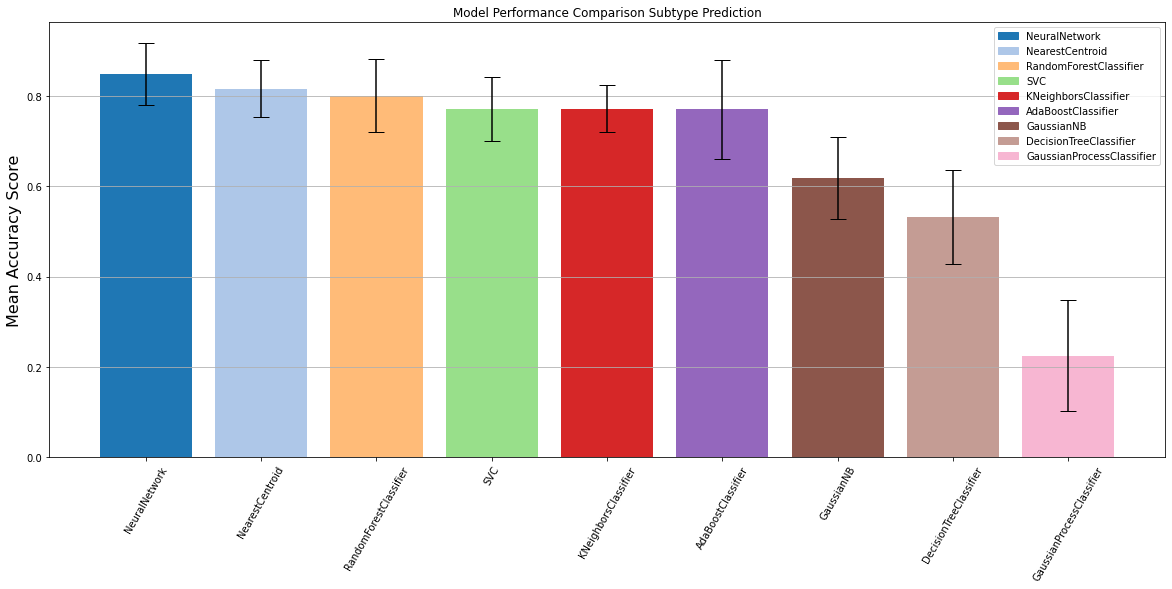

In [42]:

fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(Xpos, means,
       yerr=errors,
       width = 0.8,
       align='center',
       alpha=1,
       ecolor='black',
       capsize=8,
       color = clist)
ax.set_ylabel('Mean Accuracy Score', fontsize = 16)
ax.set_xticks(Xpos)
ax.set_xticklabels(labels, rotation = 60)
ax.set_title('Model Performance Comparison Subtype Prediction')

ax.yaxis.grid(True)
plt.legend(handles, labels)
plt.show()

### Part 2: Run Wilcoxon's test and p value correction to compare all models against the best model in terms of performance

In [43]:
### Statistics ###

In [44]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

In [45]:
def calculate_statdif(data1, scores, bestmodel, alpha):
    statistics = []
    for keys, values in scores.items():
        if keys != bestmodel:
            stat, p = wilcoxon(data1, values)
            statistics.append((bestmodel, keys, stat, p))
            print('\033[1m' +'Statistics={} & p-value={} while comparing {} with {} models'.format(stat, p, bestmodel, keys)+ '\033[0m')
            print('---------------------------------------------------------')
            if p > alpha:
                print('H0: Mean Model performances do not differ - Same distribution (fail to reject H0)')
            else:
                print('H1: Mean Model performances differ -  Different distribution (reject H0)')
            print('---------------------------------------------------------')
    return statistics

In [46]:
stat = calculate_statdif(scores_dict['NeuralNetwork'], scores_dict, 'NeuralNetwork', alpha=0.05)

Statistics=1.0 & p-value=0.28504940740261275 while comparing NeuralNetwork with NearestCentroid models
---------------------------------------------------------
H0: Mean Model performances do not differ - Same distribution (fail to reject H0)
---------------------------------------------------------
Statistics=0.0 & p-value=0.17971249487899976 while comparing NeuralNetwork with KNeighborsClassifier models
---------------------------------------------------------
H0: Mean Model performances do not differ - Same distribution (fail to reject H0)
---------------------------------------------------------
Statistics=0.0 & p-value=0.10247043485974937 while comparing NeuralNetwork with SVC models
---------------------------------------------------------
H0: Mean Model performances do not differ - Same distribution (fail to reject H0)
---------------------------------------------------------
Statistics=0.0 & p-value=0.0625 while comparing NeuralNetwork with GaussianProcessClassifier models
----

C:\Users\olgkr928\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\olgkr928\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [47]:
multioutstat = pd.DataFrame(data = stat, columns = ['BestModel', 'PairModel', 'Statistics', 'p-value'])

In [48]:
multipletests(multioutstat['p-value'], method = 'fdr_bh')

(array([False, False, False, False, False, False, False, False]),
 array([0.3125    , 0.23961666, 0.20494087, 0.16666667, 0.16666667,
        0.22523644, 0.3125    , 0.16666667]),
 0.006391150954545011,
 0.00625)

In [49]:
multioutstat['Corrected p-value'] = multipletests(multioutstat['p-value'], method = 'fdr_bh')[1]

In [50]:
multioutstat

BestModel                  PairModel  Statistics   p-value  \
0  NeuralNetwork            NearestCentroid         1.0  0.285049   
1  NeuralNetwork       KNeighborsClassifier         0.0  0.179712   
2  NeuralNetwork                        SVC         0.0  0.102470   
3  NeuralNetwork  GaussianProcessClassifier         0.0  0.062500   
4  NeuralNetwork     DecisionTreeClassifier         0.0  0.062500   
5  NeuralNetwork     RandomForestClassifier         1.0  0.140773   
6  NeuralNetwork         AdaBoostClassifier         3.0  0.312500   
7  NeuralNetwork                 GaussianNB         0.0  0.062500   

   Corrected p-value  
0           0.312500  
1           0.239617  
2           0.204941  
3           0.166667  
4           0.166667  
5           0.225236  
6           0.312500  
7           0.166667

### The Neural Networks produce stochastic results so it might not give the same accuracy scores on the validation dataset from the first try. If needed repeat. Otherwise if the other models overpower the Neural network  save that model instead as pickle file



### For saving the Neural network follow a different approach
1. Save the model steps as h5
2. Save the Pipeline as pickle file

In [53]:
bestmodel.steps[0][1]

In [54]:
bestmodel

Pipeline(steps=[('NeuralNetwork',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001EB4B381D90>)])

In [55]:
bm = bestmodel